<a href="https://colab.research.google.com/github/alaraturhan/winxclub-MIS220/blob/main/Train3_(6)_son_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Train dataset
train = pd.read_csv("/content/train (10).csv", header=None, error_bad_lines=False)


<ipython-input-4-508cde5f8ad4>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train = pd.read_csv("/content/train (10).csv", header=None, error_bad_lines=False)


In [ ]:
num_cols = len(train.columns)

In [ ]:
train.columns = ["col" + str(i+1) for i in range(num_cols)]


In [ ]:
print(train.columns)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9',
       'col10',
       ...
       'col113', 'col114', 'col115', 'col116', 'col117', 'col118', 'col119',
       'col120', 'col121', 'col122'],
      dtype='object', length=122)


In [ ]:
train.head()

col1  col2    col3    col4  col5 col6  col7    col8  col9  col10  ...  \
0   69769  -946  0.1613  0.7960  Panl    N  Bus2  0.0742     0      2  ...   
1  236977   -92     NaN     NaN   NaN    Y  Othr     NaN     0      3  ...   
2  168821 -1646  0.1124  0.8504  Panl    N  Bus3  0.0387     0      2  ...   
3   94708 -1651  0.0263     NaN  Blok    N  Bus3     NaN     0      2  ...   
4   84556  -977     NaN     NaN   NaN    N  Rest     NaN     0      2  ...   

   col113  col114  col115  col116 col117  col118 col119  col120  col121  \
0     1.0 -4670.0  0.9851     0.0    0.0    Mard    0.0  0.3333     0.0   
1     NaN -1994.0     NaN     NaN    0.0    Mard    0.0     NaN     0.0   
2     2.0 -2842.0  0.9891     0.0    0.0    Sind    0.0  0.3750     0.0   
3     4.0 -1345.0  0.9682     0.0    0.0    Sind    0.0  0.0417     0.0   
4     NaN  -852.0     NaN     NaN    0.0    Sind    0.0     NaN     0.0   

   col122  
0     0.0  
1     0.0  
2     1.0  
3     1.0  
4     0.0  

[5 rows x 122 columns]

Veri temizliği yapıyoruz.
threshold değişkeni, kabul edilebilir maksimum eksik değer yüzdesini belirler. Bu değerden daha yüksek bir eksik değer yüzdesine sahip sütunlar çıkarılacaktır.



num_missing değişkeni, her bir sütundaki eksik değer sayısını hesaplar. df.isnull().sum() ifadesi ile her sütunda kaç adet eksik değer olduğu bulunur.


pct_missing değişkeni, her bir sütundaki eksik değer yüzdesini hesaplar. num_missing'i toplam veri seti boyutuna bölerek yüzde cinsinden eksik değer oranını elde ederiz.

to_drop değişkeni, pct_missing üzerinde belirtilen eşiğin üzerindeki sütunların listesini oluşturur.

df.drop(to_drop, axis=1, inplace=True) ifadesi, to_drop listesindeki sütunları veri çerçevesinden çıkarır. axis=1 argümanı, sütunların silinmesini belirtir. inplace=True argümanı, veri çerçevesini doğrudan değiştirir.


Bu kod, eksik değerlere sahip sütunları çıkarmak için kullanılan bir yaklaşımdır. Eksik değerleri olan sütunların analiz veya modelleme süreçlerinde yanlış sonuçlara veya performans düşüklüğüne yol açabileceği durumlarda tercih edilebilir.

In [ ]:
# set thresehold for peercentage of missing values
threshold = 0.2

In [ ]:
num_missing = train.isnull().sum()

for column_name, num_missing_values in num_missing.iteritems():
  print(f"Column '{column_name}' has {num_missing_values}  missing values.")

#The number of missing values in each column is calculated using the df.isnull().sum() statement, and
#It is assigned to the num_missing variable. Finally, using the iteritems() method, how many missing values in each column are printed to the screen.

Column 'col1' has 0  missing values.
Column 'col2' has 0  missing values.
Column 'col3' has 19018  missing values.
Column 'col4' has 21694  missing values.
Column 'col5' has 16515  missing values.
Column 'col6' has 0  missing values.
Column 'col7' has 0  missing values.
Column 'col8' has 22726  missing values.
Column 'col9' has 0  missing values.
Column 'col10' has 0  missing values.
Column 'col11' has 16338  missing values.
Column 'col12' has 19318  missing values.
Column 'col13' has 4474  missing values.
Column 'col14' has 30  missing values.
Column 'col15' has 15396  missing values.
Column 'col16' has 0  missing values.
Column 'col17' has 134  missing values.
Column 'col18' has 22726  missing values.
Column 'col19' has 22588  missing values.
Column 'col20' has 0  missing values.
Column 'col21' has 0  missing values.
Column 'col22' has 16497  missing values.
Column 'col23' has 22080  missing values.
Column 'col24' has 0  missing values.
Column 'col25' has 0  missing values.
Column 'c

<ipython-input-12-6e0197693811>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, num_missing_values in num_missing.iteritems():


In [ ]:

#calculate the percentage of missing values for each column
pct_missing = num_missing / len(train)

#calculate list of columns to drop
to_drop = list(pct_missing[pct_missing > threshold].index) 

# drop columns with too many missing values
train.drop(to_drop, axis=1, inplace=True)


# check result
print(to_drop)

#Daha sonra, eksik değer yüzdesini hesaplamak için num_missing'i DataFrame'in toplam satır sayısına (len(df)) böleriz.
#Ardından, pct_missing değişkeni, her bir sütundaki eksik değer yüzdesini içerir.
#Son olarak, threshold eşiğinden daha yüksek eksik değer yüzdesine sahip olan sütunları belirlemek için pct_missing'i kullanırız.
#Bu durumda, pct_missing > threshold ifadesi, eşiğin üzerinde eksik değer yüzdesine sahip olan sütunları belirleyecektir.
#Bu sütunların indekslerini (index) alarak to_drop listesine ekleriz.
#Örneğin, eşik değeri (threshold) 0.2 olarak belirlenmişse ve sütunun eksik değer yüzdesi bu değerin üzerindeyse, o sütun to_drop listesine eklenir.
#Sonuç olarak, to_drop listesi, çıkarılacak sütunların indekslerini içeren bir liste olarak elde edilir.
#Bu listenin içeriğini kontrol etmek için print(to_drop) ifadesini kullanabilirsiniz.

['col3', 'col4', 'col5', 'col8', 'col11', 'col12', 'col15', 'col18', 'col19', 'col22', 'col23', 'col33', 'col37', 'col39', 'col40', 'col44', 'col45', 'col49', 'col50', 'col52', 'col55', 'col57', 'col59', 'col60', 'col61', 'col62', 'col69', 'col75', 'col78', 'col79', 'col80', 'col81', 'col83', 'col85', 'col87', 'col88', 'col89', 'col90', 'col92', 'col93', 'col96', 'col97', 'col102', 'col103', 'col108', 'col110', 'col111', 'col112', 'col115', 'col116', 'col120']


In [ ]:
train.shape

(32666, 71)

In [ ]:
# Create empty lists for groups
continuous = []
binary = []
categorical = []
label = []

# Iterate over columns
for col in train.columns:
    if col == "col122":
        label.append(col)
    elif train[col].dtype == object:
        categorical.append(col)
    elif len(train[col].unique()) == 2 and set(train[col].unique()) <= set([0, 1]):
        binary.append(col)
    else:
        continuous.append(col)

if "col122" in binary:
    binary.remove("col122")


In [ ]:
label = ["co122"]  # specify the label column

In [ ]:
# print the 3 groups and their lengths
print("Continuous variables:", len(continuous), continuous)
print("Binary variables:", len(binary), binary)
print("Categorical variables:", len(categorical), categorical)
print("Label:", len(label), label)

#This snippet is used to print grouped variables and the length of each group.

Continuous variables: 38 ['col1', 'col2', 'col10', 'col13', 'col14', 'col26', 'col28', 'col34', 'col35', 'col36', 'col38', 'col41', 'col42', 'col46', 'col54', 'col58', 'col64', 'col67', 'col71', 'col73', 'col74', 'col84', 'col86', 'col91', 'col95', 'col98', 'col99', 'col100', 'col101', 'col105', 'col106', 'col107', 'col109', 'col113', 'col114', 'col117', 'col119', 'col121']
Binary variables: 21 ['col9', 'col16', 'col20', 'col21', 'col24', 'col25', 'col27', 'col29', 'col30', 'col43', 'col47', 'col51', 'col53', 'col56', 'col63', 'col65', 'col66', 'col72', 'col76', 'col77', 'col82']
Categorical variables: 11 ['col6', 'col7', 'col17', 'col31', 'col32', 'col48', 'col68', 'col70', 'col94', 'col104', 'col118']
Label: 1 ['co122']


In [ ]:
from sklearn.preprocessing import LabelEncoder

#In this way, we can convert categorical data to numeric values using the LabelEncoder class and make it usable in machine learning algorithms.

In [ ]:
# Create a label encoder object
labelEncoder = LabelEncoder()

# Move variables with only two possible values to the binary group
binary = [col for col in categorical if len(train[col].unique()) == 2] + binary
categorical = [col for col in categorical if col not in binary]

# Loop through each categorical variable and encode it
for col in categorical:
    train[col] = labelEncoder.fit_transform(train[col])



In [ ]:
# print the 3 groups and their lengths
print("Continuous variables:", len(continuous), continuous)
print("Binary variables:", len(binary), binary)
print("Categorical variables:", len(categorical), categorical)

Continuous variables: 38 ['col1', 'col2', 'col10', 'col13', 'col14', 'col26', 'col28', 'col34', 'col35', 'col36', 'col38', 'col41', 'col42', 'col46', 'col54', 'col58', 'col64', 'col67', 'col71', 'col73', 'col74', 'col84', 'col86', 'col91', 'col95', 'col98', 'col99', 'col100', 'col101', 'col105', 'col106', 'col107', 'col109', 'col113', 'col114', 'col117', 'col119', 'col121']
Binary variables: 24 ['col6', 'col48', 'col70', 'col9', 'col16', 'col20', 'col21', 'col24', 'col25', 'col27', 'col29', 'col30', 'col43', 'col47', 'col51', 'col53', 'col56', 'col63', 'col65', 'col66', 'col72', 'col76', 'col77', 'col82']
Categorical variables: 8 ['col7', 'col17', 'col31', 'col32', 'col68', 'col94', 'col104', 'col118']


In [ ]:
import pandas as pd

# Check if each column is numerical
is_numerical = train.apply(pd.to_numeric, errors='coerce').notnull().all()

# Get the columns that are numerical
numerical_columns = is_numerical[is_numerical].index.tolist()

# Get the columns that are not numerical
non_numerical_columns = is_numerical[~is_numerical].index.tolist()

# Print the results
print("Numerical columns:", numerical_columns)
print("Non-numerical columns:", non_numerical_columns)


Numerical columns: ['col1', 'col2', 'col7', 'col9', 'col10', 'col16', 'col17', 'col20', 'col21', 'col24', 'col25', 'col27', 'col29', 'col30', 'col31', 'col32', 'col34', 'col38', 'col42', 'col43', 'col47', 'col51', 'col53', 'col54', 'col56', 'col58', 'col63', 'col64', 'col65', 'col66', 'col67', 'col68', 'col71', 'col72', 'col74', 'col76', 'col77', 'col82', 'col86', 'col94', 'col104', 'col118']
Non-numerical columns: ['col6', 'col13', 'col14', 'col26', 'col28', 'col35', 'col36', 'col41', 'col46', 'col48', 'col70', 'col73', 'col84', 'col91', 'col95', 'col98', 'col99', 'col100', 'col101', 'col105', 'col106', 'col107', 'col109', 'col113', 'col114', 'col117', 'col119', 'col121', 'col122']


In [ ]:
# Fill missing values in continuous columns with median
for col in continuous:
    train[col].fillna(train[col].median(), inplace=True)

# Fill missing values in binary columns with mode
for col in binary:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Fill missing values in categorical columns with mode
for col in categorical:
    train[col].fillna(train[col].mode()[0], inplace=True)

# Fill missing values in "col122" with mode
train["col122"].fillna(train["col122"].mode()[0], inplace=True)



In this code, we first loop through the continuous list and fill missing values in each continuous column with its median using the fillna method and median() function.

Next, we loop through the binary list and categorical list separately, and fill missing values in binary and categorical columns with their respective modes using the mode() function.

Finally, we explicitly fill missing values in the "col122" column with its mode using the mode()[0] indexing.

By setting inplace=True, the changes are made directly to the train DataFrame.

This code fills missing values in the continuous columns with the median and missing values in binary, categorical, and specifically "col122" columns with their respective modes.






In [ ]:
missing_values = train.isnull().sum().sum()

if missing_values > 0:
    print("There are missing values in the train dataset.")
    print("Total number of missing values:", missing_values)
else:
    print("There are no missing values in the train dataset.")


There are no missing values in the train dataset.


In [ ]:
train.head()


col1  col2 col6  col7  col9  col10  col13     col14  col16  col17  ...  \
0   69769  -946    N     4     0      2    0.0  180000.0      0      6  ...   
1  236977   -92    Y    30     0      3    0.0  135000.0      0      6  ...   
2  168821 -1646    N     5     0      2    0.0  553500.0      0      5  ...   
3   94708 -1651    N     5     0      2    0.0  391500.0      0      6  ...   
4   84556  -977    N    35     0      2    0.0  225000.0      0      6  ...   

   col106  col107  col109  col113  col114  col117  col118  col119  col121  \
0     0.0     0.0     0.0     1.0 -4670.0     0.0       1     0.0     0.0   
1     0.0     0.0     0.0     1.0 -1994.0     0.0       1     0.0     0.0   
2     0.0     0.0     0.0     2.0 -2842.0     0.0       3     0.0     0.0   
3     0.0     0.0     0.0     4.0 -1345.0     0.0       3     0.0     0.0   
4     0.0     0.0     0.0     1.0  -852.0     0.0       3     0.0     0.0   

   col122  
0     0.0  
1     0.0  
2     1.0  
3     1.0  
4     0.0  

[5 rows x 71 columns]

In [ ]:
train["col122"].value_counts()

0.0    30054
1.0     2612
Name: col122, dtype: int64

In [ ]:
train["col122"].value_counts(normalize=True)

0.0    0.920039
1.0    0.079961
Name: col122, dtype: float64

In [ ]:
# Calculate the correlation matrix
corr_matrix = train.corr().round(1)

# Filter the matrix to show only the values that meet the condition
corr_filtered = corr_matrix[abs(corr_matrix) > 0.80]


<ipython-input-27-988128d4f260>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr().round(1)


<ipython-input-28-3f76940f4b48>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train[columns_of_interest].corr()


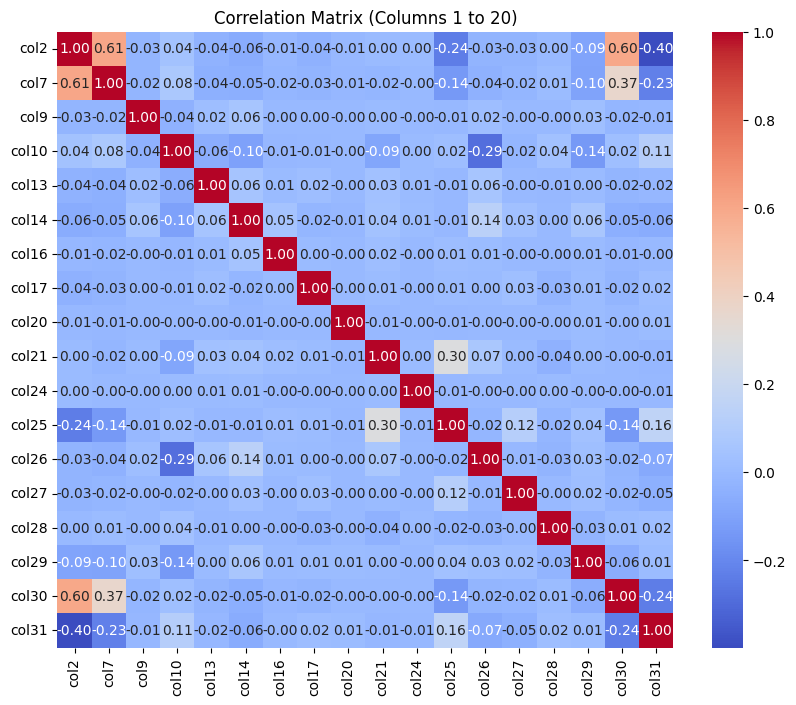

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = train.columns[1:20]

# Calculate the correlation matrix for the selected columns
corr_matrix = train[columns_of_interest].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix (Columns 1 to 20)')
plt.show()


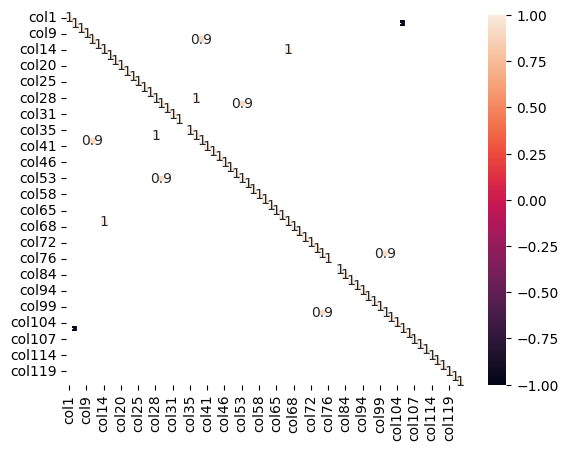

In [ ]:
# Plot the filtered correlation matrix using seaborn's heatmap
sns.heatmap(corr_filtered,  annot=True)
plt.show()

<ipython-input-31-87bced34545f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train[columns_of_interest].corr()


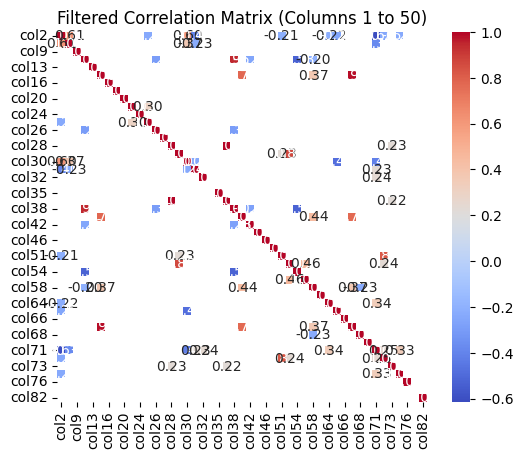

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
columns_of_interest = train.columns[1:50]

# Calculate the correlation matrix for the selected columns
corr_matrix = train[columns_of_interest].corr()

# Filter the correlation matrix based on a threshold
threshold = 0.2
corr_filtered = corr_matrix[abs(corr_matrix) > threshold]

# Plot the filtered correlation matrix using seaborn's heatmap

sns.heatmap(corr_filtered, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Filtered Correlation Matrix (Columns 1 to 50)')
plt.show()


<ipython-input-32-c150d532f342>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


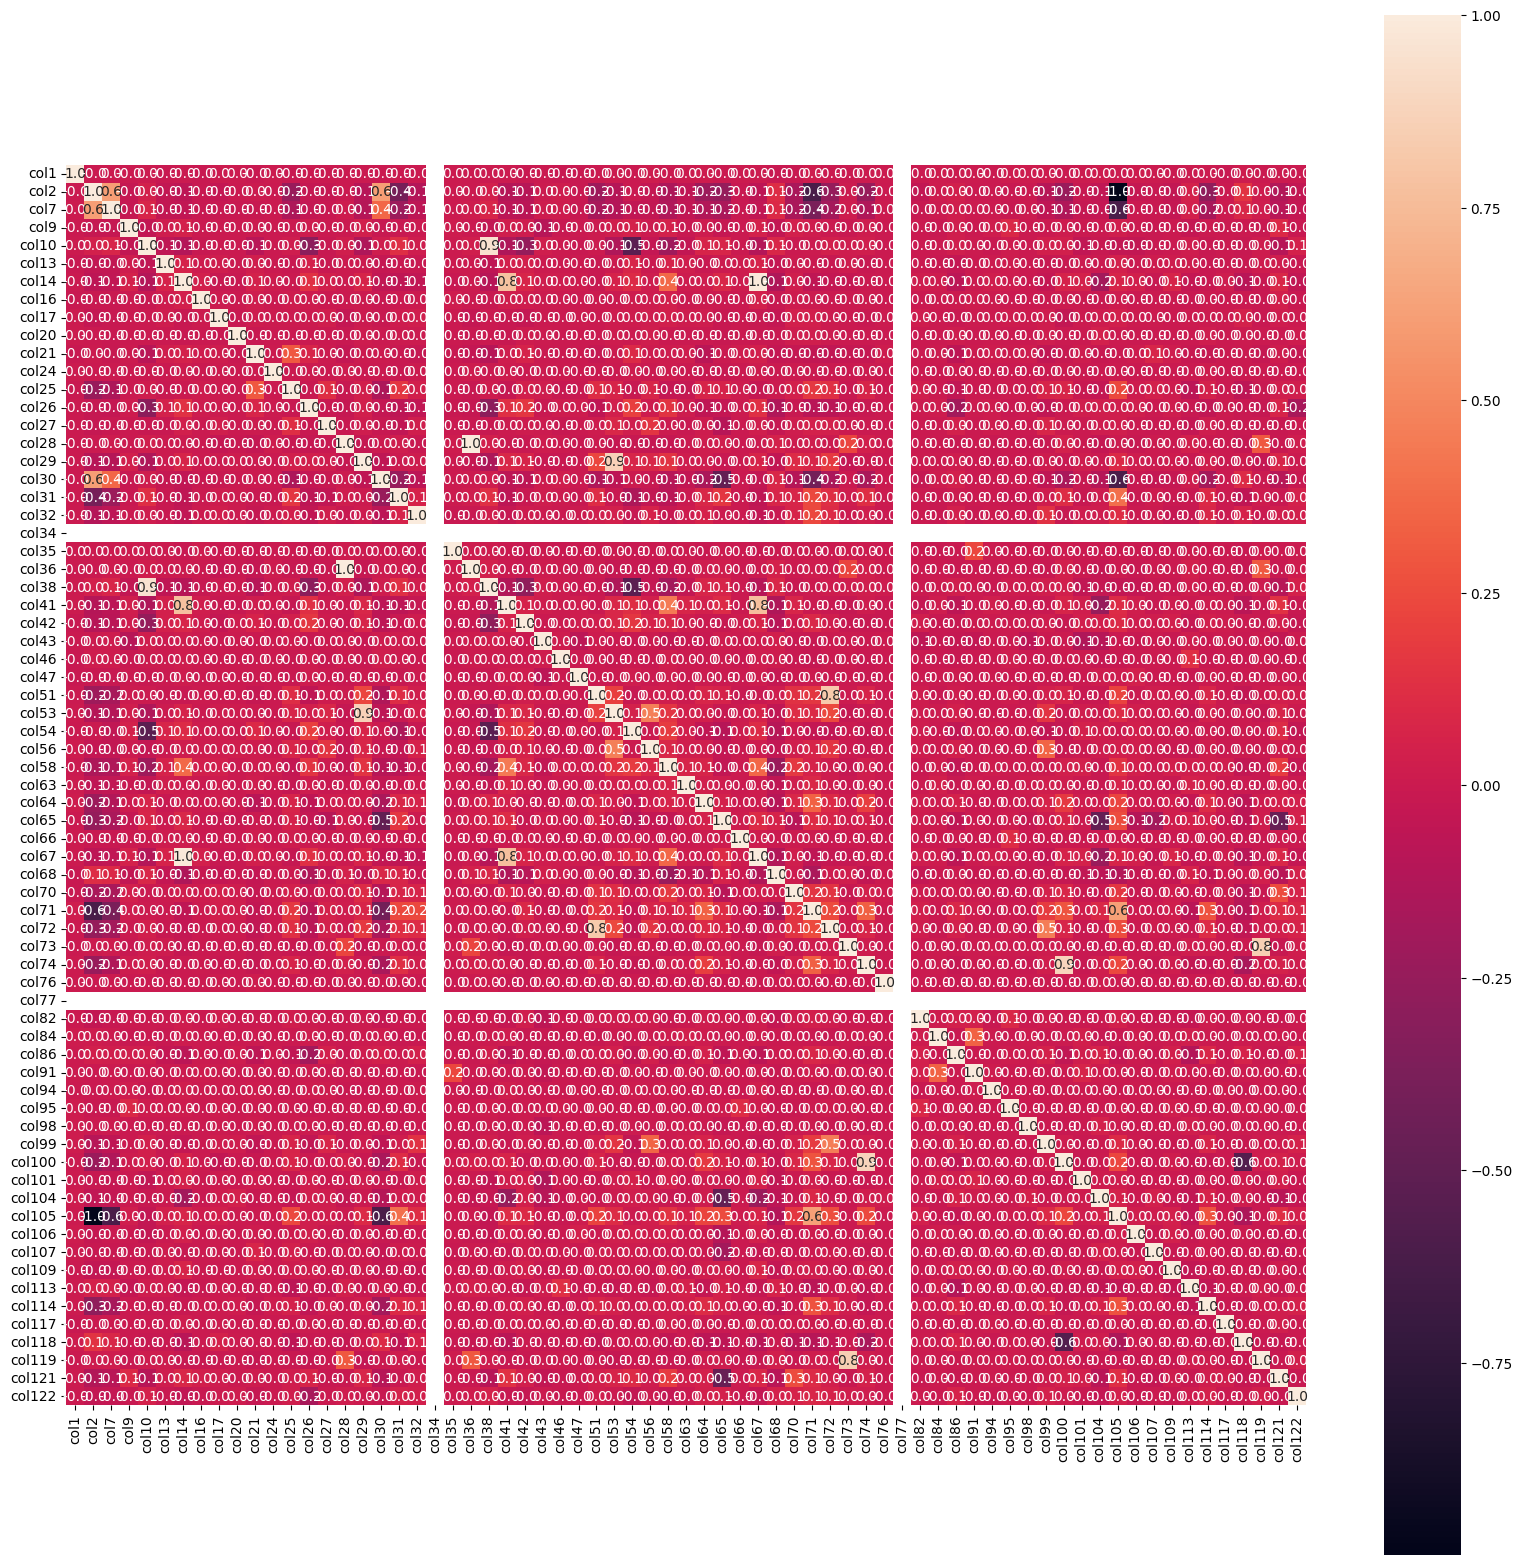

In [ ]:
# Korelasyon matrisini hesaplayın
corr = train.corr()

# Isı haritasını oluşturun
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True)
plt.show()

In [ ]:
# Calculate the correlation matrix
corr_matrix = train.corr().round(1)

# Set the threshold value
threshold = 0.80

# Find the pairs of highly correlated features
high_corr_pairs = []
for x in range(len(corr_matrix.columns)):
    for y in range(x+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[x, y] >= threshold or corr_matrix.iloc[x, y] <= -threshold:
            high_corr_pairs.append((train.columns[x], train.columns[y]))

# Print the highly correlated pairs
for pair in high_corr_pairs:
    print(pair)



<ipython-input-29-1867ec0aab68>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr().round(1)


('col2', 'col100')
('col9', 'col36')
('col13', 'col38')
('col13', 'col65')
('col27', 'col35')
('col28', 'col48')
('col38', 'col65')
('col47', 'col68')
('col70', 'col114')
('col71', 'col95')


In [ ]:
high_corr_pairs

[('col2', 'col100'),
 ('col9', 'col36'),
 ('col13', 'col38'),
 ('col13', 'col65'),
 ('col27', 'col35'),
 ('col28', 'col48'),
 ('col38', 'col65'),
 ('col47', 'col68'),
 ('col70', 'col114'),
 ('col71', 'col95')]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
import numpy as np

# Calculate standard deviation
def calculate_std(X):
    std = np.std(X, axis=0)
    return std

for pair in high_corr_pairs:
    if pair[0] in train.columns and pair[1] in train.columns:
        if pair[0] in continuous:
            train = train.drop(pair[1], axis=1)
        elif pair[1] in continuous:
            train = train.drop(pair[0], axis=1)
        else:
            std_pair_0 = calculate_std(train[pair[0]].values)
            std_pair_1 = calculate_std(train[pair[1]].values)
            if std_pair_0 >= std_pair_1:
                train = train.drop(pair[1], axis=1)
            else:
                train = train.drop(pair[0], axis=1)
#Çİftlerden standart devisionı düşük olanı sildik.


In [ ]:
import pandas as pd

# Select the data for the respective columns
column_9 = train.iloc[:, 8]   # Index 8 corresponds to "col9"
column_36 = train.iloc[:, 35]  # Index 35 corresponds to "col36"

# Calculate the standard deviations
std_dev_9 = column_9.std()
std_dev_36 = column_36.std()

# Find the column with the lowest standard deviation
if std_dev_9 < std_dev_36:
    lowest_std_dev_column = "col9"
else:
    lowest_std_dev_column = "col36"

print("Column with the lowest standard deviation: ", lowest_std_dev_column)


Column with the lowest standard deviation:  col36


In [ ]:
# İlgili sütunu seçin
column_13 = train.iloc[:, 13]

# Sütunun benzersiz değerlerini sayın
unique_values_count = column_13.nunique()

# Sütunun benzersiz değerlerin yüzdesini hesaplayın
unique_values_percentage = unique_values_count / len(column_13)

# Eşik değeri
threshold = 0.05

# Kategorik veya sürekli olduğunu tahmin edin
if unique_values_percentage < threshold:
    column_type = "Categorical"
else:
    column_type = "Continuous"

print("13. sütunun tahmin edilen türü: ", column_type)

13. sütunun tahmin edilen türü:  Continuous


In [ ]:
# İlgili sütunu seçin
column_38 = train.iloc[:, 37]

# Sütunun benzersiz değerlerini sayın
unique_values_count = column_38.nunique()

# Sütunun benzersiz değerlerin yüzdesini hesaplayın
unique_values_percentage = unique_values_count / len(column_38)

# Eşik değeri
threshold = 0.05

# Kategorik veya sürekli olduğunu tahmin edin
if unique_values_percentage < threshold:
    column_type = "Categorical"
else:
    column_type = "Continuous"

print("38. sütunun tahmin edilen türü: ", column_type)


38. sütunun tahmin edilen türü:  Categorical


In [ ]:
import pandas as pd


# İlgili sütunu seçin
column_27 = train.iloc[:,27]

# Sütunun benzersiz değerlerini sayın
unique_values_count = column_27.nunique()

# Sütunun benzersiz değerlerin yüzdesini hesaplayın
unique_values_percentage = unique_values_count / len(column_27)

# Eşik değeri
threshold = 0.05

# Kategorik veya sürekli olduğunu tahmin edin
if unique_values_percentage < threshold:
    column_type = "Categorical"
else:
    column_type = "Continuous"

print("27. sütunun tahmin edilen türü: ", column_type)

27. sütunun tahmin edilen türü:  Categorical


In [ ]:
import pandas as pd


# İlgili sütunu seçin
column_28 = train.iloc[:,28]

# Sütunun benzersiz değerlerini sayın
unique_values_count = column_28.nunique()

# Sütunun benzersiz değerlerin yüzdesini hesaplayın
unique_values_percentage = unique_values_count / len(column_28)

# Eşik değeri
threshold = 0.05

# Kategorik veya sürekli olduğunu tahmin edin
if unique_values_percentage < threshold:
    column_type = "Categorical"
else:
    column_type = "Continuous"

print("28. sütunun tahmin edilen türü: ", column_type)

28. sütunun tahmin edilen türü:  Categorical


In [ ]:
import pandas as pd


# İlgili sütunu seçin
column_48 = train.iloc[:,48]

# Sütunun benzersiz değerlerini sayın
unique_values_count = column_48.nunique()

# Sütunun benzersiz değerlerin yüzdesini hesaplayın
unique_values_percentage = unique_values_count / len(column_48)

# Eşik değeri
threshold = 0.05

# Kategorik veya sürekli olduğunu tahmin edin
if unique_values_percentage < threshold:
    column_type = "Categorical"
else:
    column_type = "Continuous"

print("48. sütunun tahmin edilen türü: ", column_type)

48. sütunun tahmin edilen türü:  Categorical


In [ ]:
import pandas as pd

# İlgili sütunların verilerini seçin
column_28 = train.iloc[:, 28]  # İndeks , 13. sütuna karşılık gelir
column_48 = train.iloc[:, 48]  # İndeks 64, 65. sütuna karşılık gelir

# Standart sapmaları hesaplayın
std_dev_28 = column_28.std()
std_dev_48 = column_48.std()

# En düşük standart sapmaya sahip sütunu bulun
if std_dev_28 < std_dev_48:
    lowest_std_dev_column = "col28"
else:
    lowest_std_dev_column = "col48"

print("En düşük standart sapmaya sahip sütun: ", lowest_std_dev_column)




# Col28 ve col48 karşılaştırmasında iki suründe categorical ama col48 daha düşük standart sapmaya sahip olduğu için col48 siliniyor.

En düşük standart sapmaya sahip sütun:  col28


Datanın içerisindeki korelasyon değeri yüksek olan çiftlerden ikisini aldık ve inceledik. İncelerken categorical mı yoksa continous mu olduğuna dikkat ettik. Çiftlerdeki continous değerlerini tuttuk.

Genel olarak, bir veri setindeki değişkenler iki tür veri olabilir: sayısal (continuous) ve kategorik (categorical) veriler. Sayısal veriler, gerçek sayılar veya sayısal değerler içerirken, kategorik veriler, bir sınıflandırma kategorisi içeren niteliksel verilerdir.

Veri setindeki değişkenlerin türü, veri analizi yöntemlerinin seçiminde önemli bir rol oynar. Örneğin, veri setindeki bir değişken sayısal veri içeriyorsa, bu değişkenin dağılımını ve aralığını gözlemleyebilir ve örneğin ortalamayı, standart sapmayı ve benzeri istatistikleri hesaplayabilirsiniz. Bu tür verilerle yapılacak analizlerin çoğu, istatistiksel yöntemler veya makine öğrenimi algoritmaları kullanarak gerçekleştirilir.

Öte yandan, kategorik verilerin analizi, sınıflandırma algoritmaları veya kategorik verilerin dağılımını incelemek gibi farklı yöntemler gerektirir.

Bu nedenle, veri setindeki değişkenlerin türünü belirlemek, veri analizi sürecinde yapılacak işlemlerin doğru bir şekilde seçilmesinde önemli bir adımdır. Bu açıdan bakıldığında, continuous olan bir değişkenin incelenmesi, verinin daha iyi anlaşılmasına ve uygun analiz yöntemlerinin seçilmesine yardımcı olabilir.

------------- 

In [ ]:
# Sütun adlarını alın
column_names = train.columns.tolist()

# Sütun adlarını ekrana yazdırın
print("Sütun Adları:")
for column_name in column_names:
    print(column_name)

Sütun Adları:
col1
col2
col6
col7
col10
col13
col14
col16
col17
col20
col21
col24
col25
col26
col28
col29
col30
col31
col32
col34
col35
col36
col41
col42
col43
col46
col51
col53
col54
col56
col58
col63
col64
col66
col67
col68
col71
col72
col73
col74
col76
col77
col82
col84
col86
col91
col94
col98
col99
col101
col104
col105
col106
col107
col109
col113
col114
col117
col118
col119
col121
col122


In [ ]:
train.head()

col1  col2 col6  col7  col10  col13     col14  col16  col17  col20  ...  \
0   69769  -946    N     4      2    0.0  180000.0      0      6      0  ...   
1  236977   -92    Y    30      3    0.0  135000.0      0      6      0  ...   
2  168821 -1646    N     5      2    0.0  553500.0      0      5      0  ...   
3   94708 -1651    N     5      2    0.0  391500.0      0      6      0  ...   
4   84556  -977    N    35      2    0.0  225000.0      0      6      0  ...   

   col106  col107  col109  col113  col114  col117  col118  col119  col121  \
0     0.0     0.0     0.0     1.0 -4670.0     0.0       1     0.0     0.0   
1     0.0     0.0     0.0     1.0 -1994.0     0.0       1     0.0     0.0   
2     0.0     0.0     0.0     2.0 -2842.0     0.0       3     0.0     0.0   
3     0.0     0.0     0.0     4.0 -1345.0     0.0       3     0.0     0.0   
4     0.0     0.0     0.0     1.0  -852.0     0.0       3     0.0     0.0   

   col122  
0     0.0  
1     0.0  
2     1.0  
3     1.0  
4     0.0  

[5 rows x 62 columns]

In [ ]:
letter_columns = [column for column in train.columns if train[column].dtype == 'object']
num_letter_columns = len(letter_columns)
print("Train datasında", num_letter_columns, "adet harften oluşan sütun bulunmaktadır.")


Train datasında 1 adet harften oluşan sütun bulunmaktadır.


In [ ]:
letter_columns = [column for column in train.columns if train[column].dtype == 'object']
letter_values = {}

for column in letter_columns:
    unique_letters = train[column].unique()
    letter_values[column] = unique_letters

print("Harflerden oluşan sütunlar:")
for column in letter_values:
    unique_letters = letter_values[column]
    print(column, "sütununda bulunan harfler:", unique_letters)


Harflerden oluşan sütunlar:
col6 sütununda bulunan harfler: ['N' 'Y']


In [ ]:
unique_values = train["col6"].unique()
if len(unique_values) == 2 and set(unique_values) <= set(["N", "Y", 0, 1]):
    train.loc[train["col6"] == "N", "col6"] = 0
    train.loc[train["col6"] == "Y", "col6"] = 1
    binary.append("col6")



In [ ]:
train.head()

col1  col2 col6  col7  col10  col13     col14  col16  col17  col20  ...  \
0   69769  -946    0     4      2    0.0  180000.0      0      6      0  ...   
1  236977   -92    1    30      3    0.0  135000.0      0      6      0  ...   
2  168821 -1646    0     5      2    0.0  553500.0      0      5      0  ...   
3   94708 -1651    0     5      2    0.0  391500.0      0      6      0  ...   
4   84556  -977    0    35      2    0.0  225000.0      0      6      0  ...   

   col106  col107  col109  col113  col114  col117  col118  col119  col121  \
0     0.0     0.0     0.0     1.0 -4670.0     0.0       1     0.0     0.0   
1     0.0     0.0     0.0     1.0 -1994.0     0.0       1     0.0     0.0   
2     0.0     0.0     0.0     2.0 -2842.0     0.0       3     0.0     0.0   
3     0.0     0.0     0.0     4.0 -1345.0     0.0       3     0.0     0.0   
4     0.0     0.0     0.0     1.0  -852.0     0.0       3     0.0     0.0   

   col122  
0     0.0  
1     0.0  
2     1.0  
3     1.0  
4     0.0  

[5 rows x 62 columns]

In [ ]:
letter_columns = [column for column in train.columns if train[column].dtype == 'object']
letter_values = {}

for column in letter_columns:
    unique_letters = train[column].unique()
    letter_values[column] = unique_letters

print("Harflerden oluşan sütunlar:")
for column in letter_values:
    unique_letters = letter_values[column]
    print(column, "sütununda bulunan harfler:", unique_letters)

Harflerden oluşan sütunlar:
col6 sütununda bulunan harfler: [0 1]


In [ ]:
cols_with_null = train.isnull().sum().sort_values(ascending= False)
cols_with_null.head()

#Eksik verilerin olmadığını kontrol ettik.

col1     0
col94    0
col66    0
col67    0
col68    0
dtype: int64

In [ ]:
twouniquevalue = [col for col in train.columns if train[col].nunique() == 2]
twouniquevalue.remove("col122")
label = ["col122"]

morethan30 = [col for col in train.columns if col not in twouniquevalue and col != "col122" and train[col].nunique() > 30]

leftover = [col for col in train.columns if col not in twouniquevalue and col != "col122" and col not in morethan30]


Bu kod, veri setindeki sütunları döngü kullanarak kontrol eder ve her bir sütunun benzersiz değer sayısına göre ilgili listeye ekler. İki benzersiz değere sahip sütunlar binary_feats listesine eklenirken, 30'dan fazla benzersiz değere sahip olanlar continuous_feats listesine eklenir. Geri kalan sütunlar ise categorical_feats listesine eklenir.

Son olarak, "col122" sütunu binary_feats listesinden çıkarılır ve label listesine eklenir.

Bu şekilde, veri setindeki sütunları benzersiz değer sayısına göre gruplara ayırabilir ve ilgili listeleri basit bir şekilde doldurabilirsiniz.

"30" genellikle bir kural olarak kullanılan bir eşik değerdir. Eğer bir özellik (sütun) 30'dan fazla benzersiz değere sahipse, genellikle kategorik bir özellik olarak kabul edilmez ve continuous (sürekli) bir özellik olarak değerlendirilir. Bu eşik değeri, özelliklerin doğasına ve veri setinin gereksinimlerine bağlı olarak değiştirilebilir.

Örneğin, daha geniş bir veri setiyle çalışırken veya farklı bir problemdeyseniz, eşik değeri olarak farklı bir sayı seçebilirsiniz. Bazı durumlarda, 10 veya 20 gibi daha küçük bir değer daha uygun olabilir. Önemli olan, özellikleri doğru bir şekilde sınıflandırmak ve analiz etmek için bir eşik değeri belirlemektir.

Bu nedenle, hangi eşik değerini kullanacağınız veri setinizin özelliklerine ve analiz amacınıza bağlı olarak değişebilir. Veri setinize ve gereksinimlerinize en uygun eşik değerini belirlemek için veriyi anlamak ve keşfetmek önemlidir.

In [ ]:
print("Continuous Features: ", morethan30)
print("Categorical Features: ", leftover)
print("Binary Features: ", twouniquevalue)

Continuous Features:  ['col1', 'col2', 'col7', 'col14', 'col26', 'col41', 'col54', 'col58', 'col64', 'col67', 'col71', 'col86', 'col114']
Categorical Features:  ['col10', 'col13', 'col17', 'col28', 'col31', 'col32', 'col34', 'col35', 'col36', 'col42', 'col46', 'col68', 'col73', 'col74', 'col84', 'col91', 'col94', 'col104', 'col113', 'col118', 'col119']
Binary Features:  ['col6', 'col16', 'col20', 'col21', 'col24', 'col25', 'col29', 'col30', 'col43', 'col51', 'col53', 'col56', 'col63', 'col66', 'col72', 'col76', 'col77', 'col82', 'col98', 'col99', 'col101', 'col105', 'col106', 'col107', 'col109', 'col117', 'col121']


`kstest`, scipy kütüphanesinde bulunan bir fonksiyondur ve Kolmogorov-Smirnov (KS) testini gerçekleştirmek için kullanılır. Kolmogorov-Smirnov testi, bir veri setinin belirli bir teorik dağılıma uygun olup olmadığını değerlendirmek için kullanılan bir istatistiksel testtir.

KS testi, bir kümülatif dağılım fonksiyonu (CDF) ile bir veri setinin empirik kümülatif dağılım fonksiyonu (ECDF) arasındaki maksimum farkı ölçer. Test istatistiği olarak, bu maksimum farkın büyüklüğü kullanılır. Eğer test istatistiği, bir belirli kritik değeri aşarsa veya altına düşerse, bu durumda veri setinin test edilen teorik dağılıma uymadığı sonucuna varılır.

`kstest` fonksiyonu, bir veri setinin belirli bir dağılıma uygun olup olmadığını test etmek için kullanılır. Fonksiyon, veri seti ve test edilmek istenen teorik dağılım (örneğin, normal dağılım) arasındaki maksimum farkı ve buna karşılık gelen p-değerini hesaplar. P-değeri, test istatistiğinin null hipotezi (veri setinin test edilen teorik dağılıma uymadığı) karşısındaki anlamlılığını gösterir.

Örneğin, `kstest(data, 'norm')` kodu, `data` adlı bir veri setinin normal dağılıma uygun olup olmadığını test eder. Fonksiyon, KS testi istatistiğini ve p-değerini döndürür. P-değeri, veri setinin normal dağılıma uygun olup olmadığı konusunda istatistiksel bir karar vermek için kullanılabilir.

In [ ]:
from scipy.stats import kstest
import numpy as np

alpha = 0.05

numeric_columns = train.select_dtypes(include=np.number).columns

for column in numeric_columns:
    ks_statistic, p_value = kstest(train[column], 'norm')

    print("Column:", column)
    print("KS Statistic:", ks_statistic)
    print("p-value:", p_value)

    if p_value > 0.05:
        print("Veri normal dağılıma uyuyor (H0 kabul ediliyor)")
    else:
        print("Veri normal dağılıma uymuyor (H0 reddediliyor)")

    print("------------------------")

Column: col1
KS Statistic: 0.9999693861437619
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col2
KS Statistic: 0.8217106471560638
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col7
KS Statistic: 0.9803129930477796
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col10
KS Statistic: 0.8661251512208651
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col13
KS Statistic: 0.5
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col14
KS Statistic: 1.0
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col16
KS Statistic: 0.5
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------------
Column: col17
KS Statistic: 0.853851228521973
p-value: 0.0
Veri normal dağılıma uymuyor (H0 reddediliyor)
------------------

Bu kod parçası, `scipy.stats` kütüphanesinden `kstest` fonksiyonunu kullanarak bir veri setinin normal dağılıma uygun olup olmadığını değerlendirmek için yazılmıştır. Burada `alpha = 0.05` olarak belirlenen bir anlamlılık düzeyi kullanılır.

Aşağıdaki adımları izler:

1. İlk olarak, `train` veri kümesi üzerinde sayısal sütunları seçer (`select_dtypes(include=np.number)`). Bu, yalnızca sayısal veri tiplerine sahip sütunları alır ve normal dağılım testini uygulayacaktır.

2. Daha sonra, her bir sayısal sütun için `kstest` fonksiyonu kullanılarak normal dağılım testi yapılır. `kstest` fonksiyonu, bir veri setinin belirli bir dağılıma (bu durumda normal dağılım) uygunluğunu test etmek için Kolmogorov-Smirnov testini uygular.

3. Her bir sütun için hesaplanan Kolmogorov-Smirnov istatistiği (`ks_statistic`) ve p-değeri (`p_value`) yazdırılır.

4. Son olarak, p-değeri (`p_value`) belirlenen anlamlılık düzeyine (`alpha`) göre karşılaştırılır. Eğer p-değeri (`p_value`) anlamlılık düzeyinden büyükse (`p_value > 0.05`), o zaman "Veri normal dağılıma uyuyor (H0 kabul ediliyor)" yazdırılır. Eğer p-değeri (`p_value`) anlamlılık düzeyinden küçükse (`p_value <= 0.05`), o zaman "Veri normal dağılıma uymuyor (H0 reddediliyor)" yazdırılır.

Bu kod parçası, veri setindeki sayısal sütunların normal dağılıma uygun olup olmadığını değerlendirmek için istatistiksel bir test yapar. Normal dağılıma uymayan veri setleri, analizlerin sonuçlarını etkileyebilir ve bazı istatistiksel yöntemlerin doğruluğunu etkileyebilir. Bu nedenle, normal dağılım testi, veri setinin istatistiksel özelliklerini anlamak ve uygun analiz yöntemlerini seçmek için önemlidir.

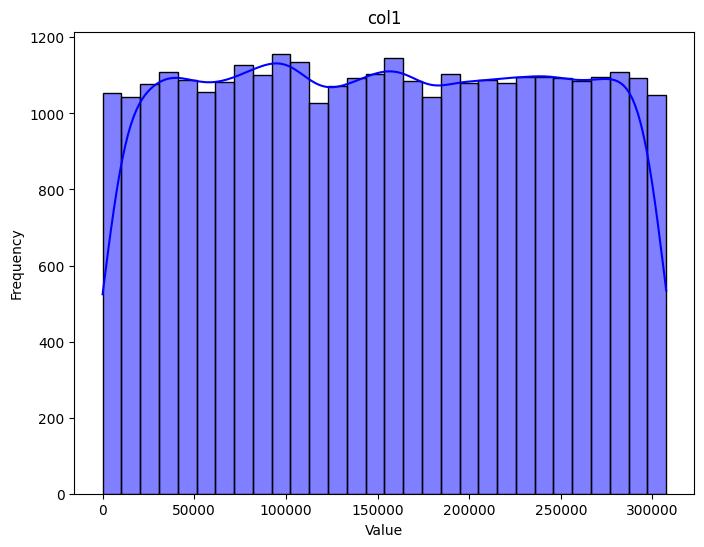

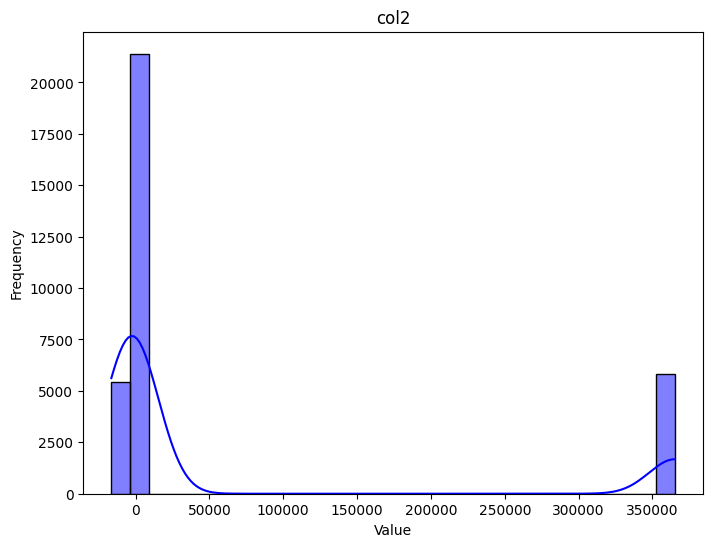

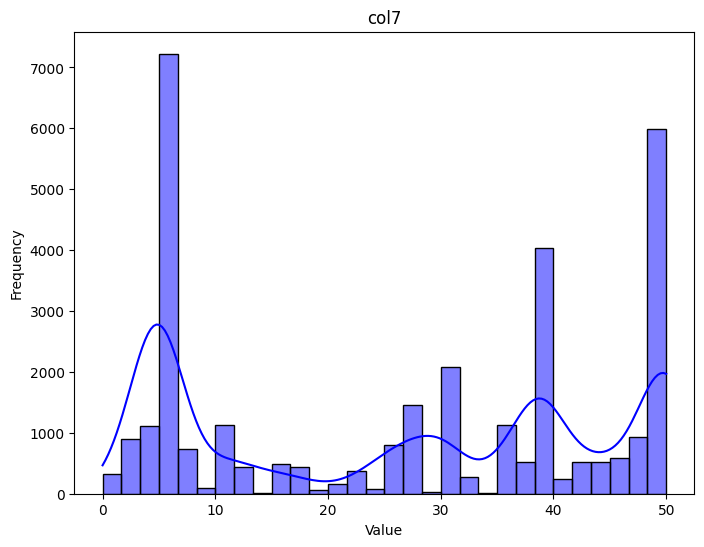

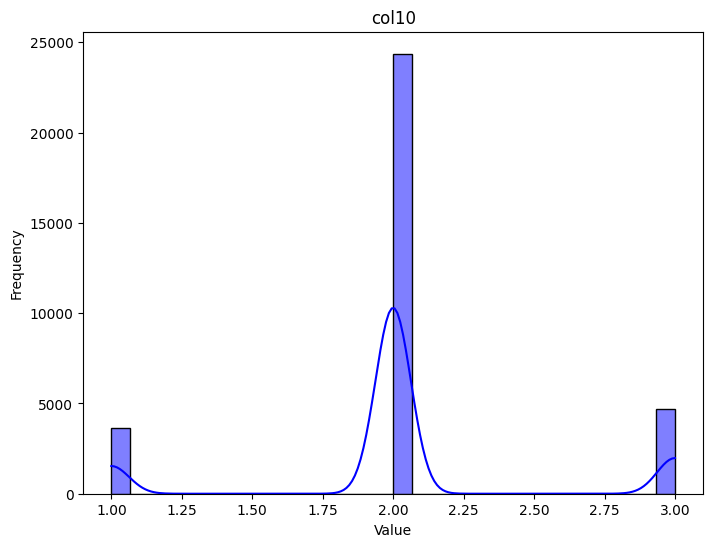

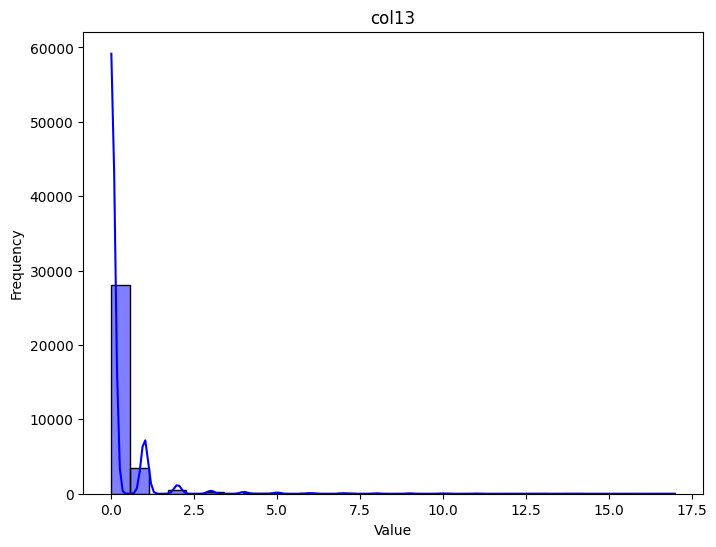

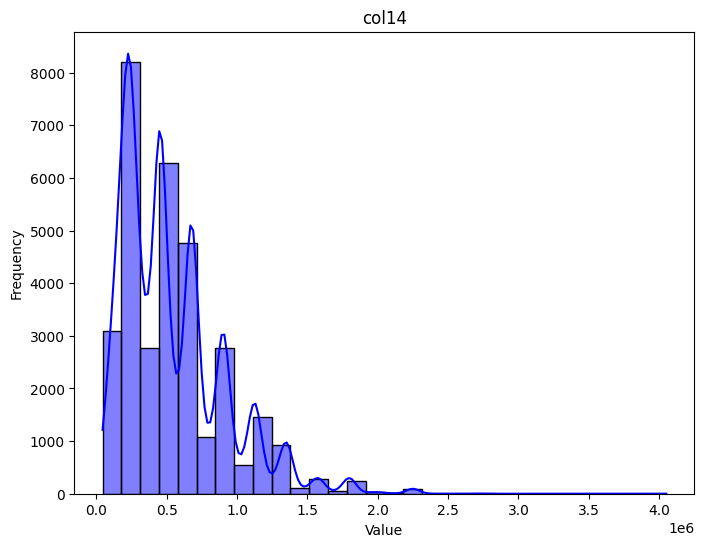

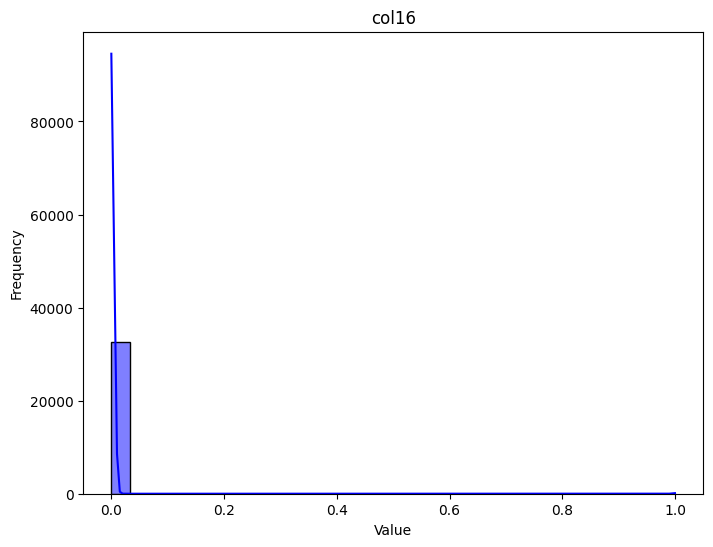

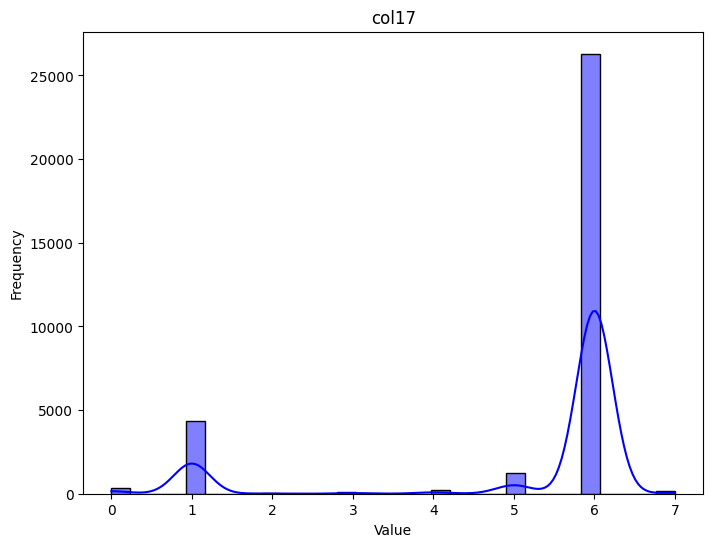

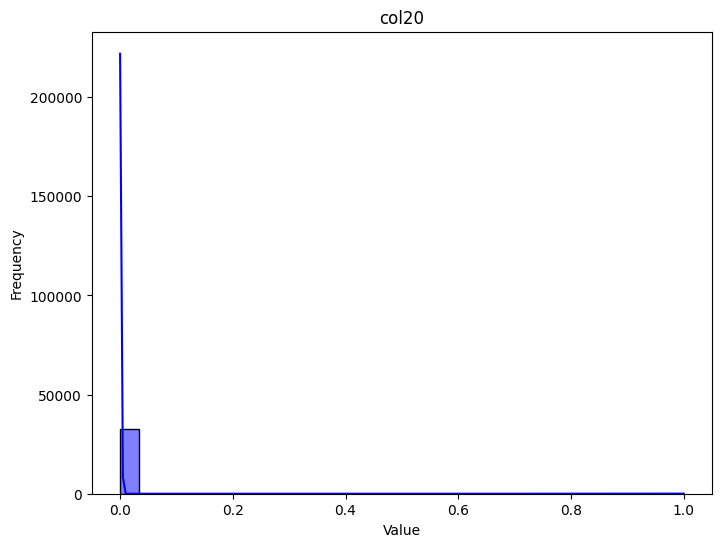

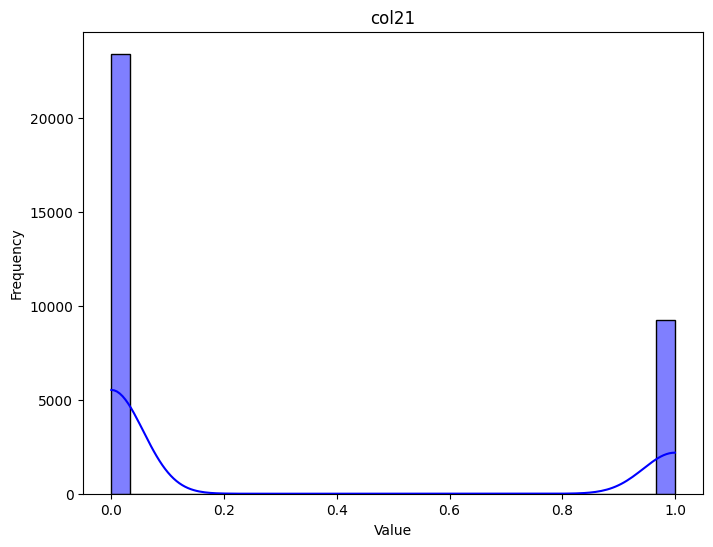

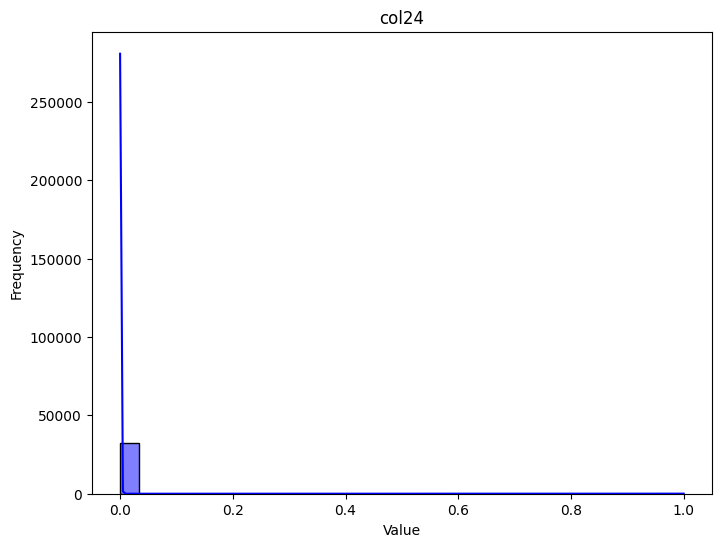

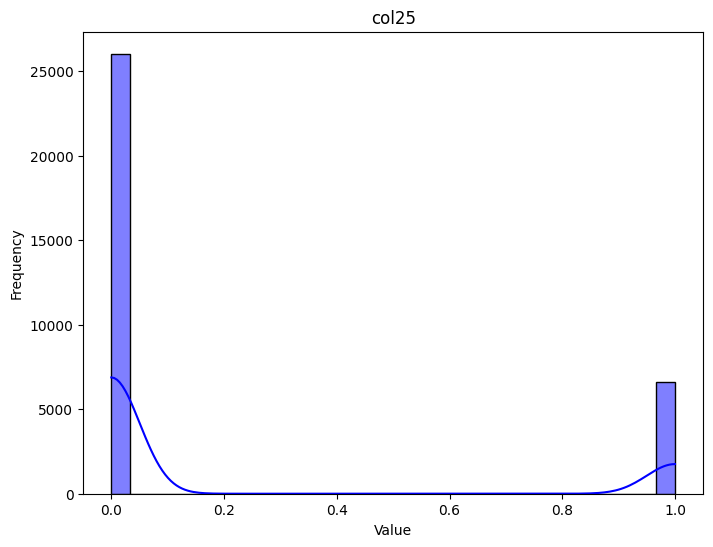

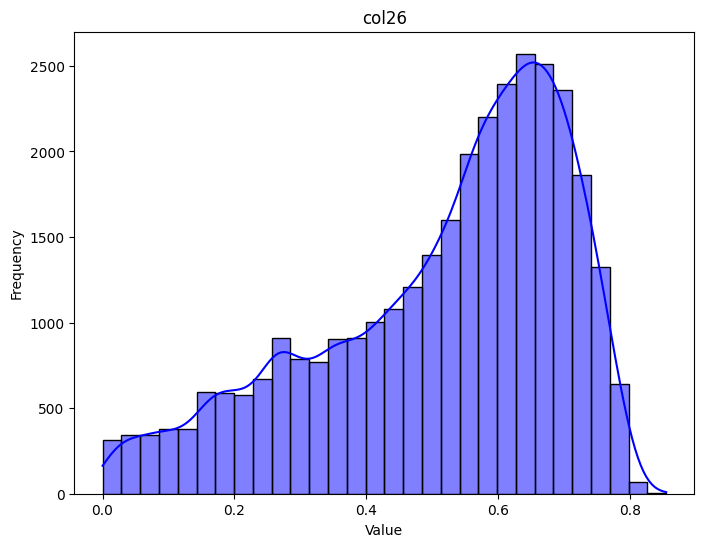

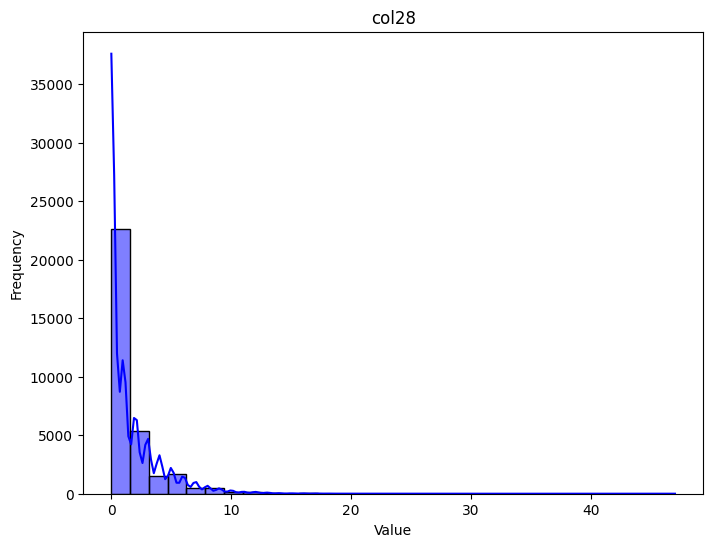

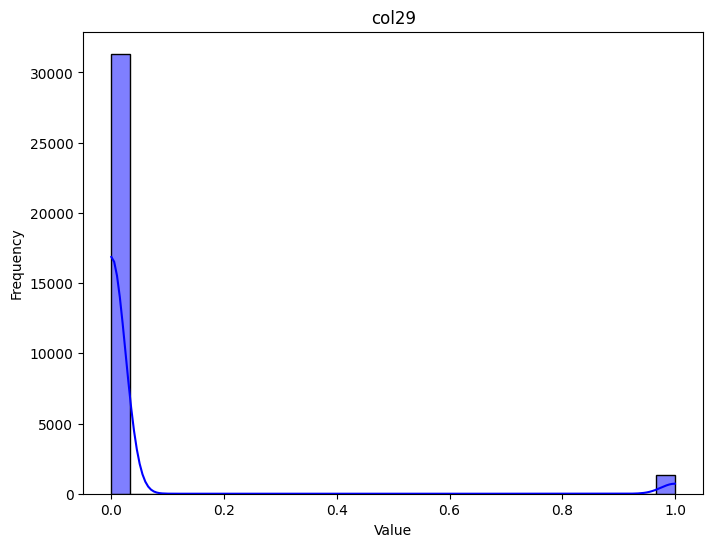

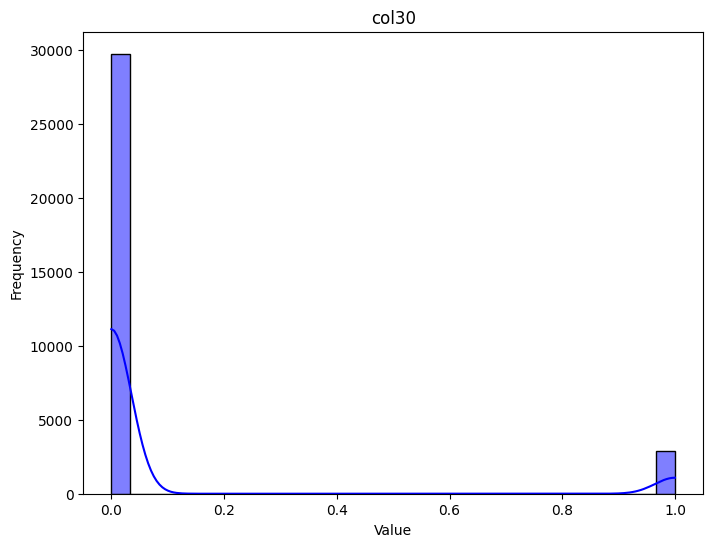

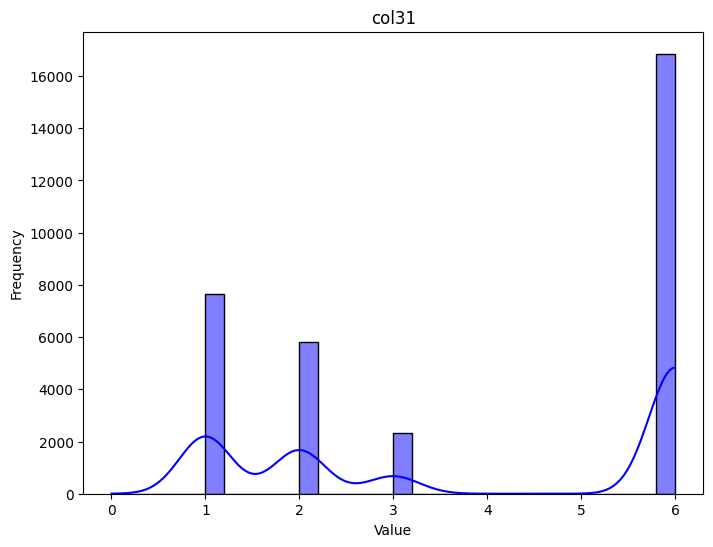

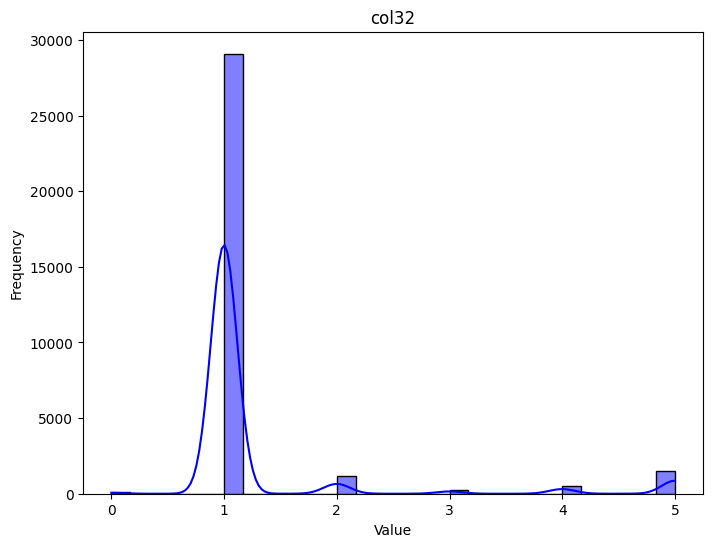

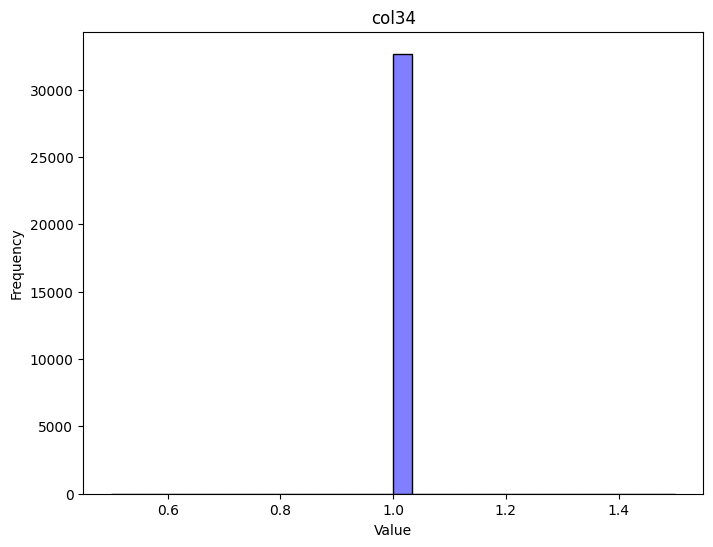

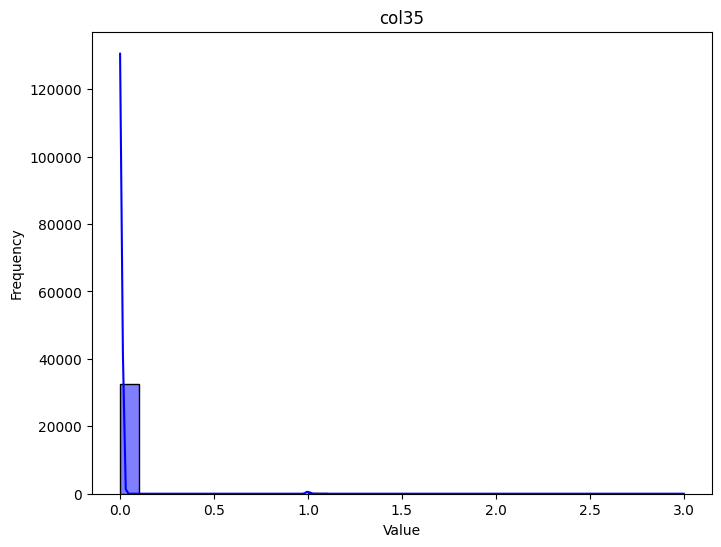

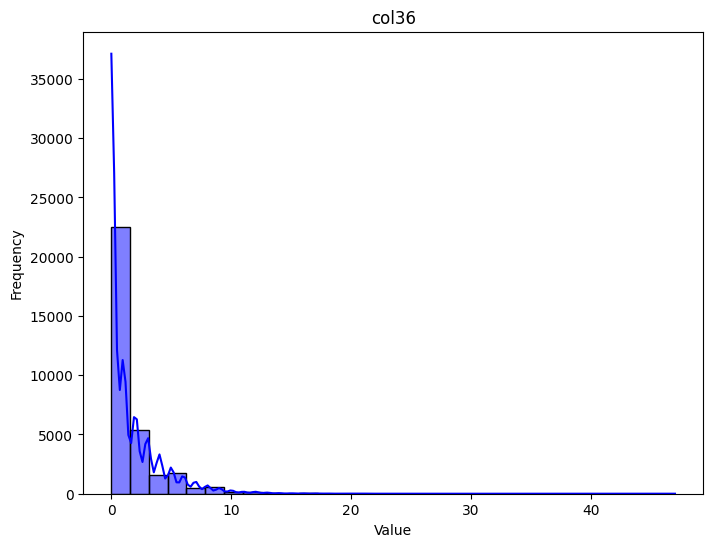

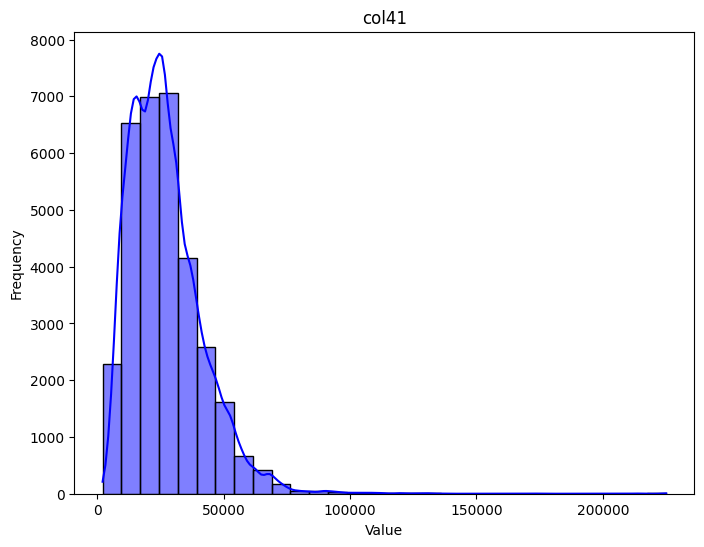

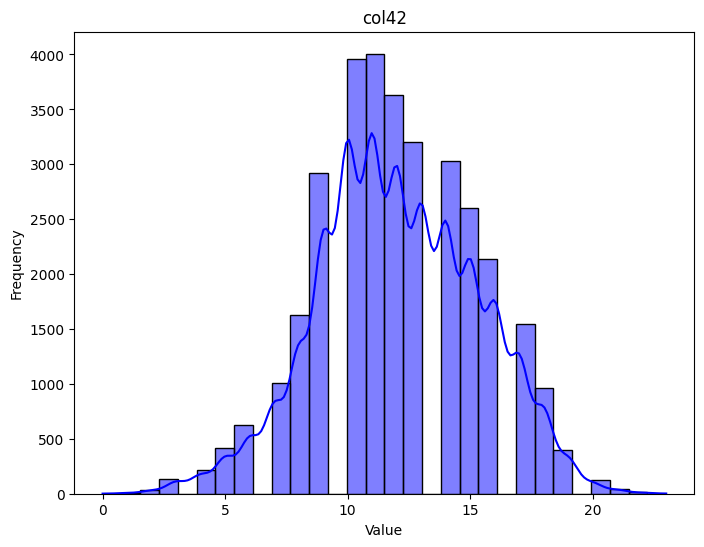

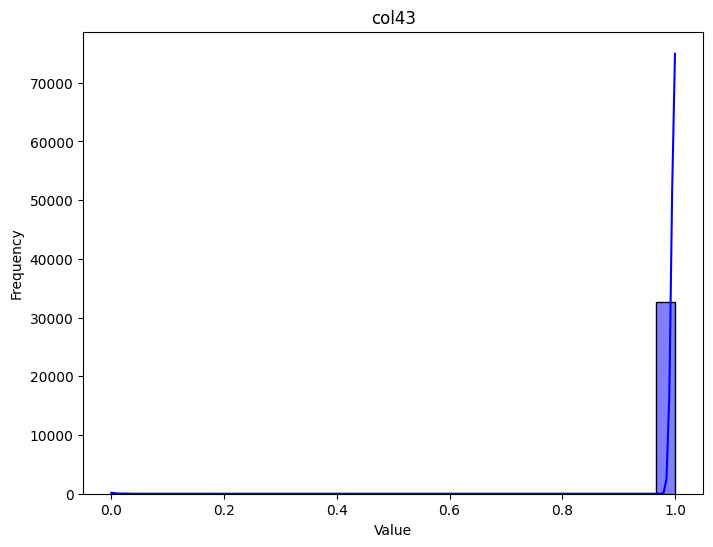

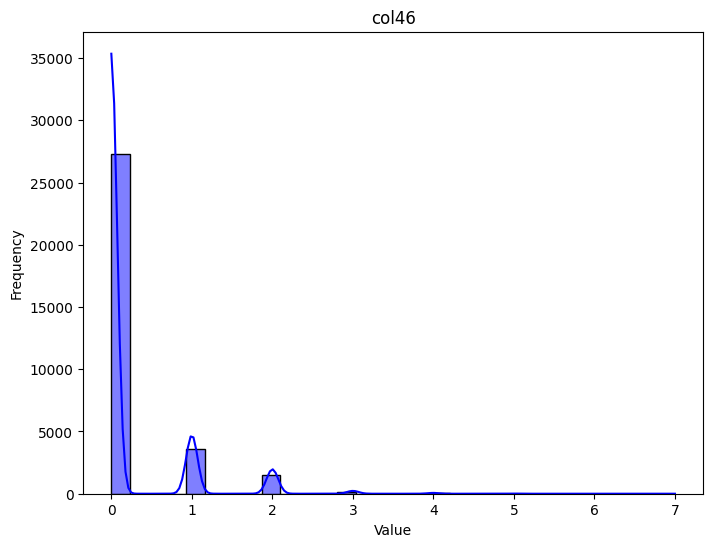

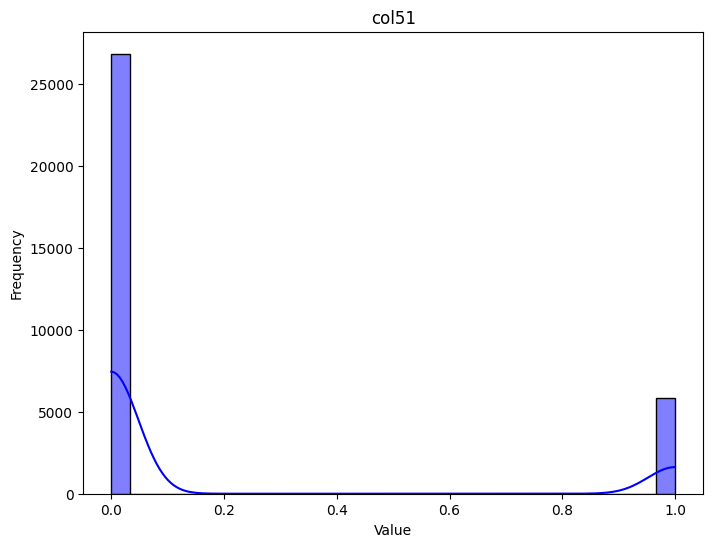

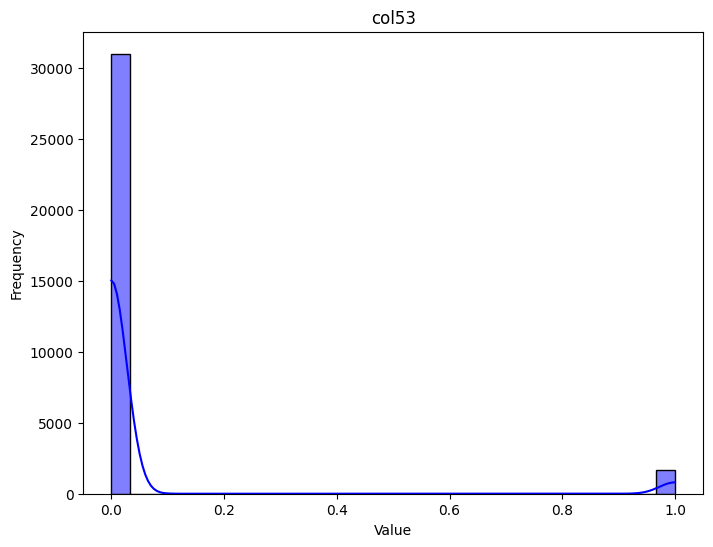

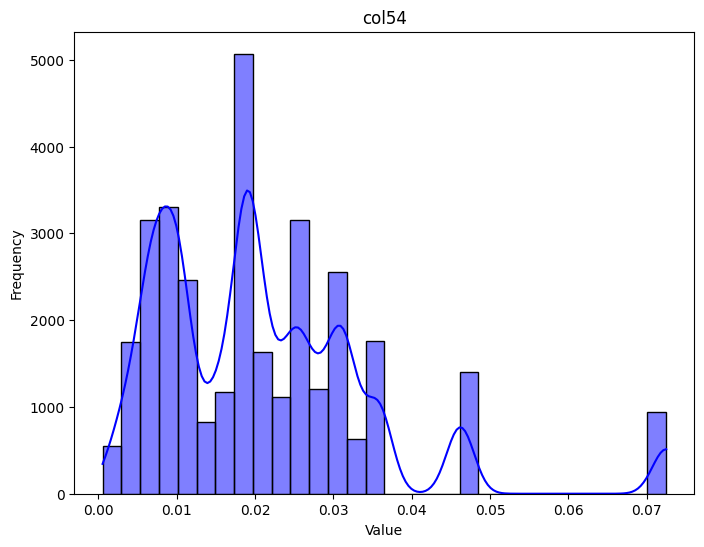

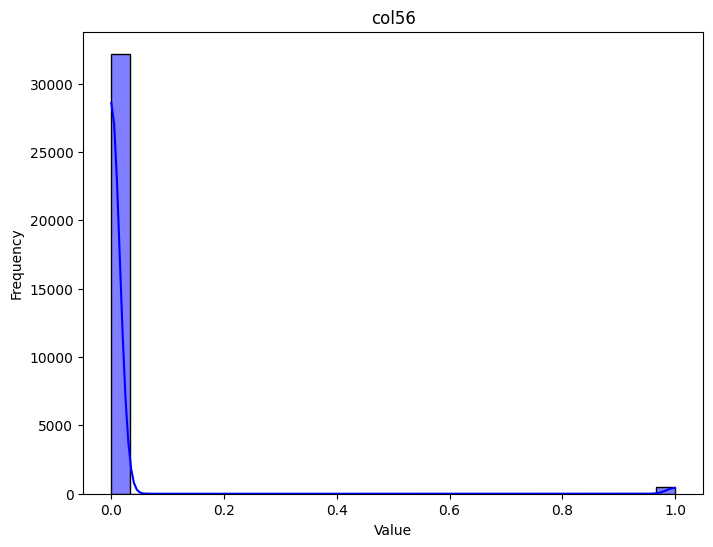

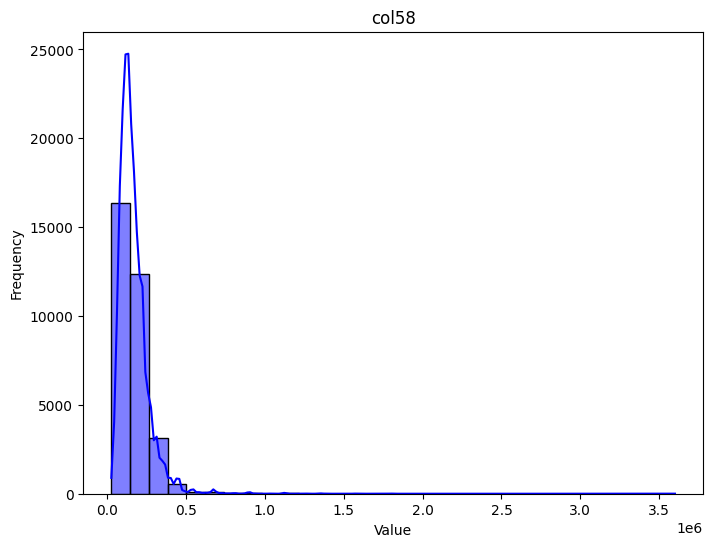

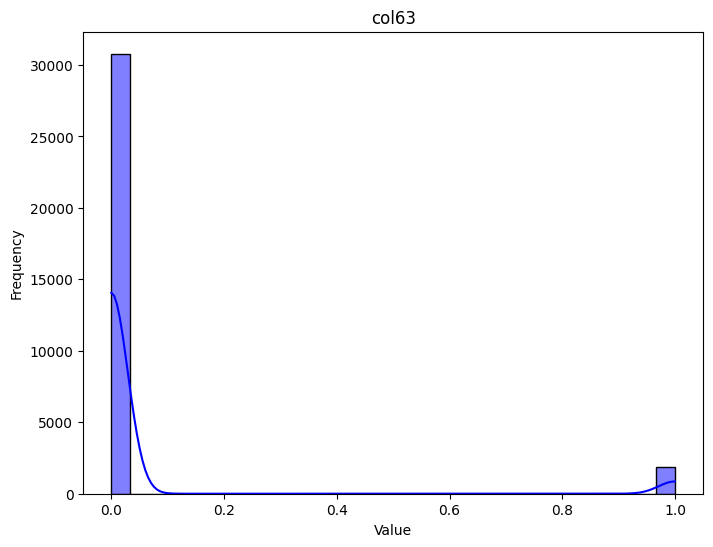

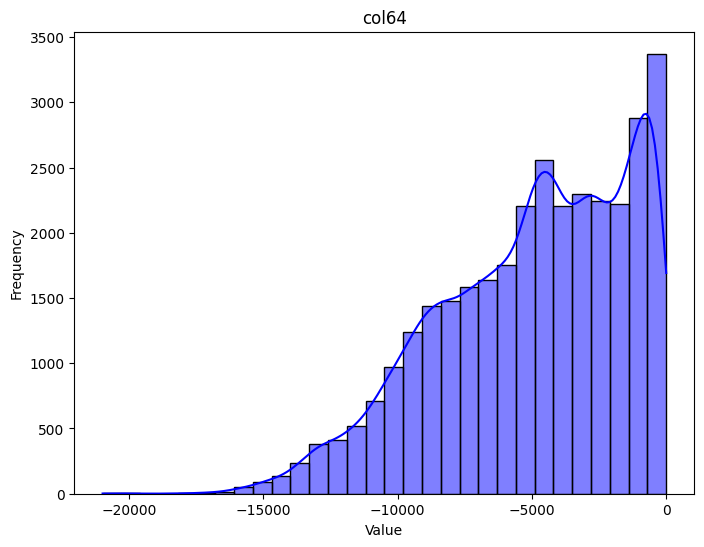

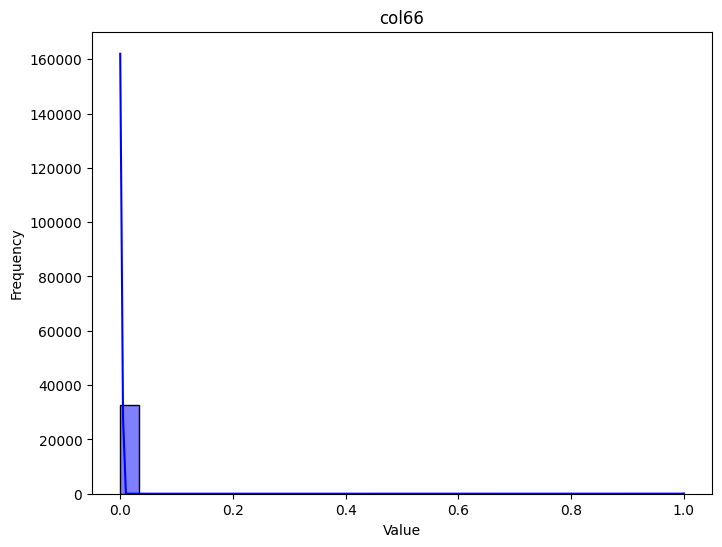

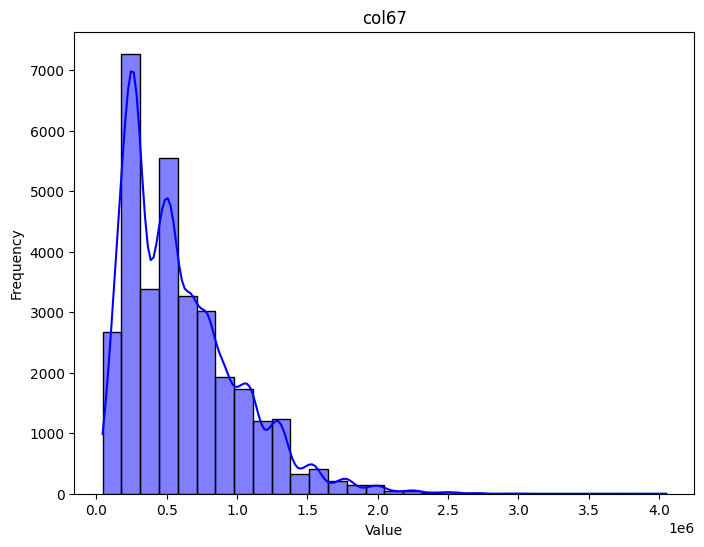

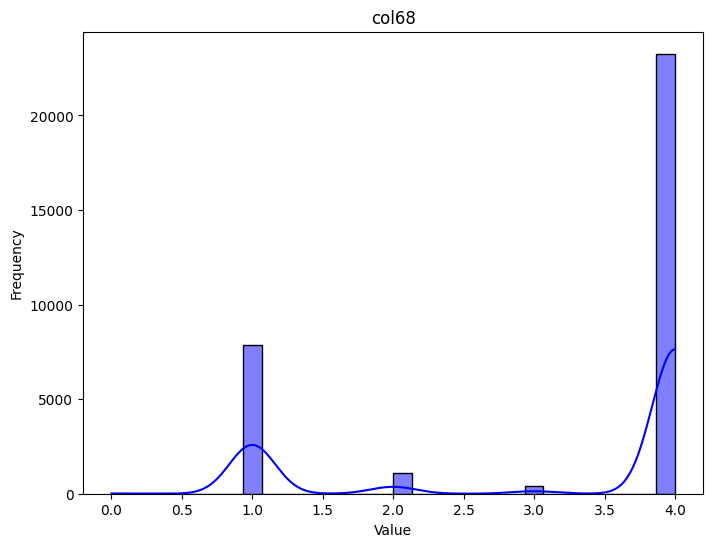

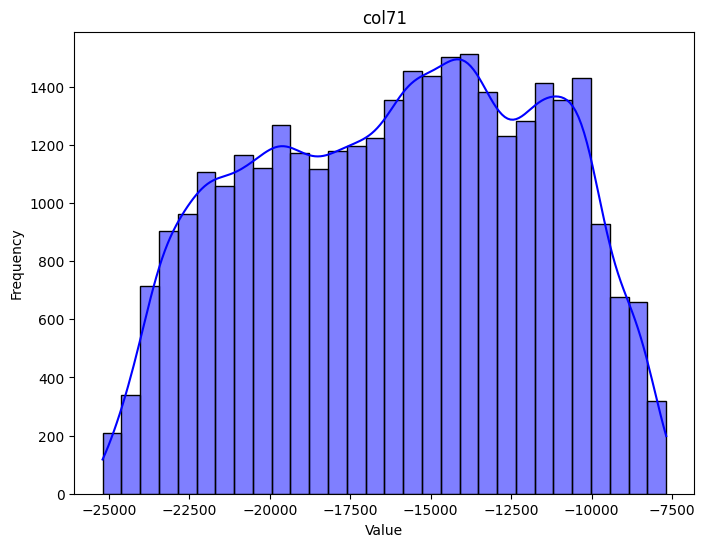

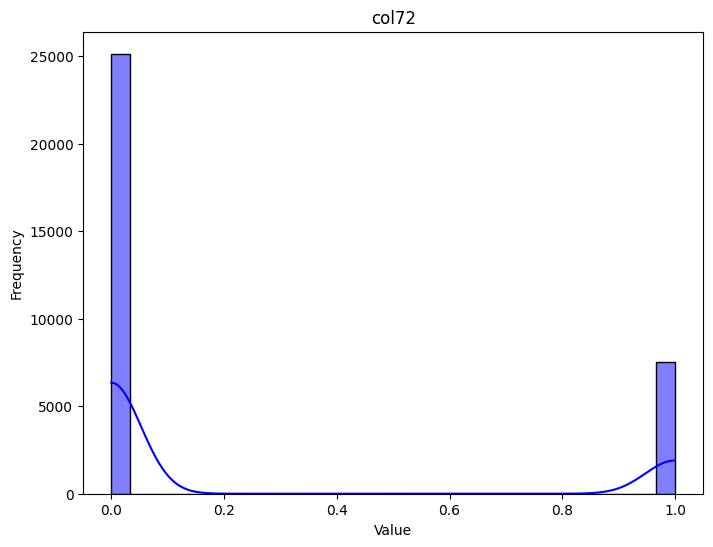

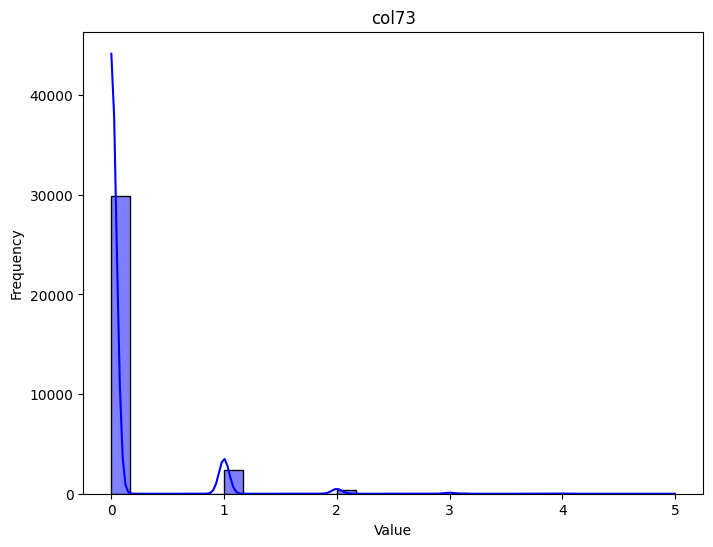

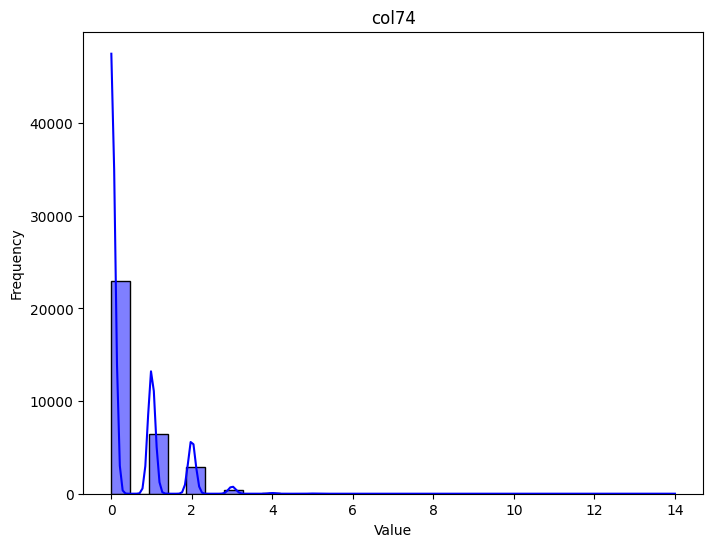

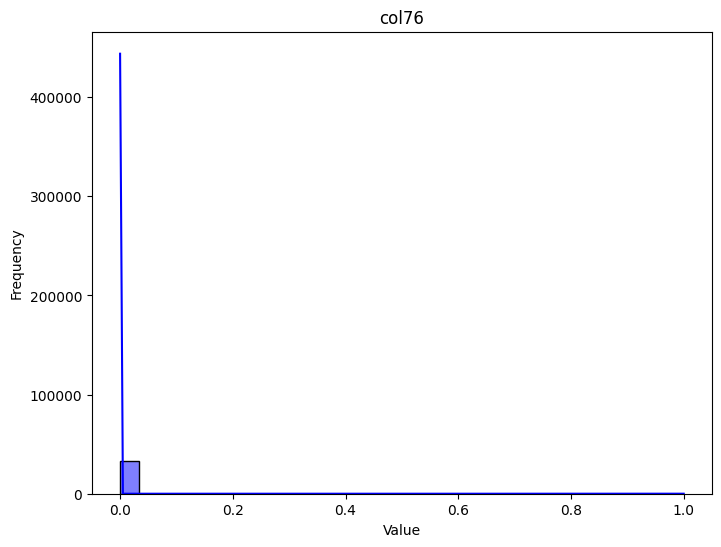

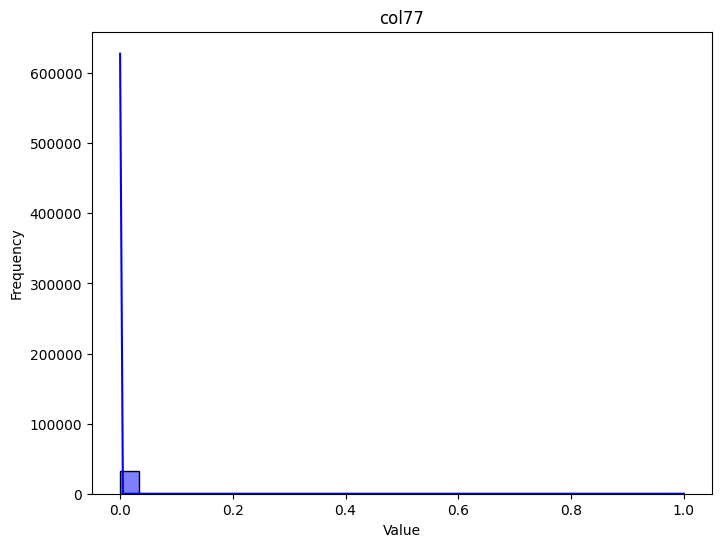

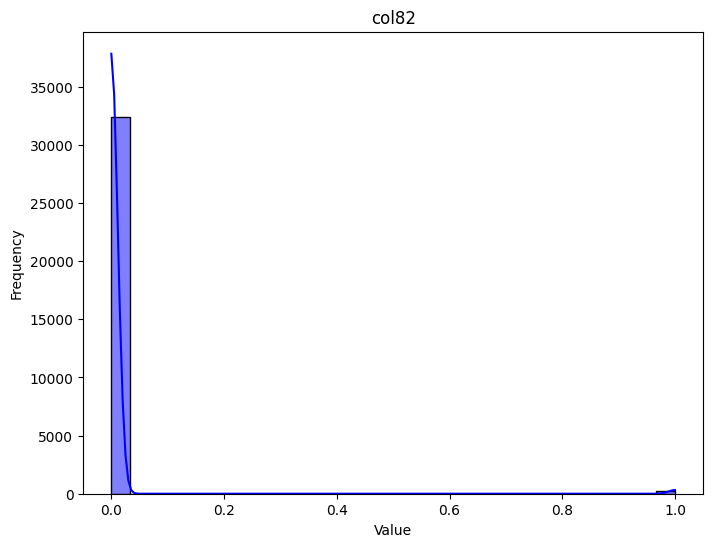

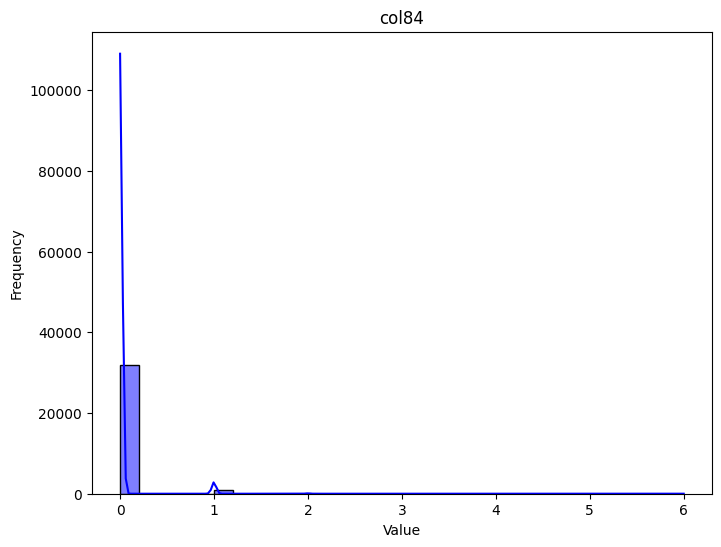

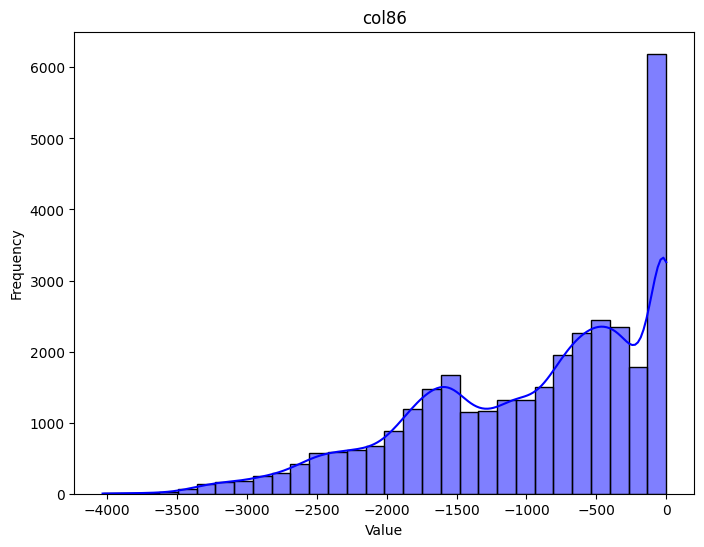

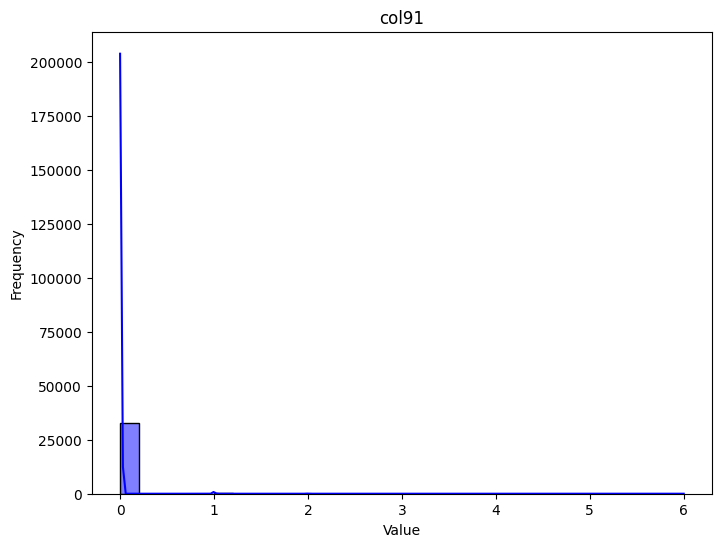

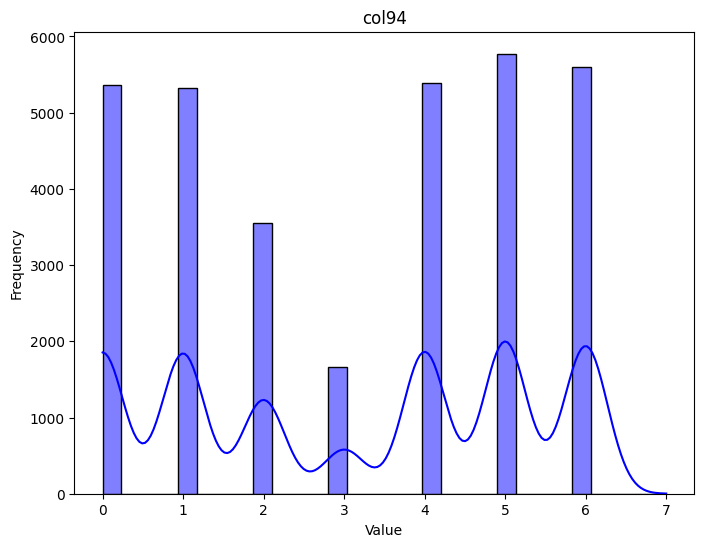

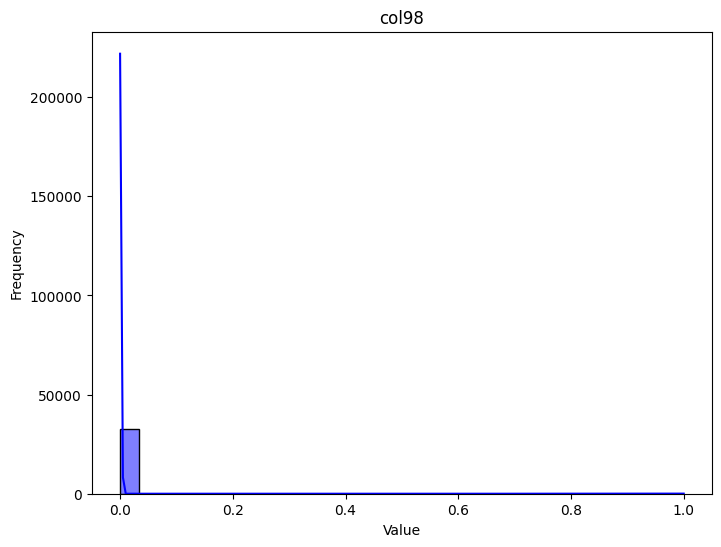

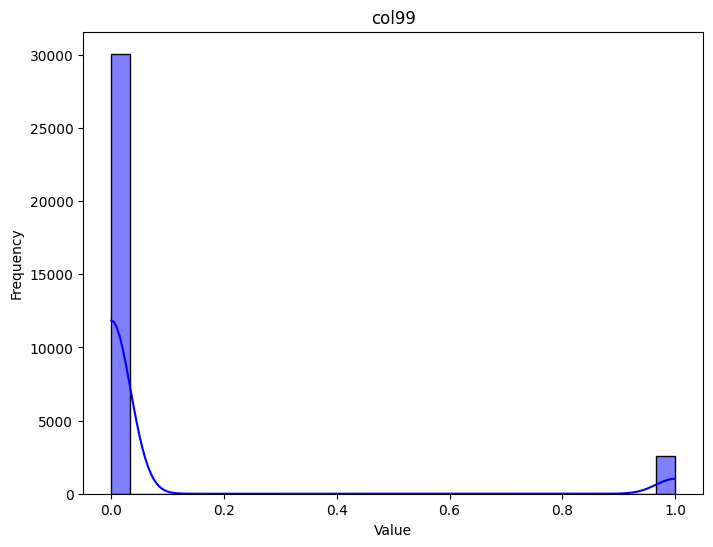

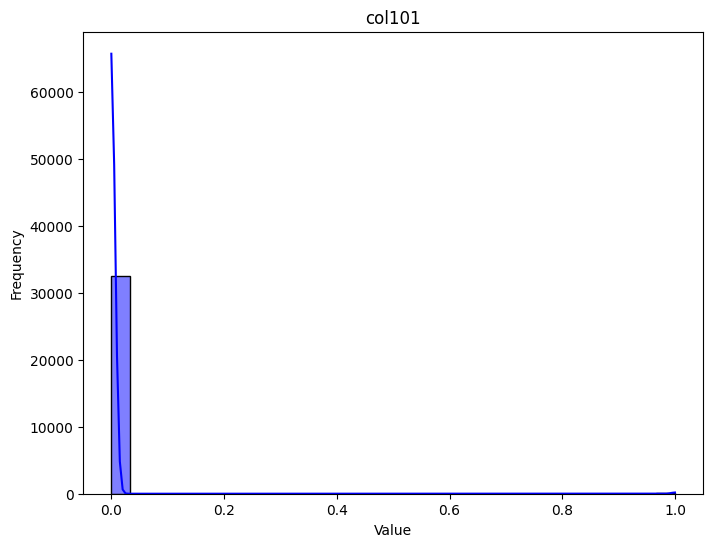

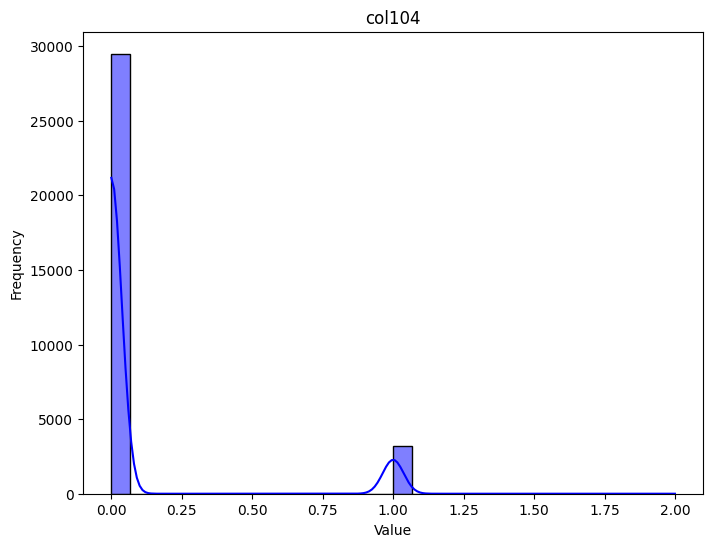

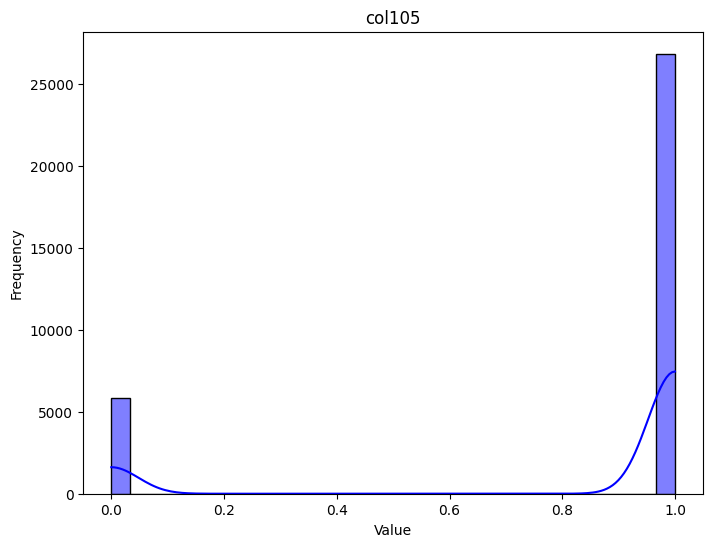

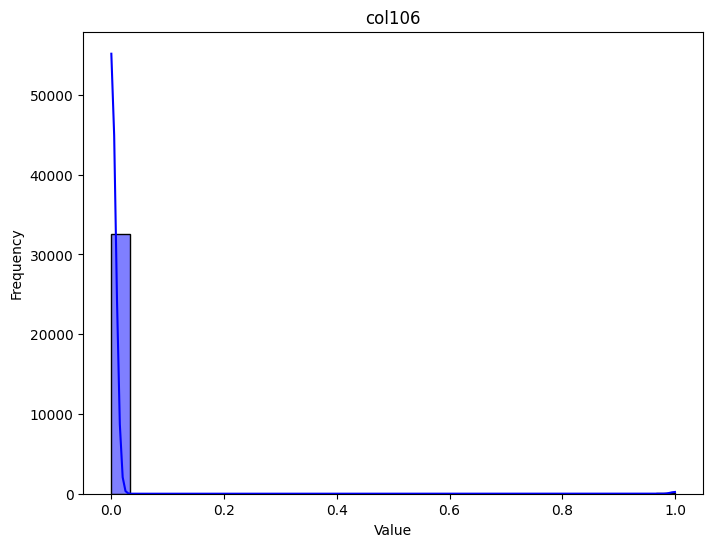

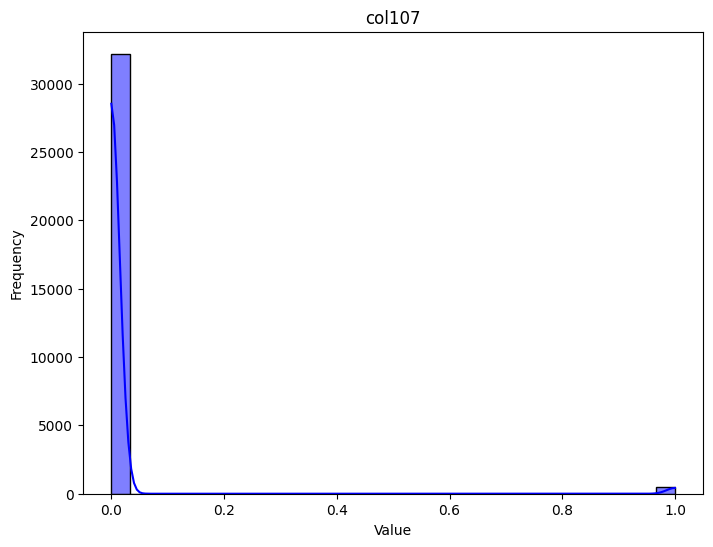

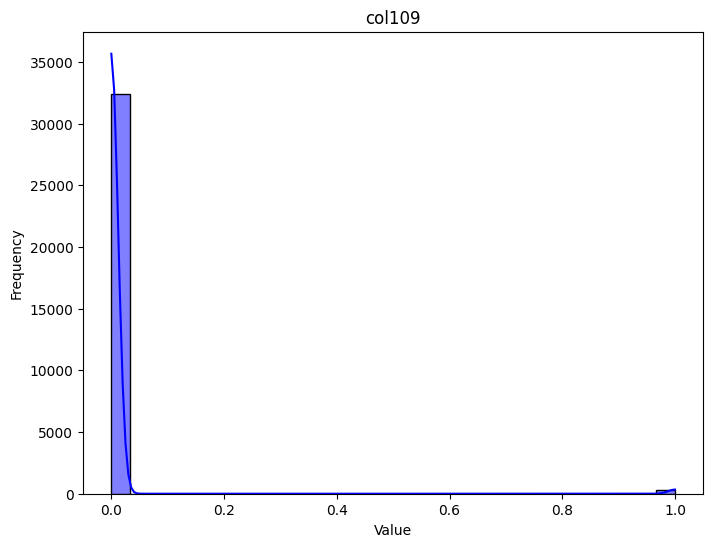

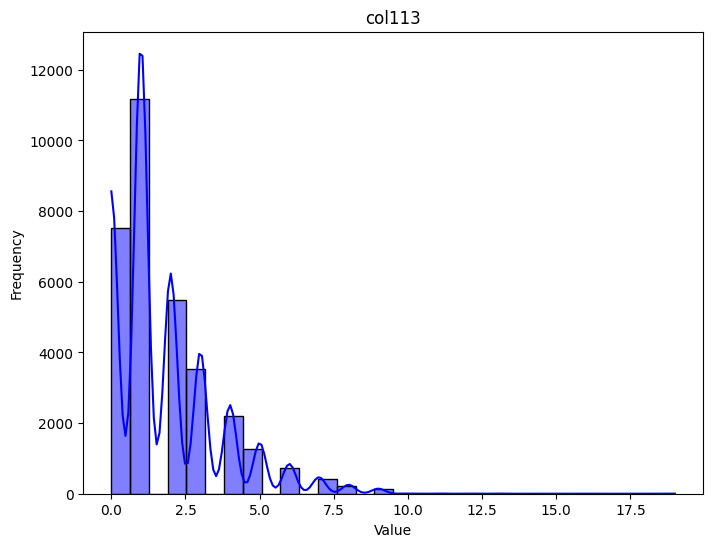

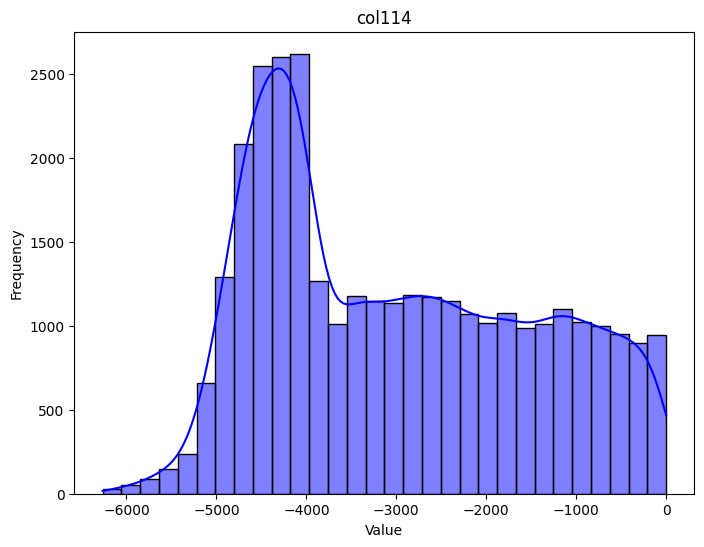

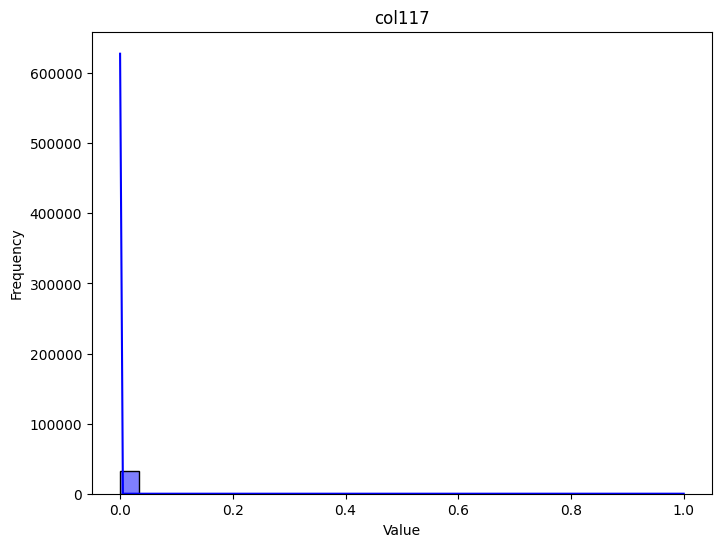

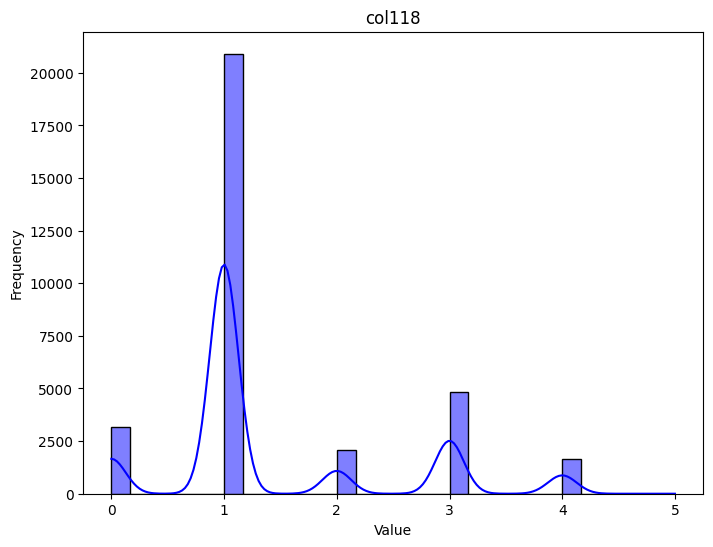

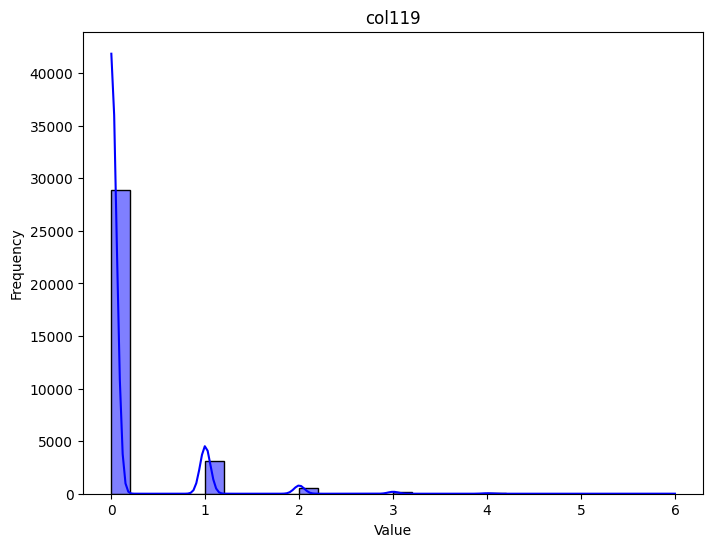

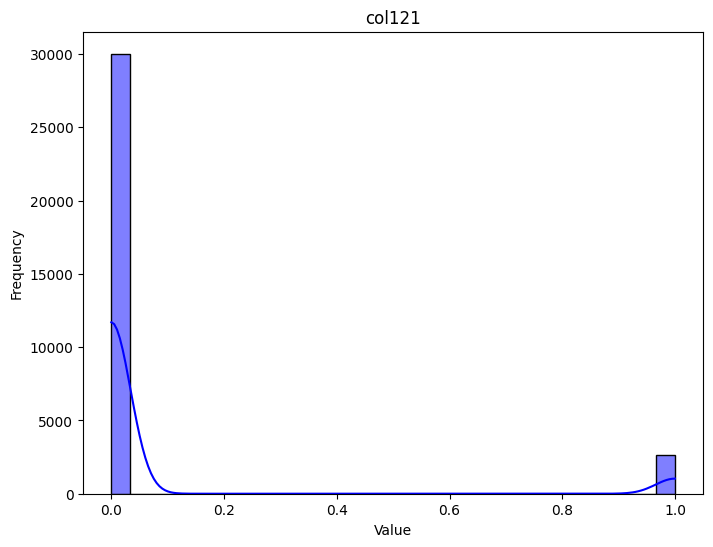

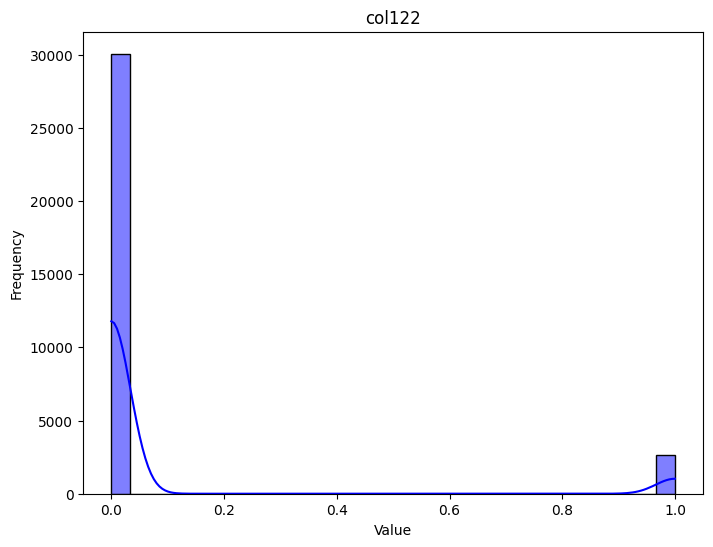

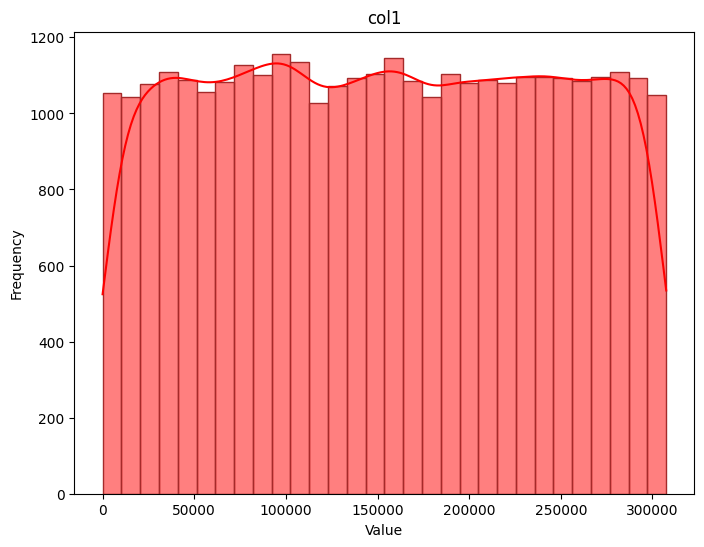

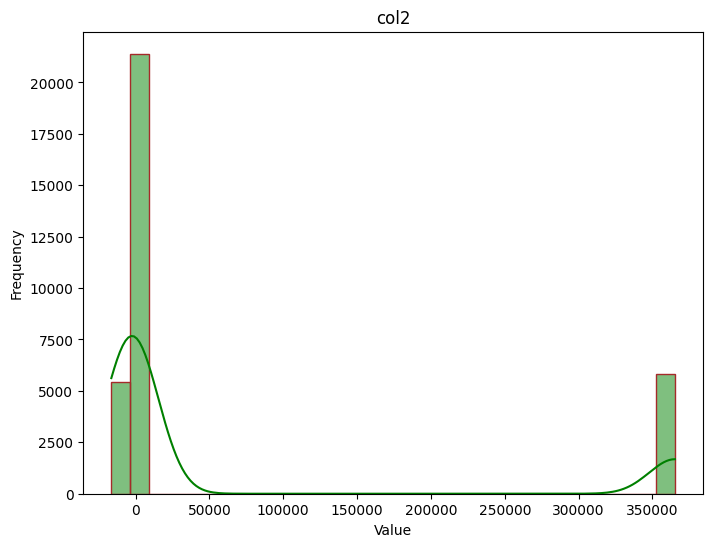

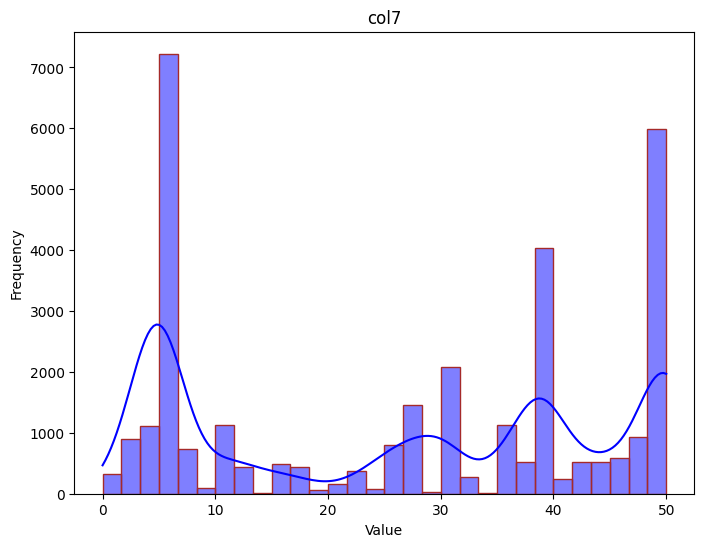

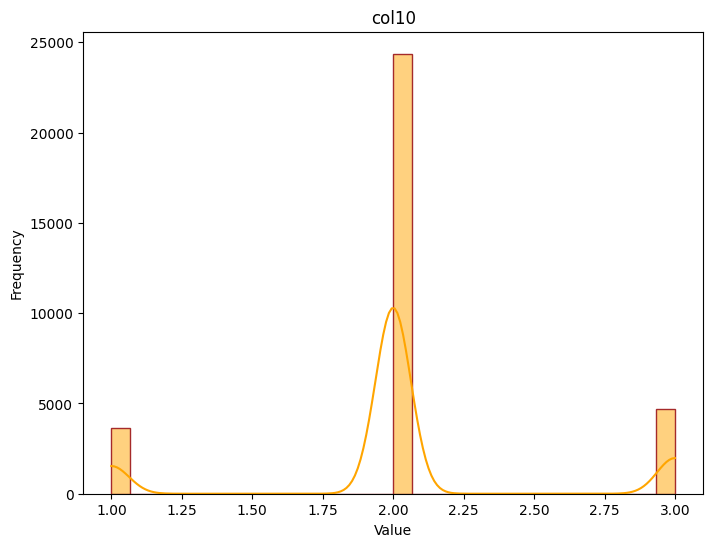

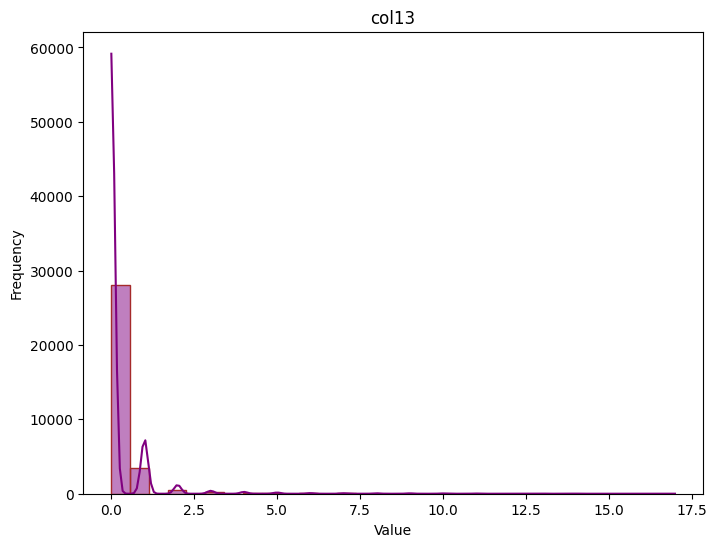

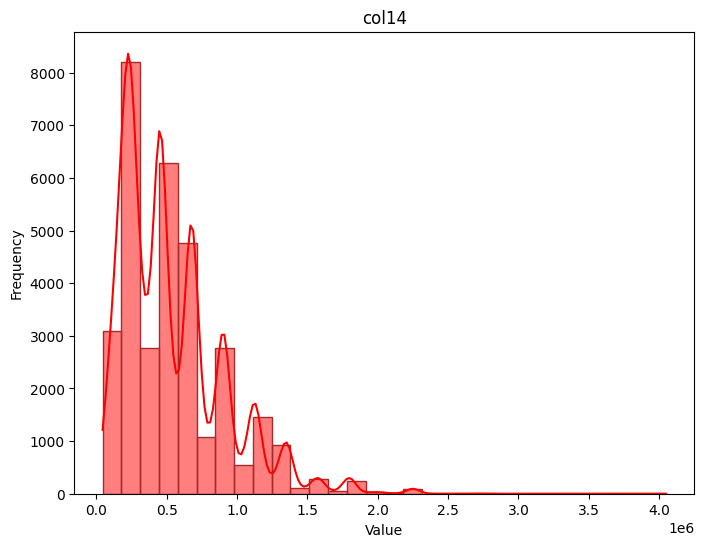

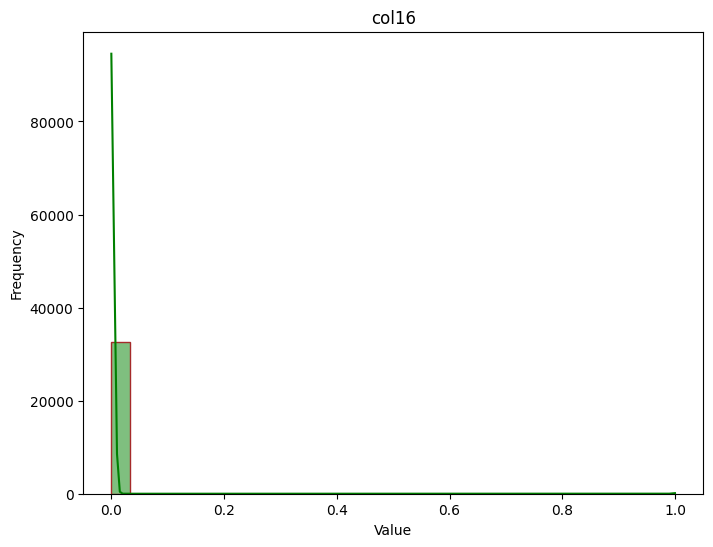

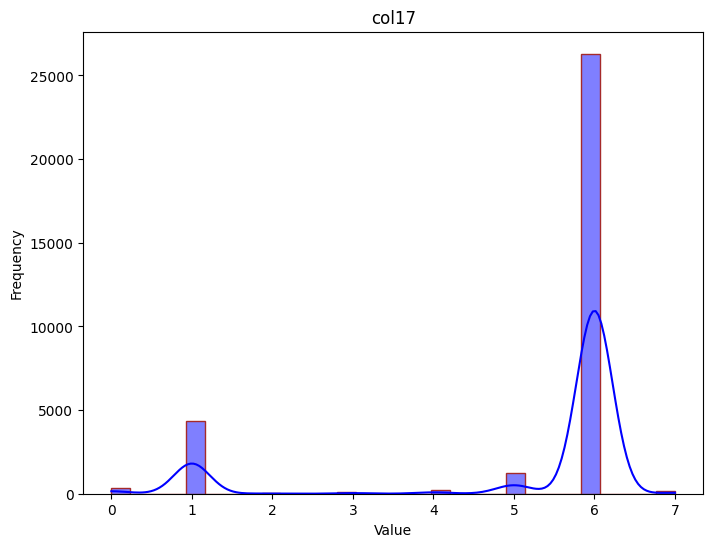

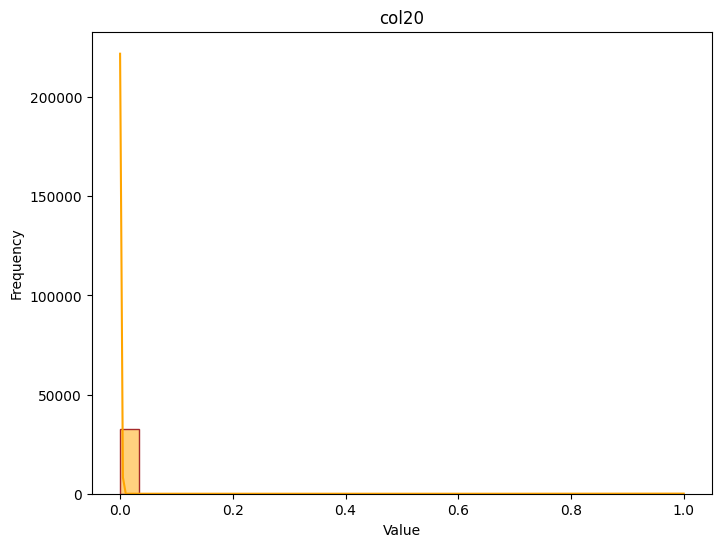

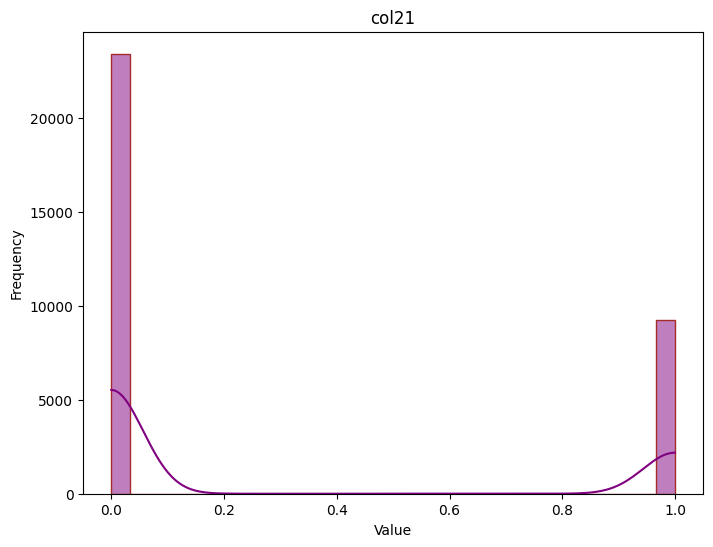

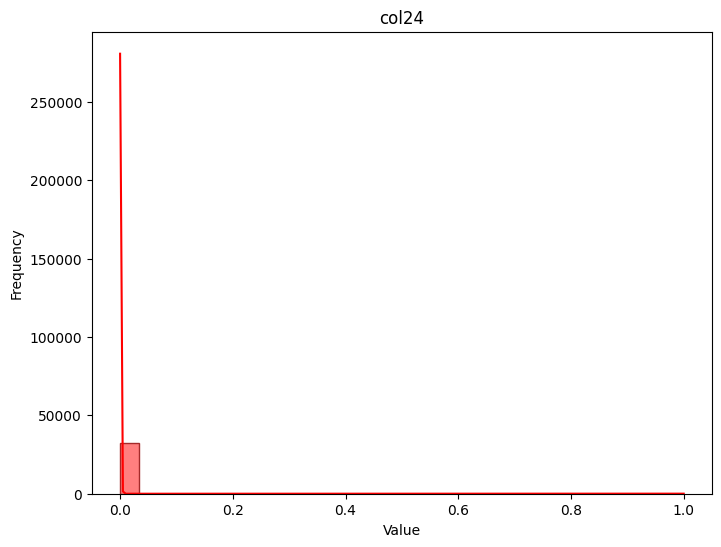

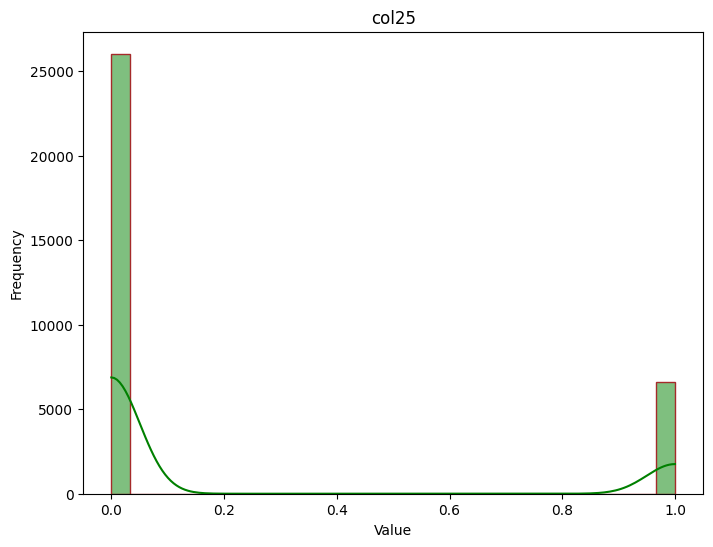

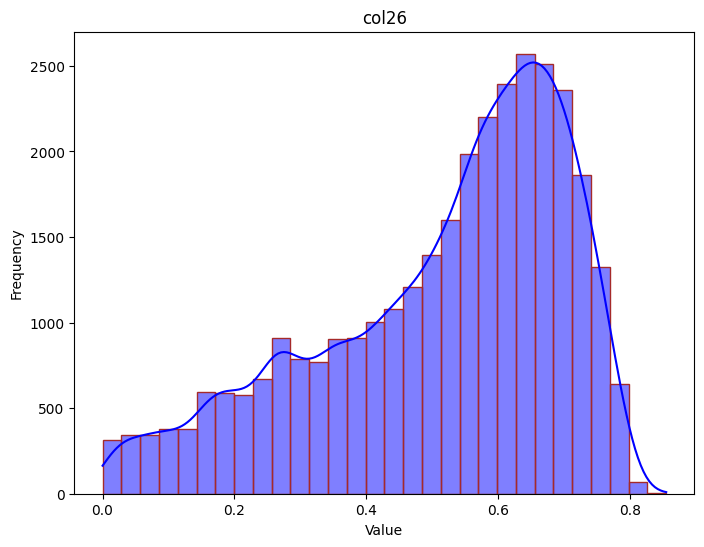

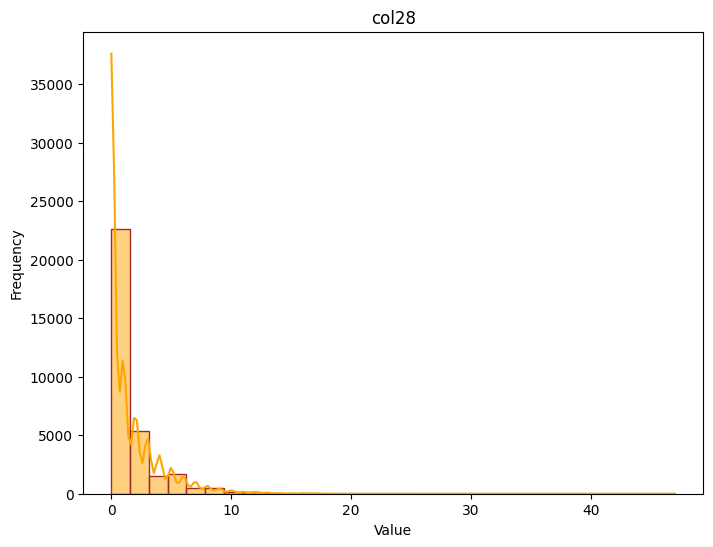

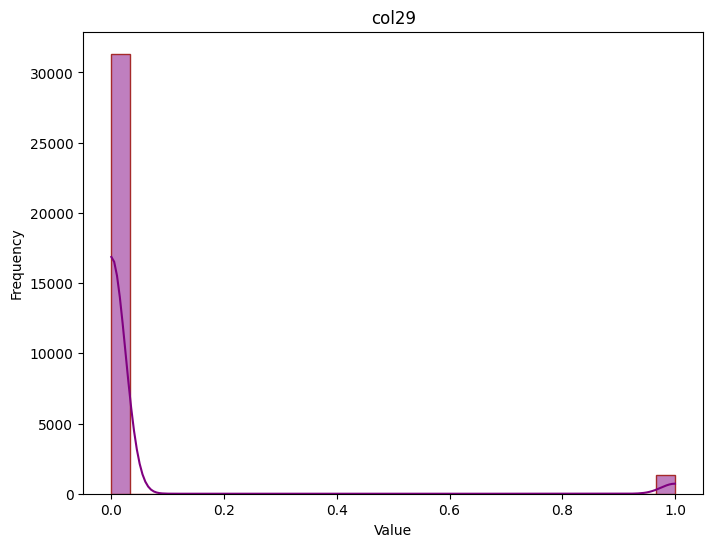

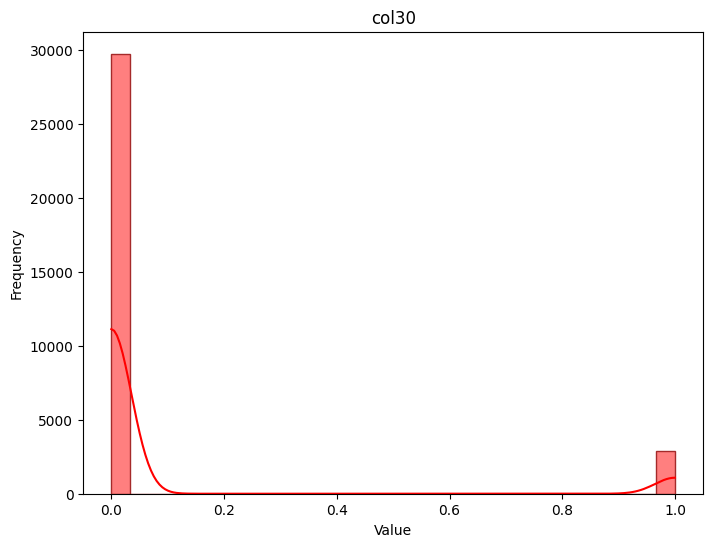

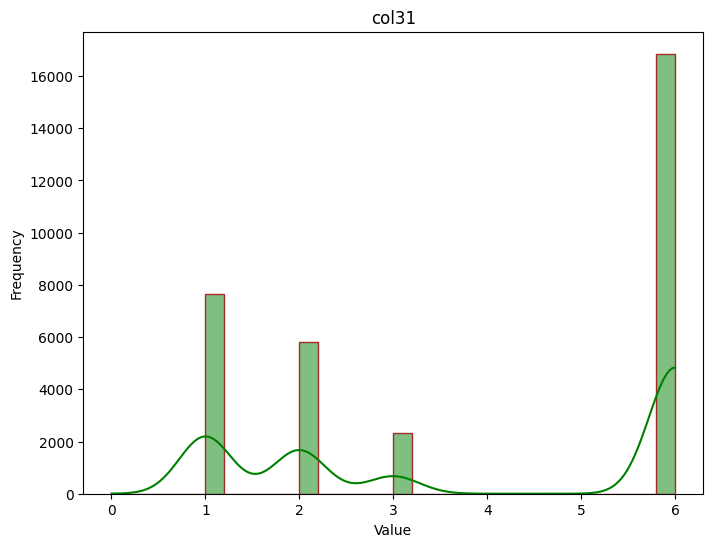

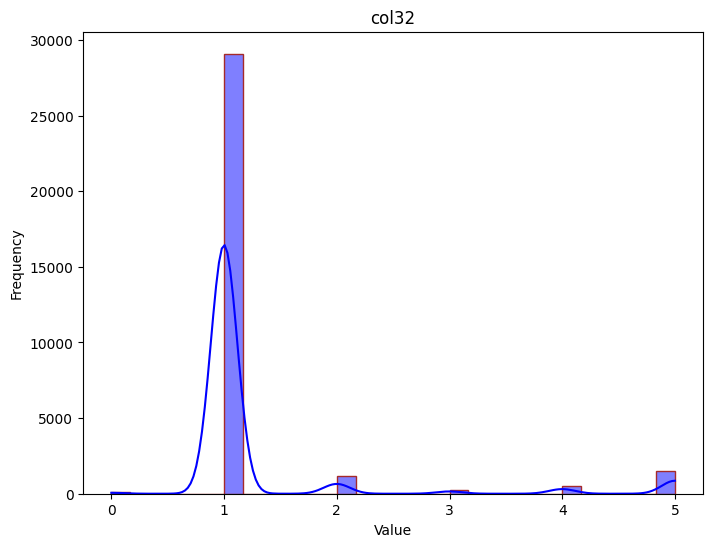

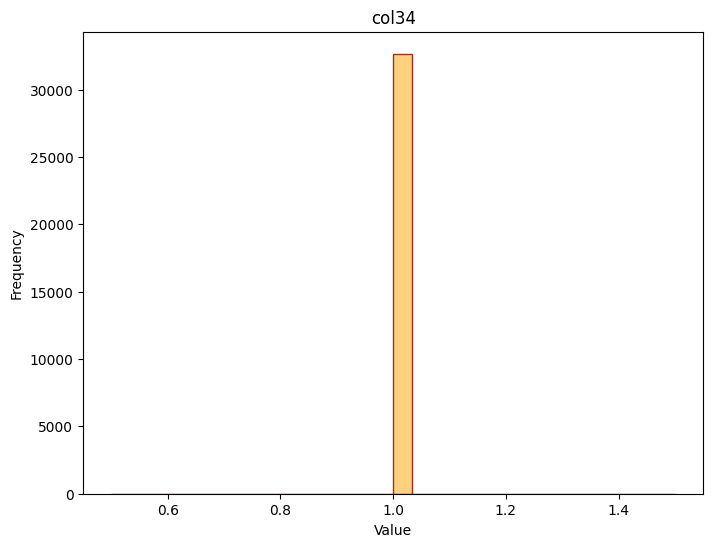

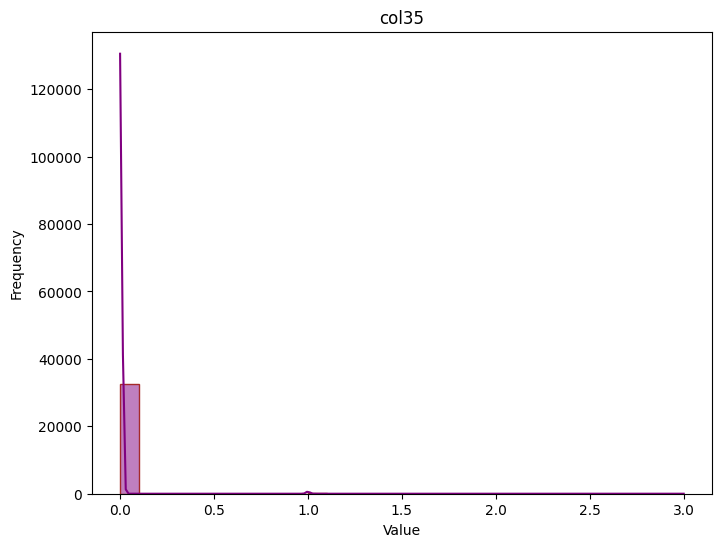

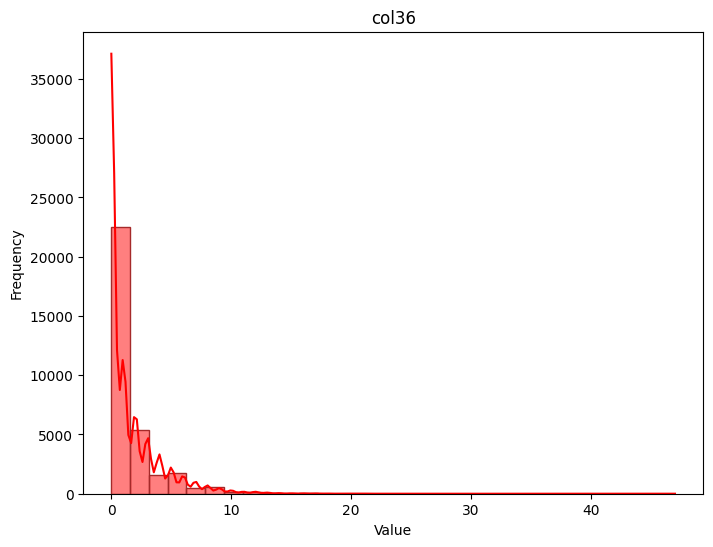

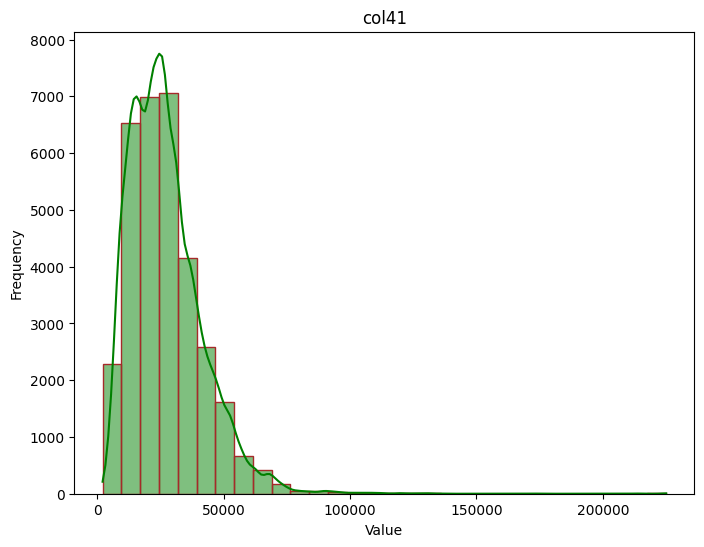

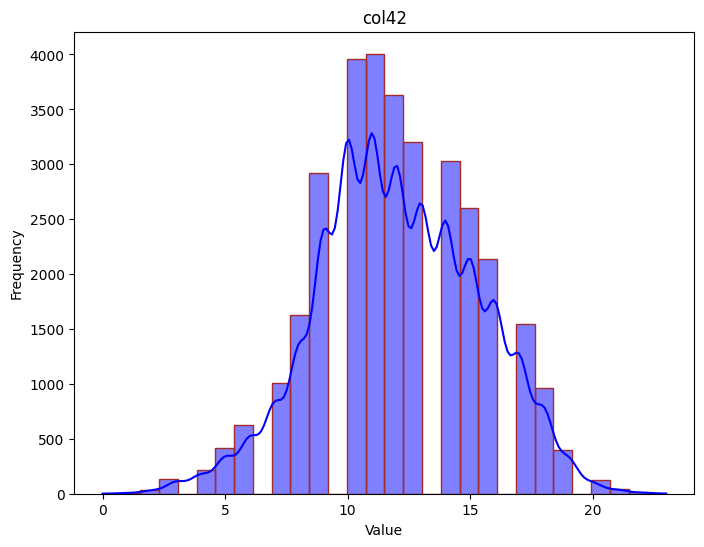

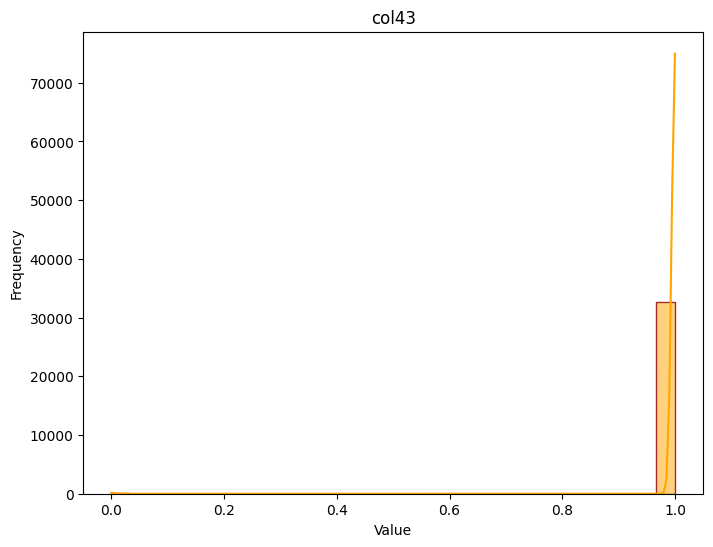

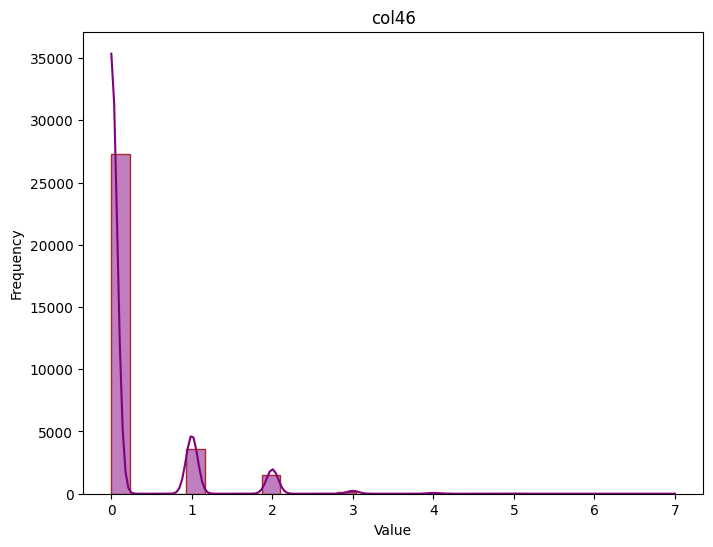

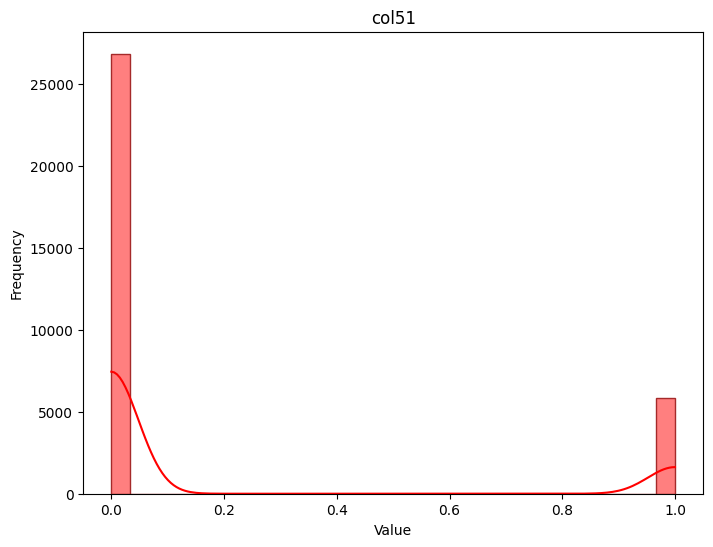

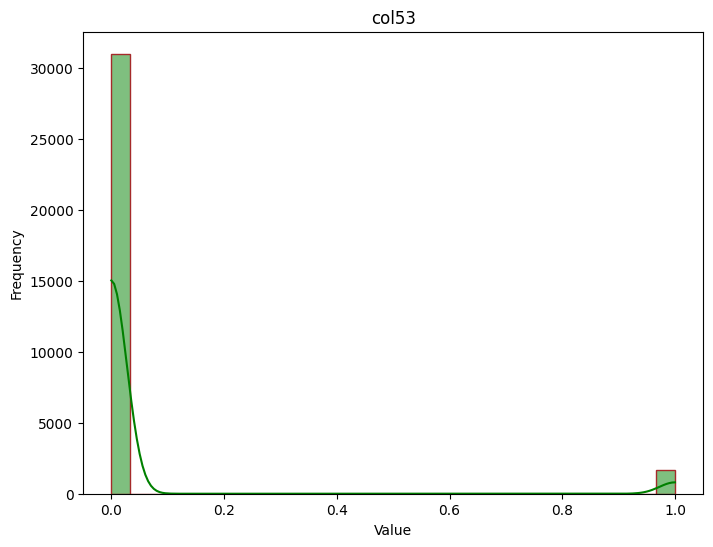

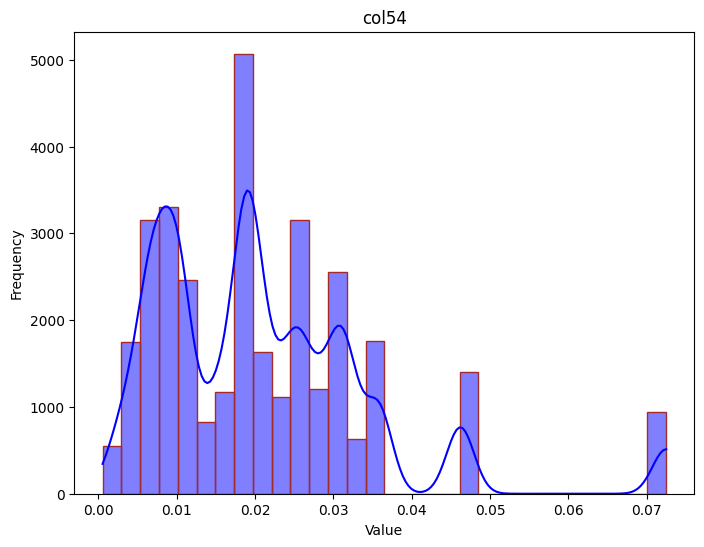

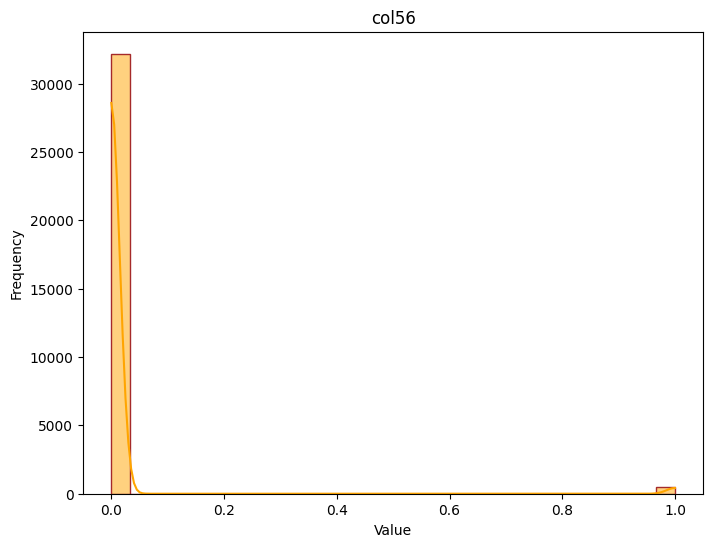

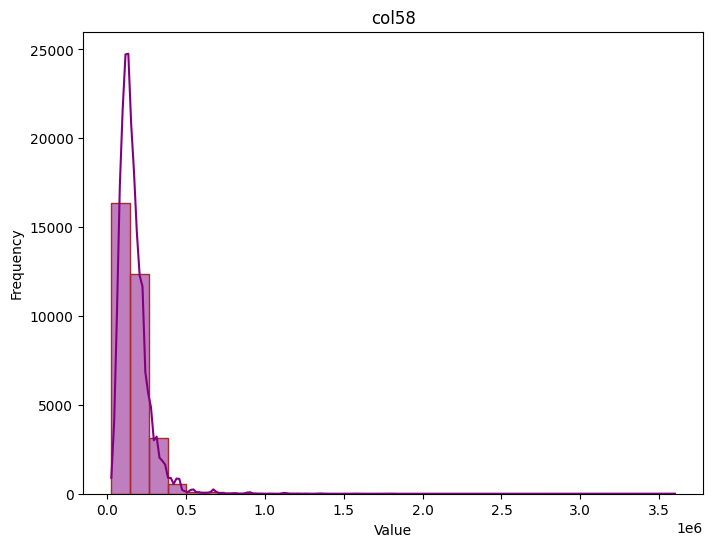

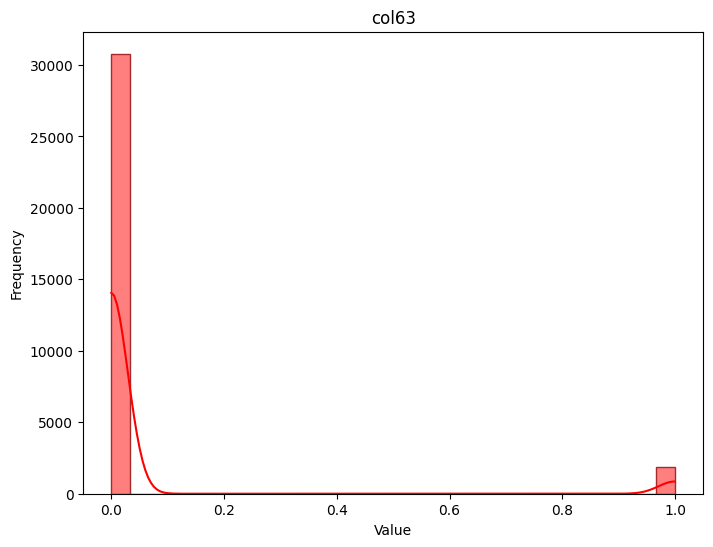

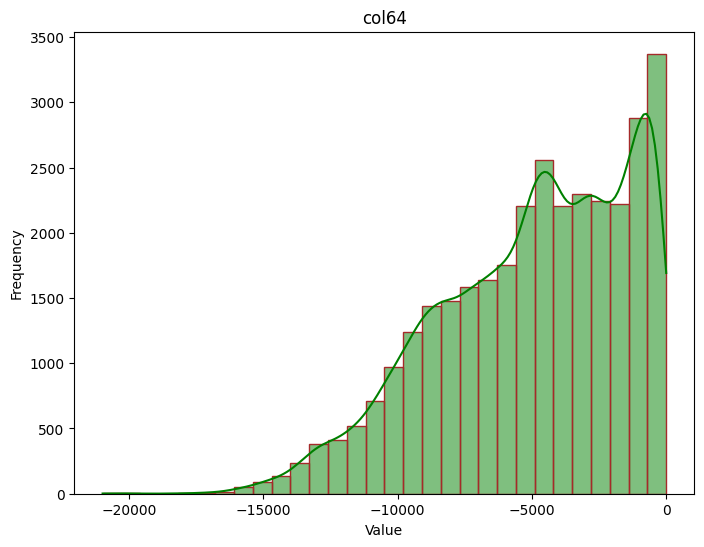

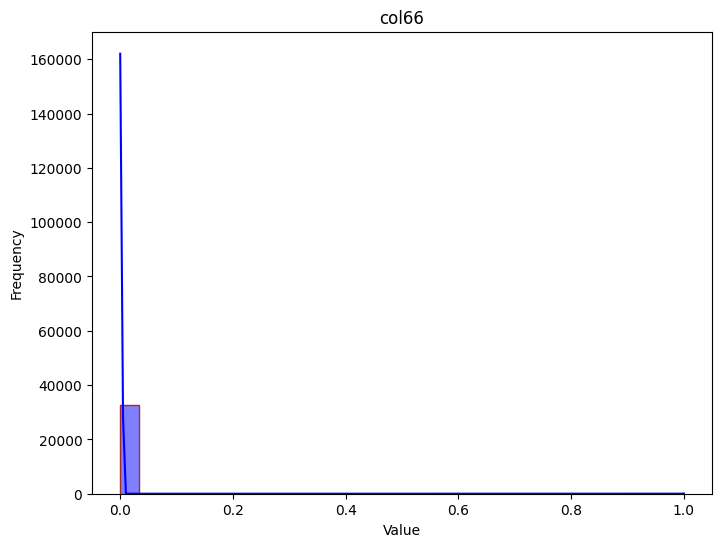

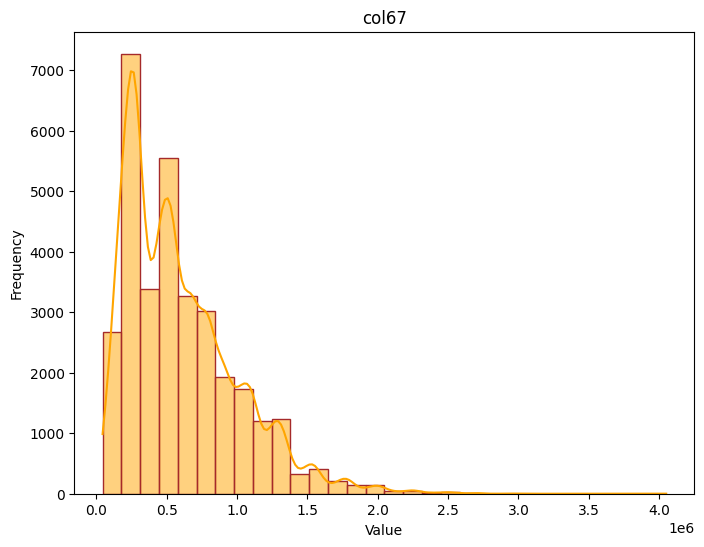

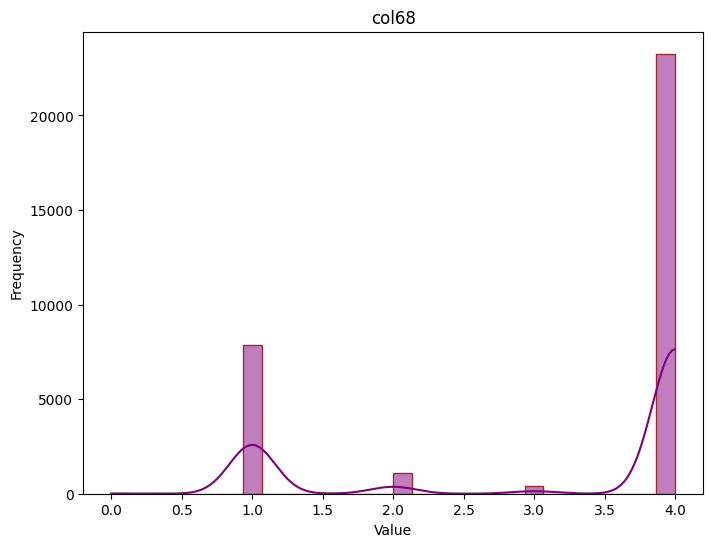

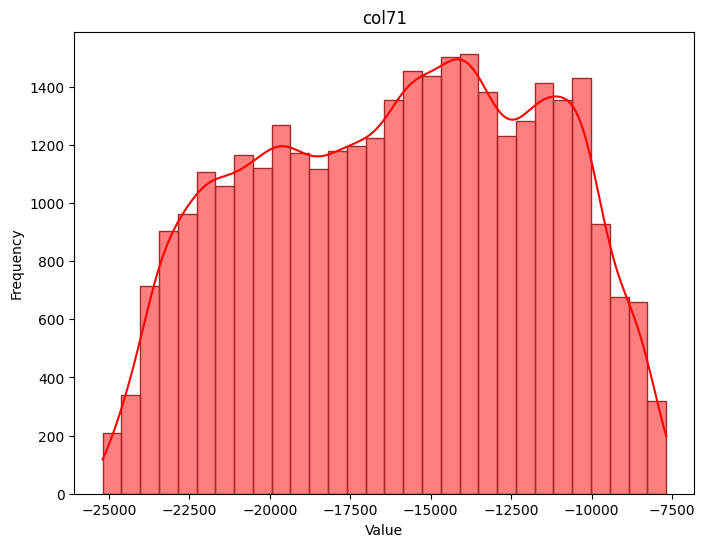

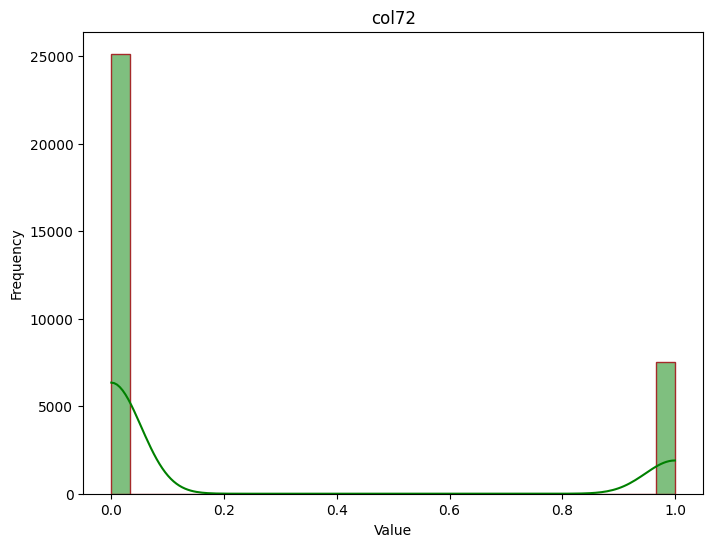

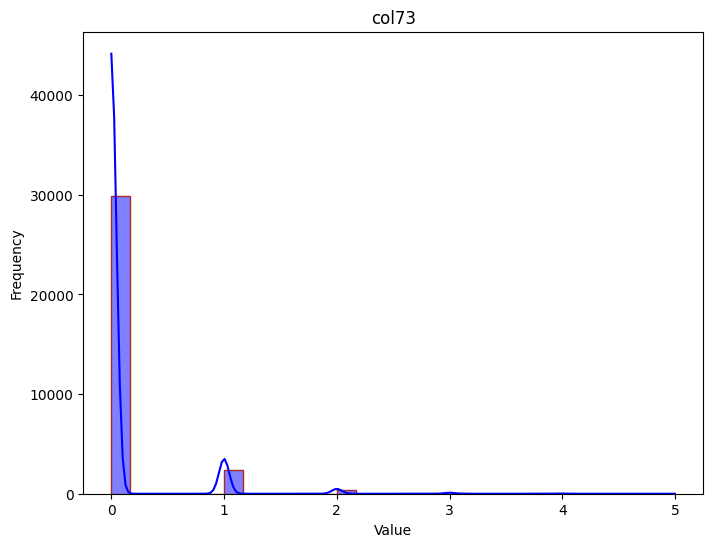

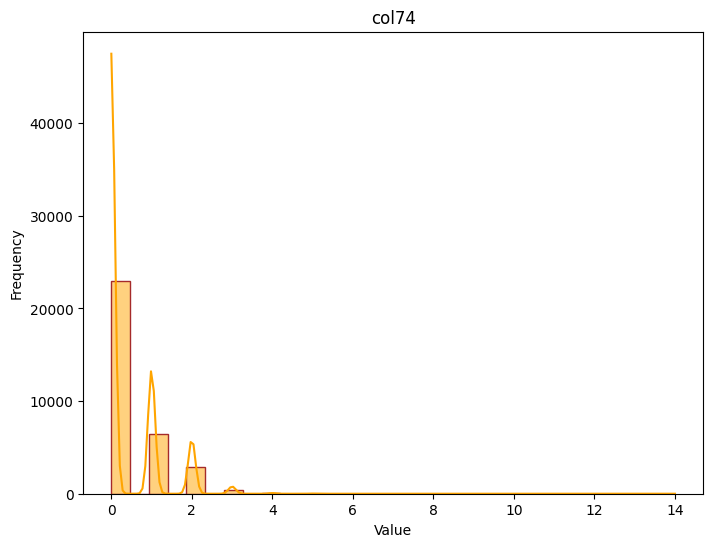

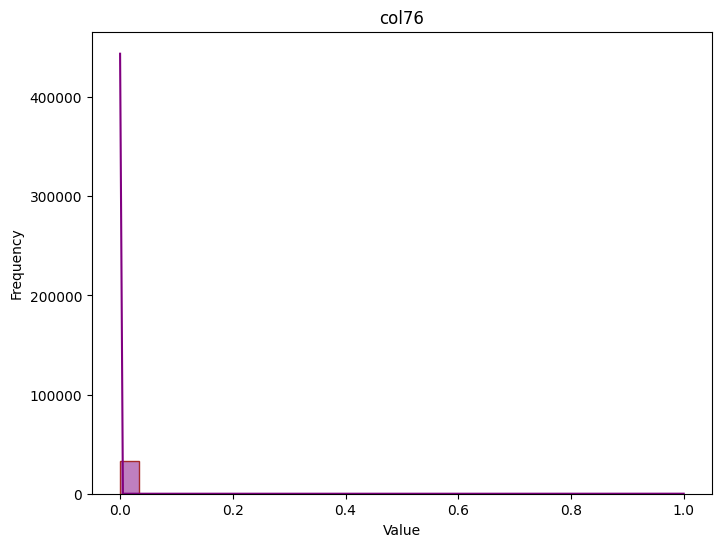

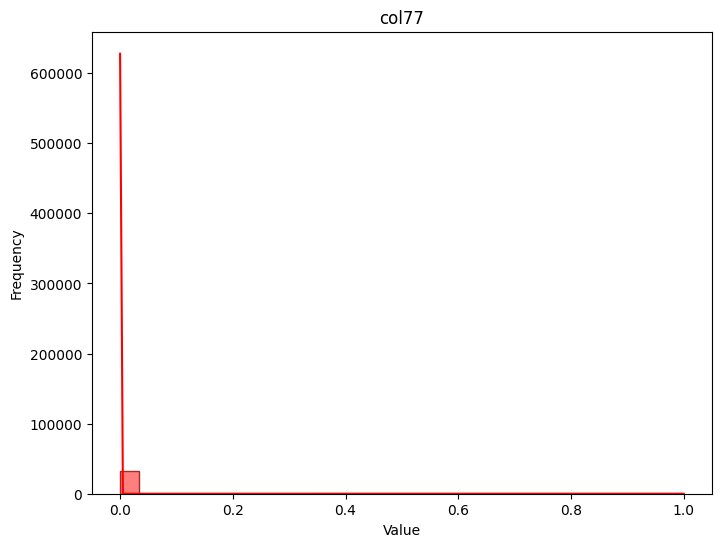

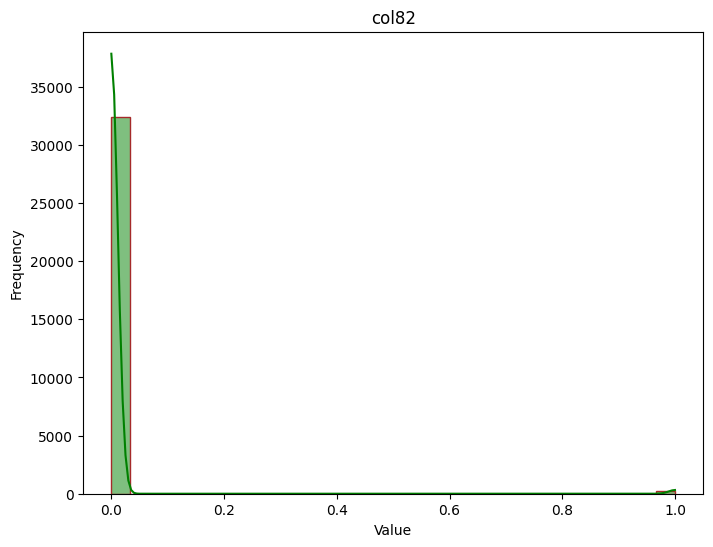

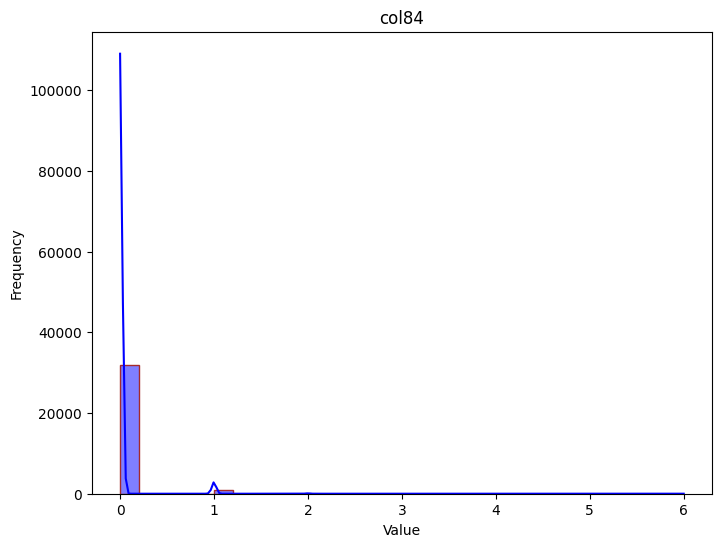

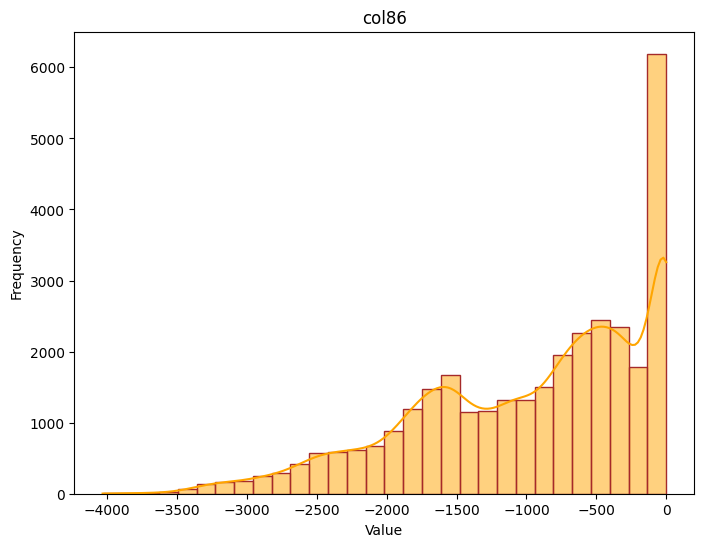

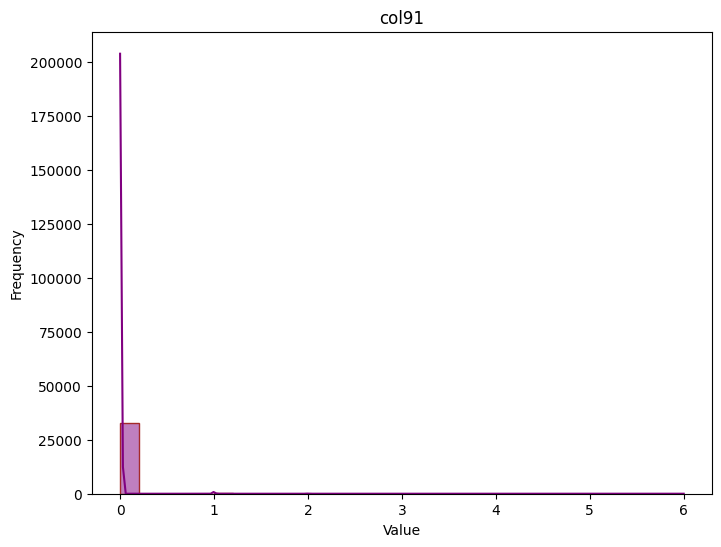

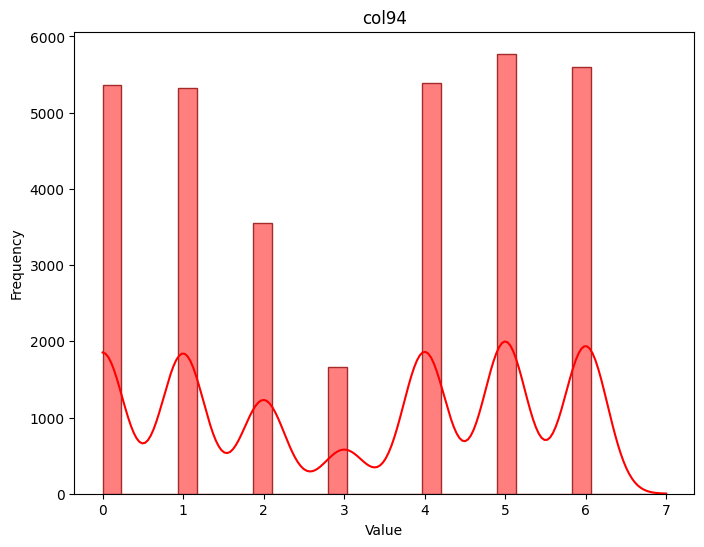

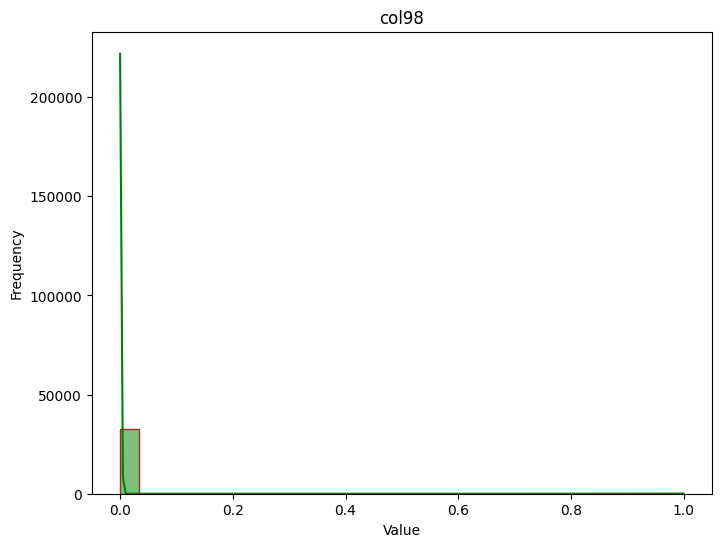

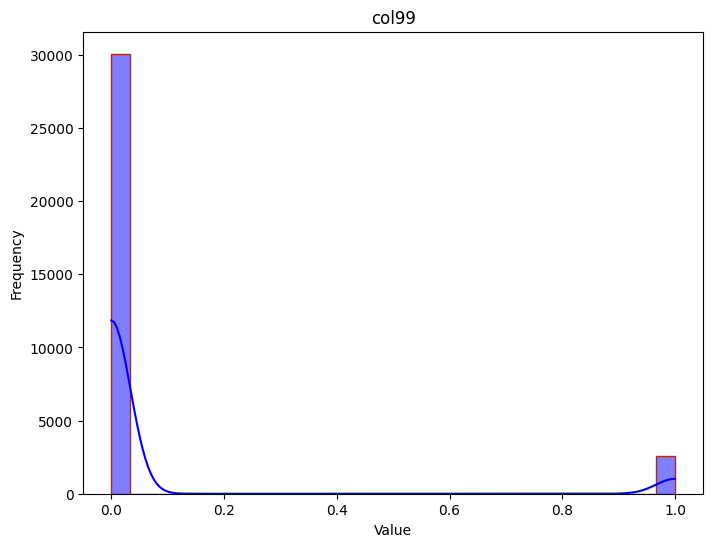

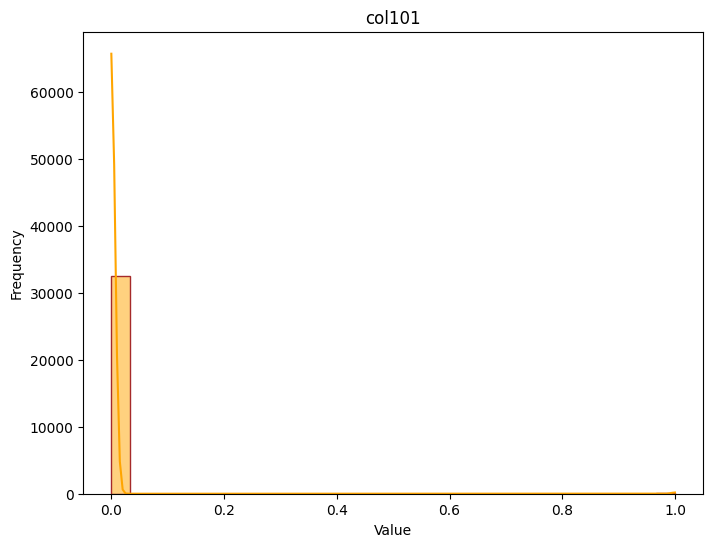

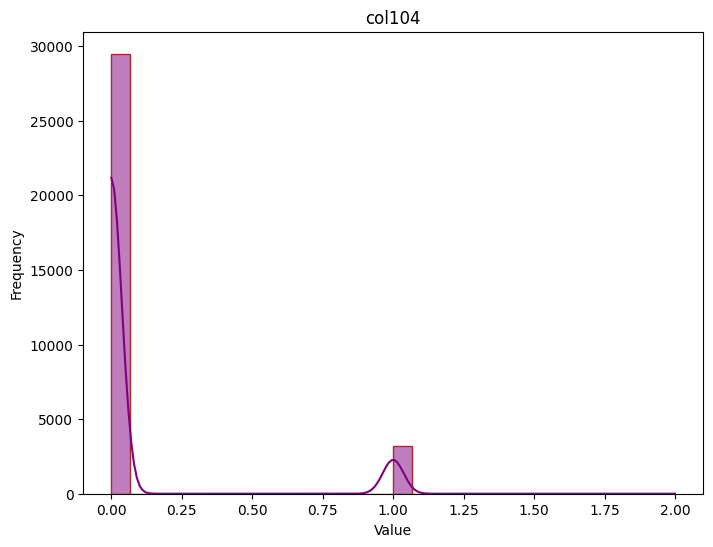

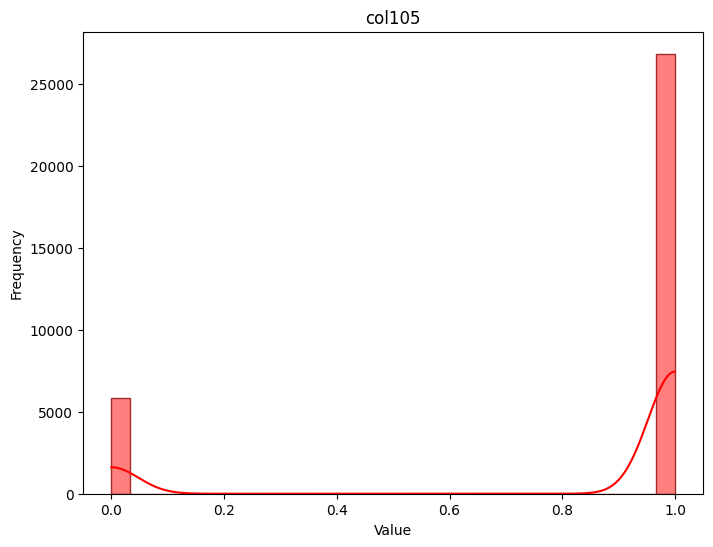

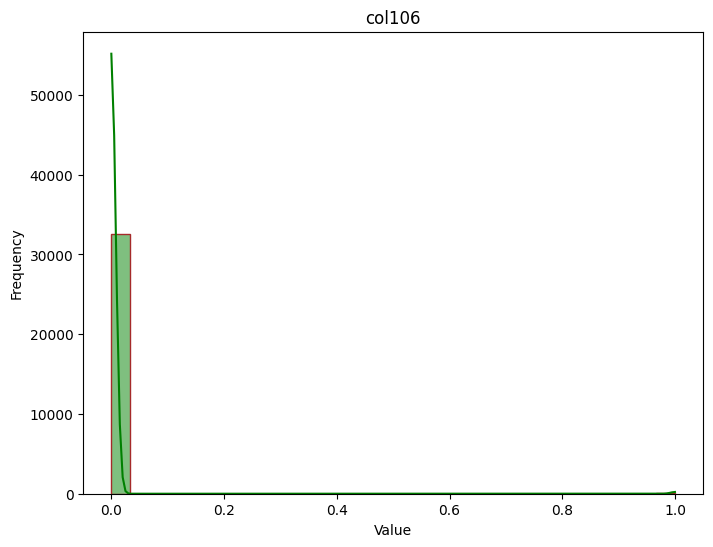

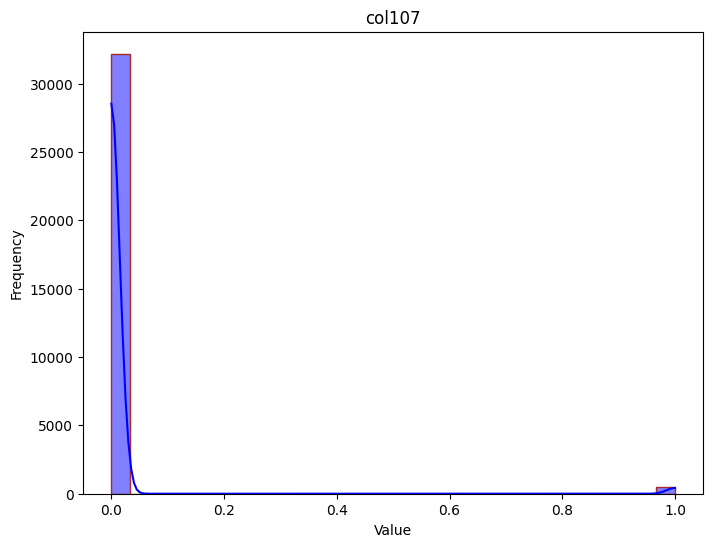

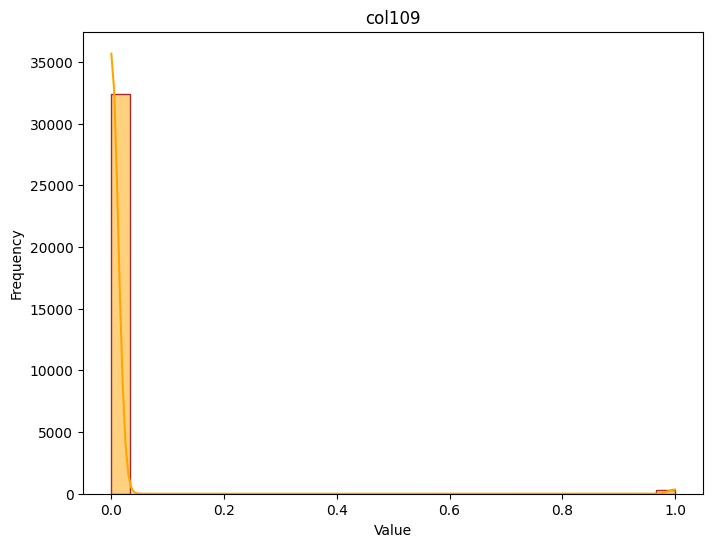

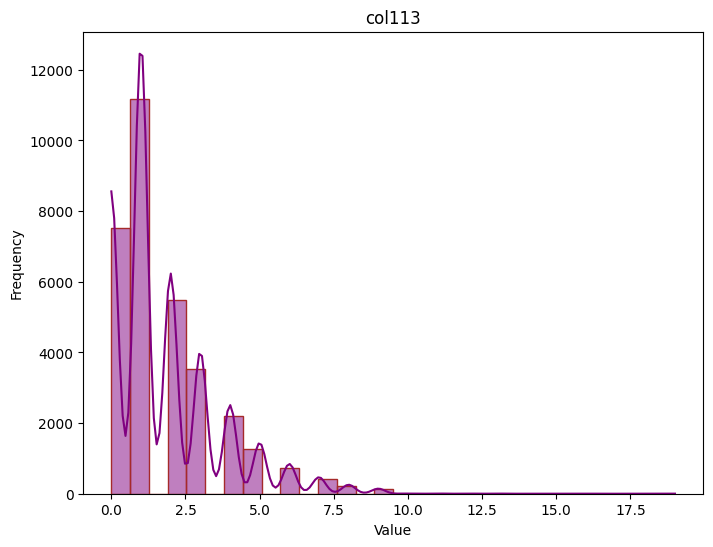

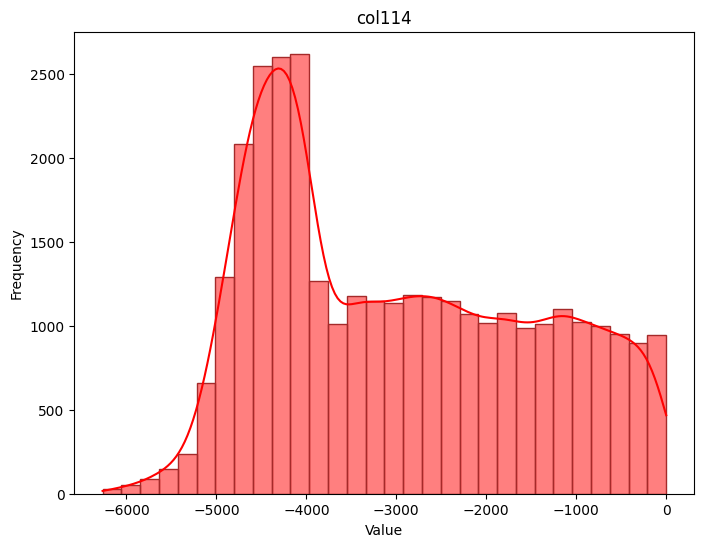

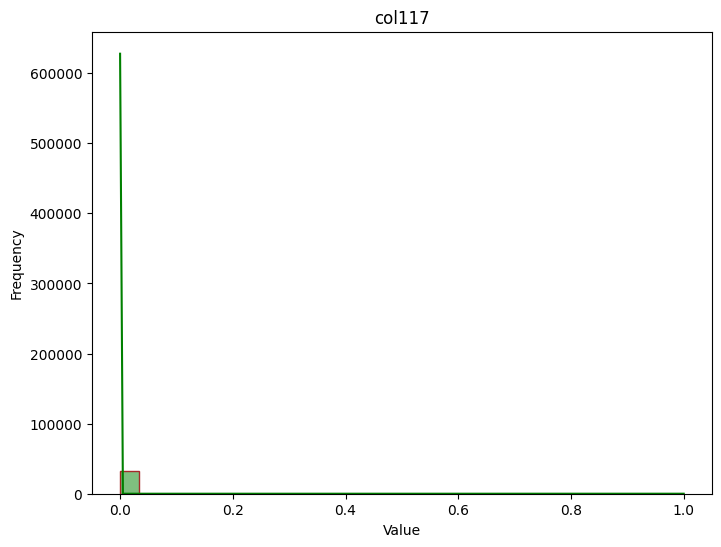

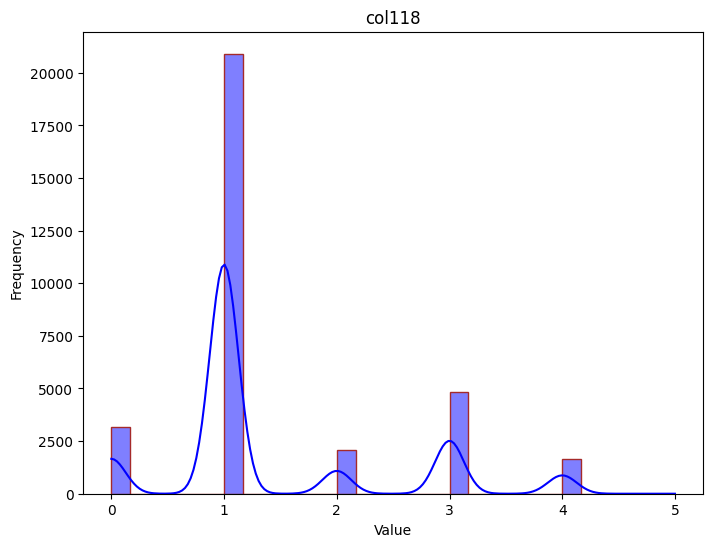

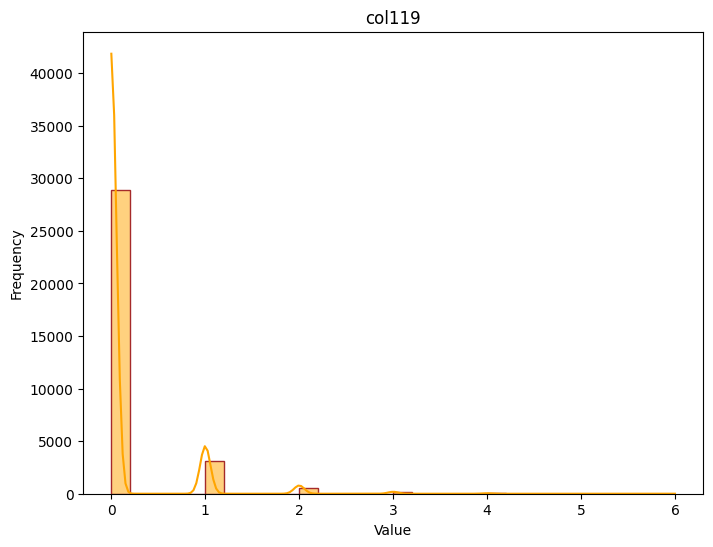

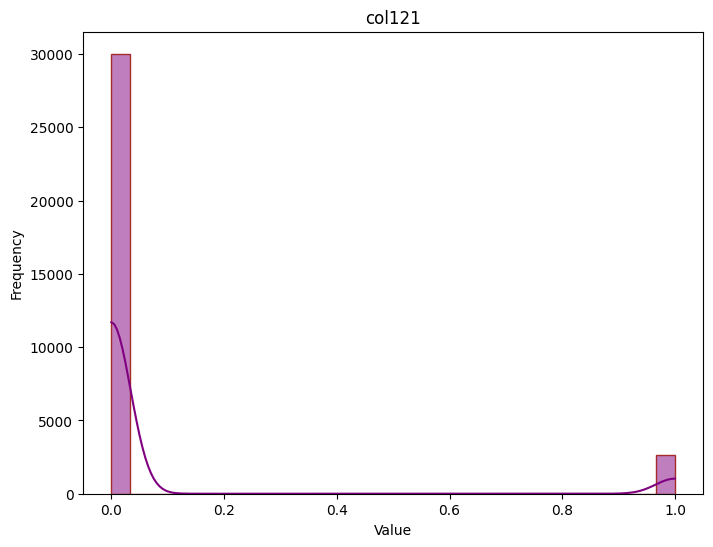

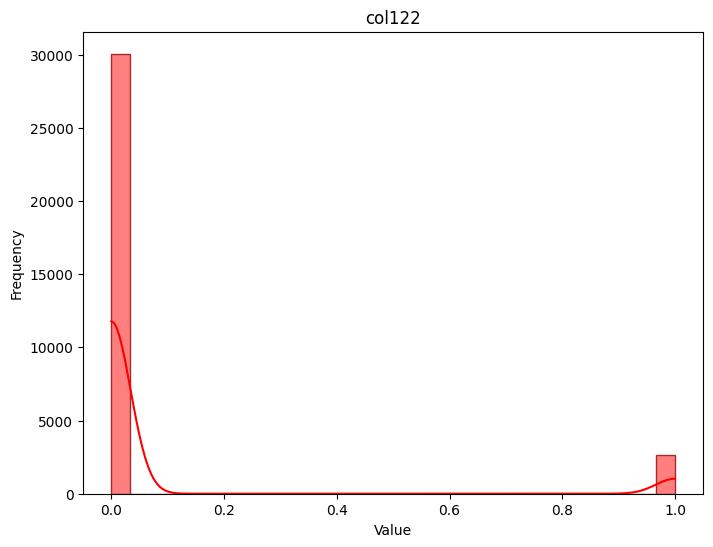

In [ ]:
import seaborn as sns

# Farklı şekillerde histogram
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(train[col], bins=30, kde=True, color='blue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Renkli histogram
colors = ['red', 'green', 'blue', 'orange', 'purple']  # Renklerin listesi

for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(train[col], bins=30, kde=True, color=colors[i % len(colors)], edgecolor='brown')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()


<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


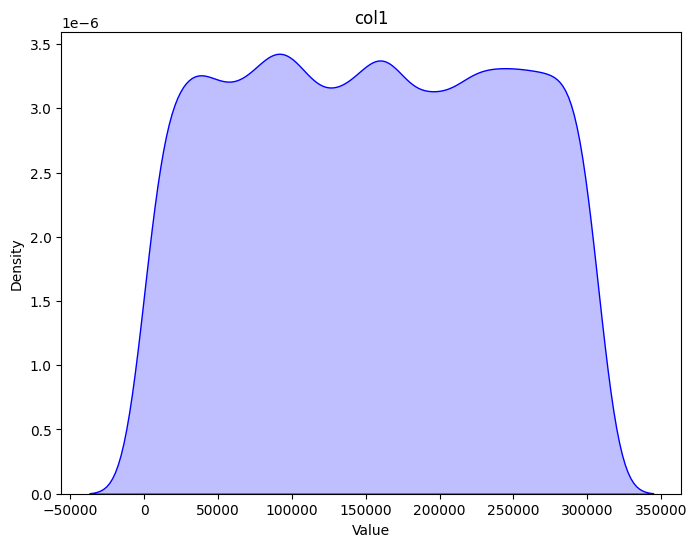

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


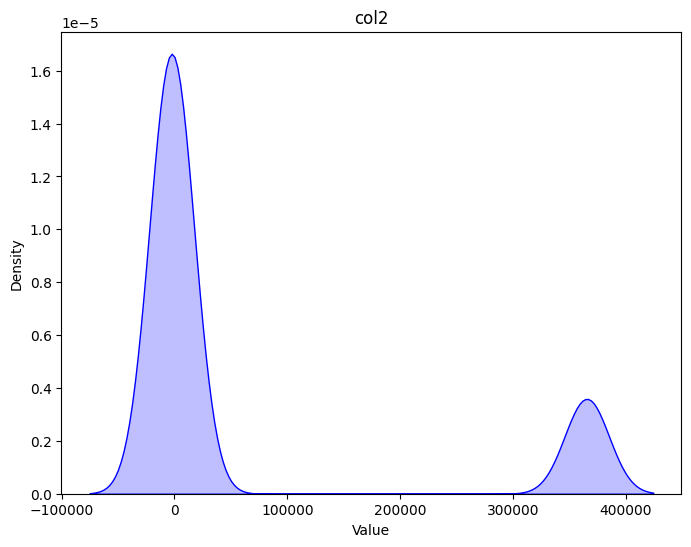

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


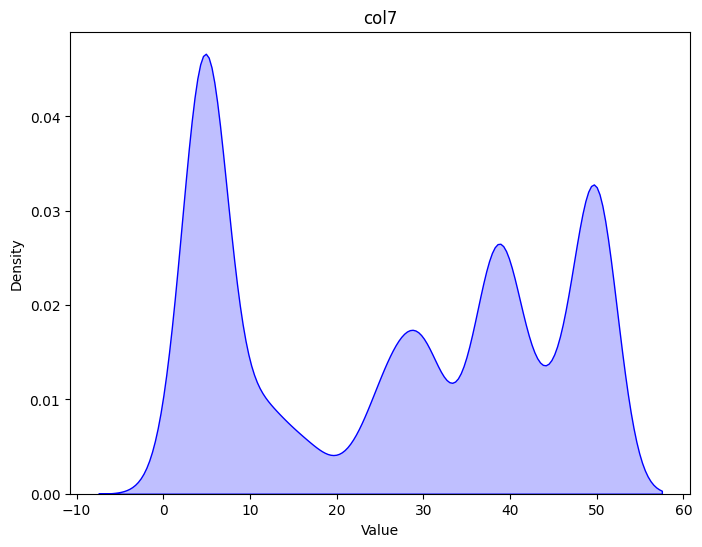

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


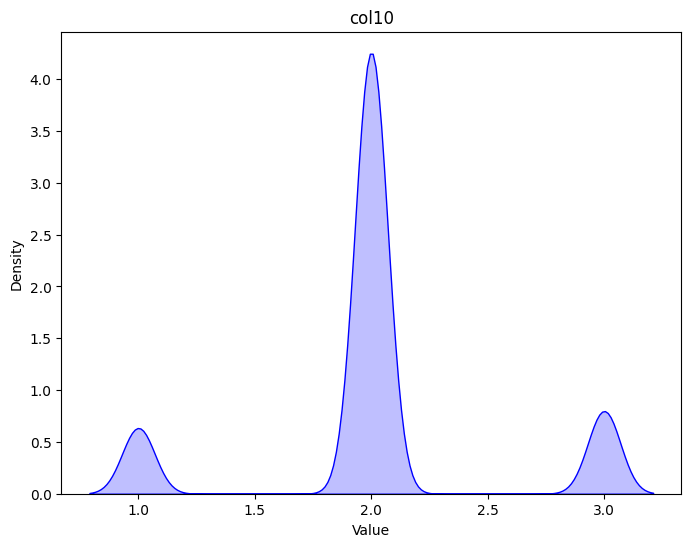

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


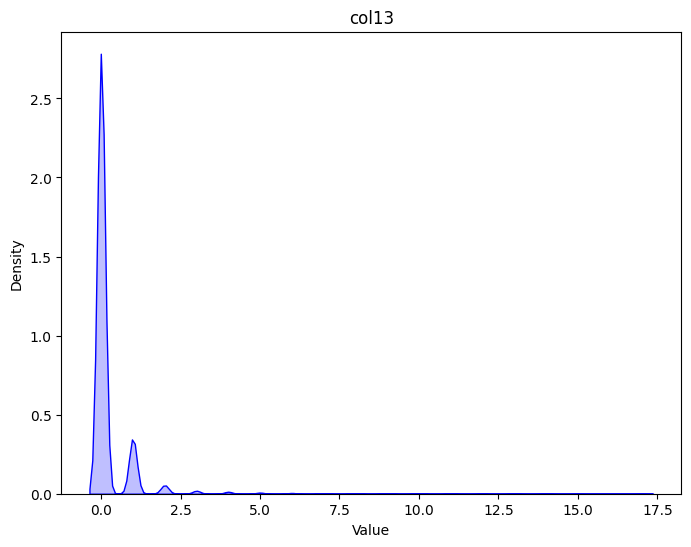

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


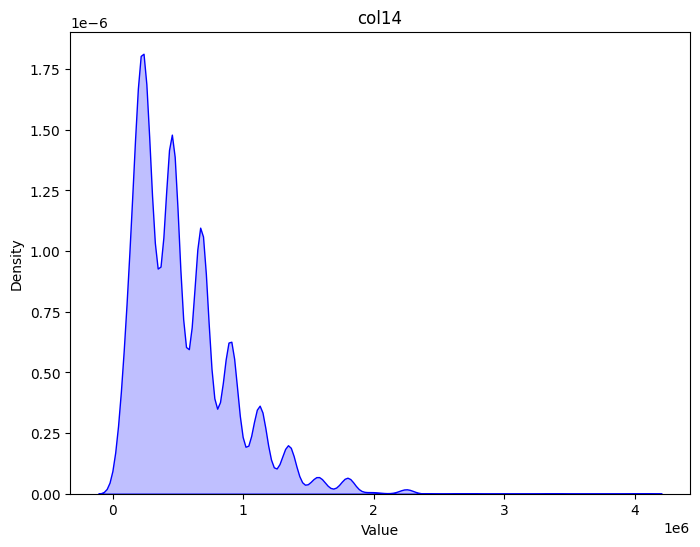

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


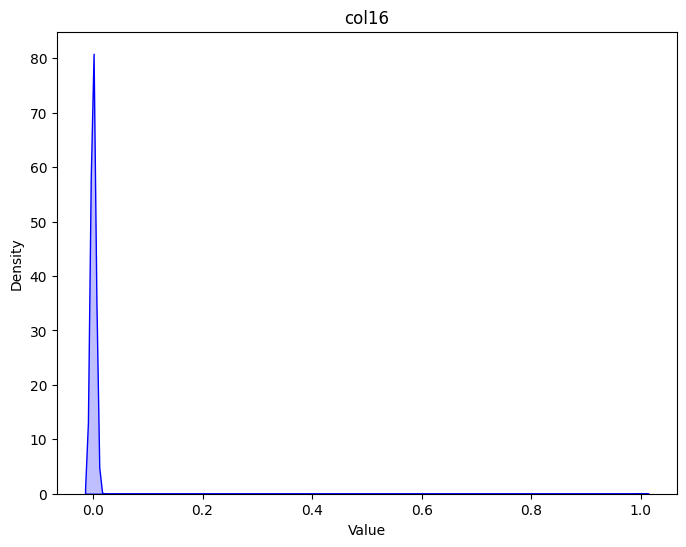

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


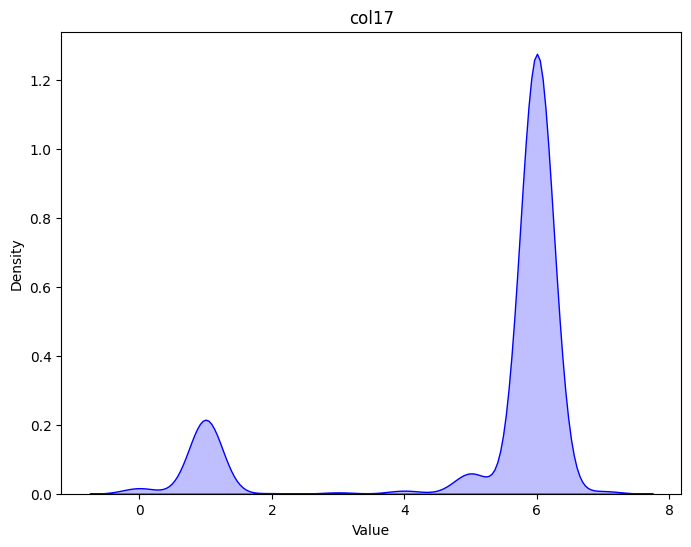

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


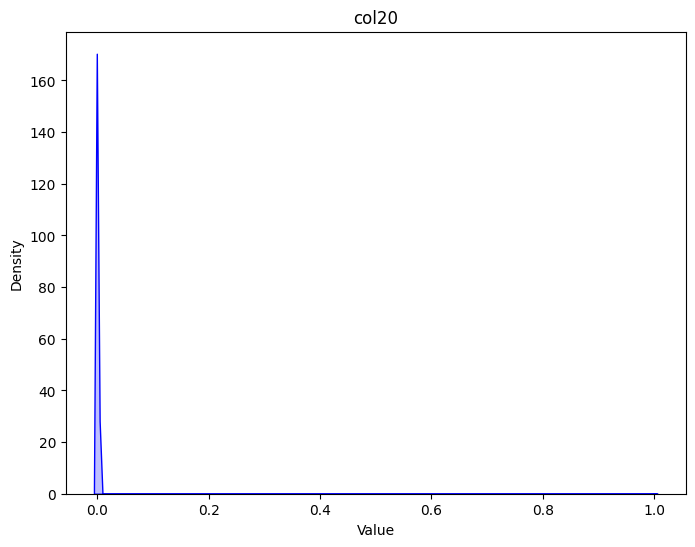

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


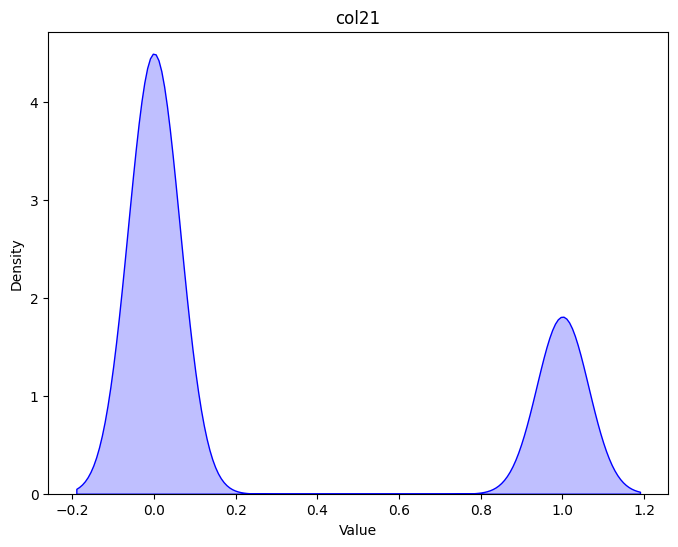

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


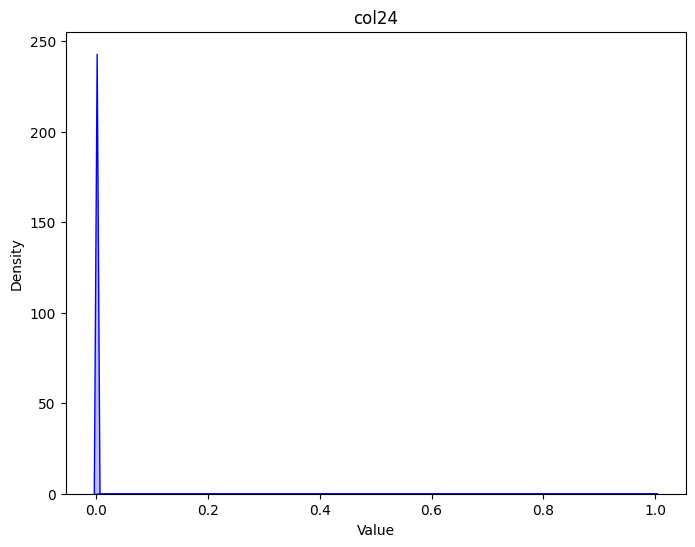

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


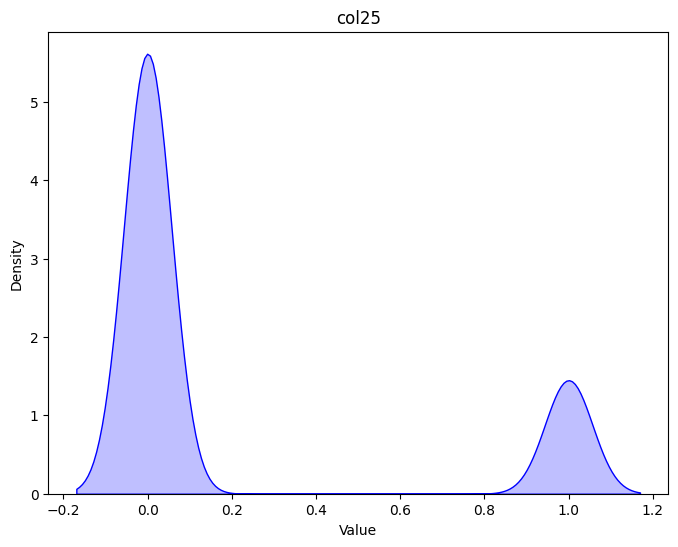

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


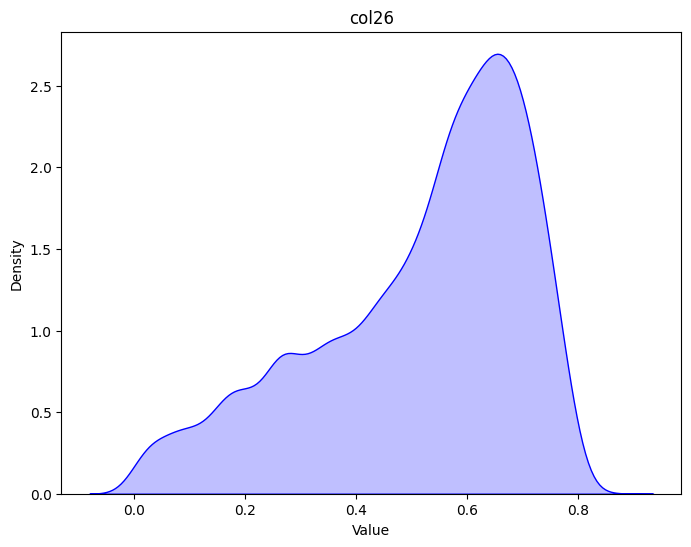

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


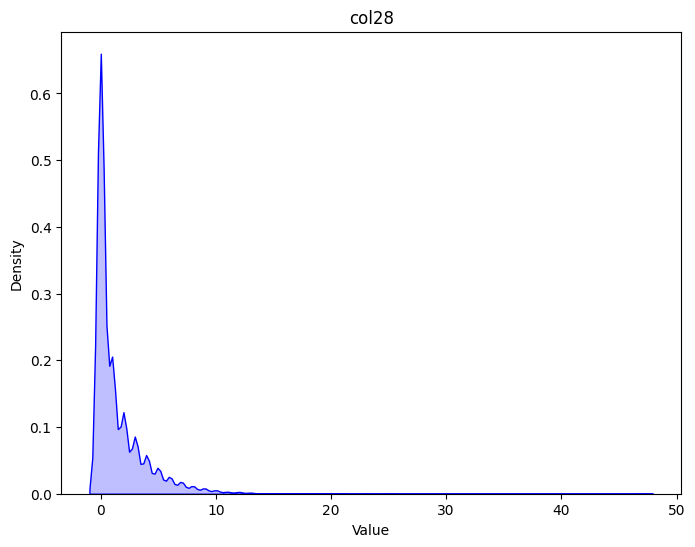

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


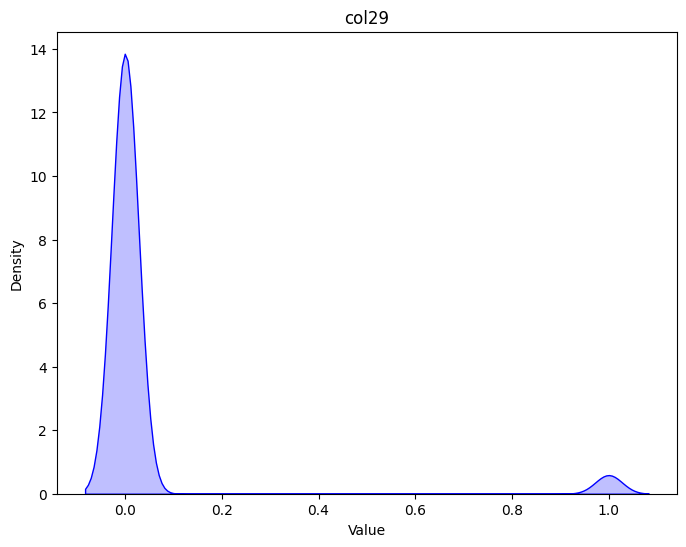

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


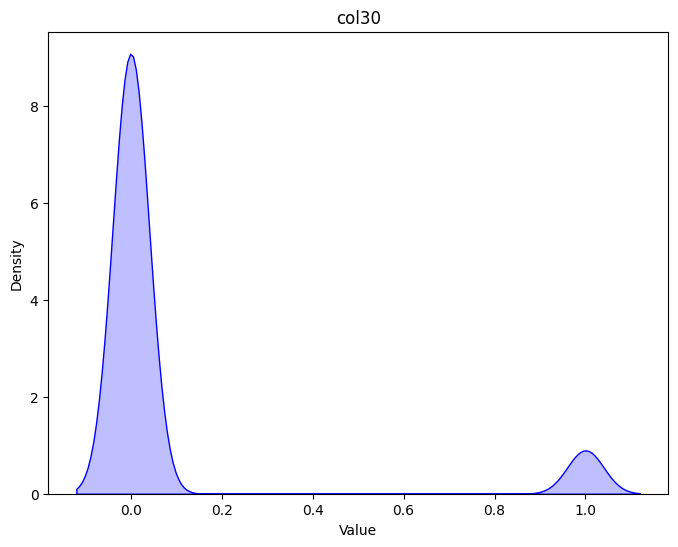

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


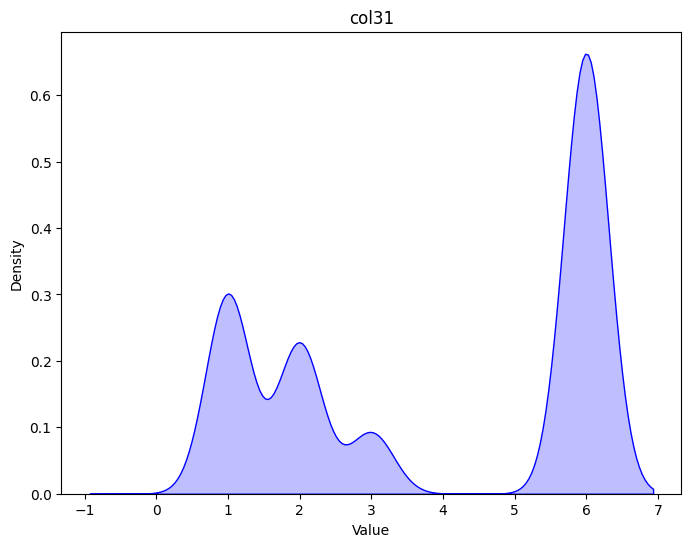

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


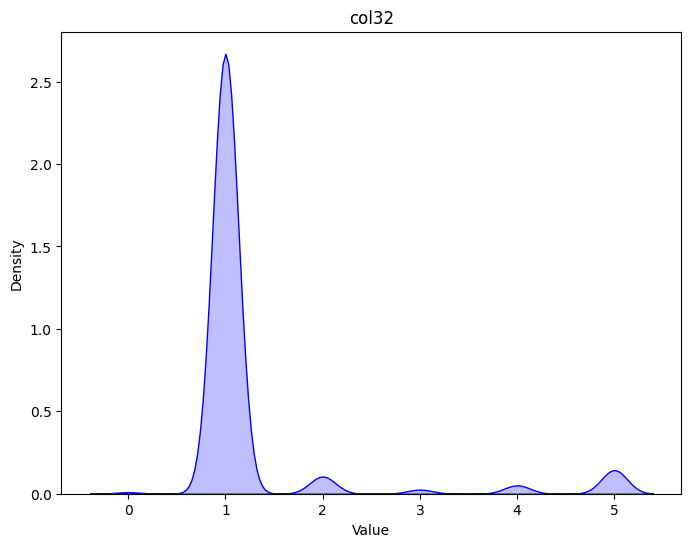

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)
<ipython-input-56-759ead2524ce>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train[col], color='blue', shade=True)


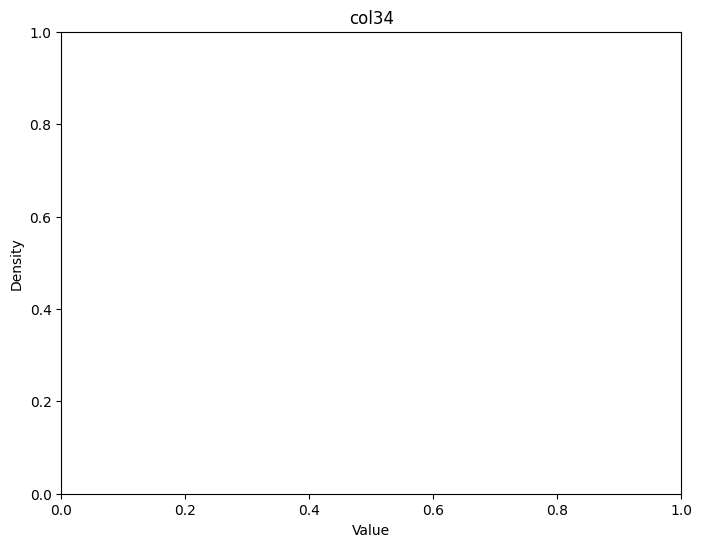

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


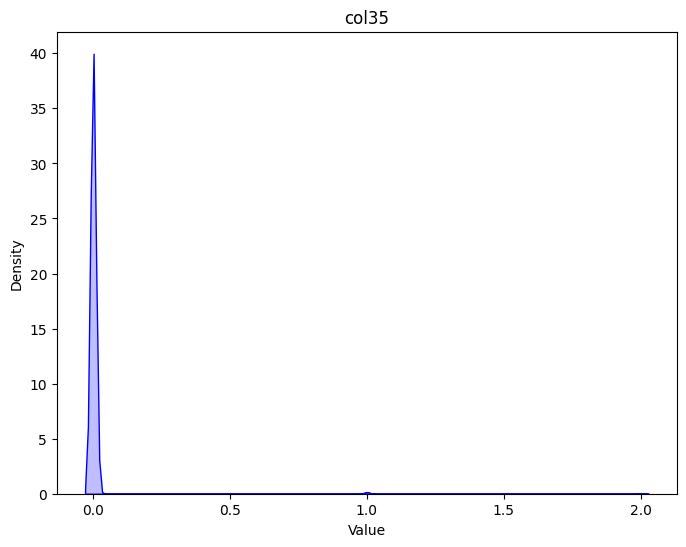

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


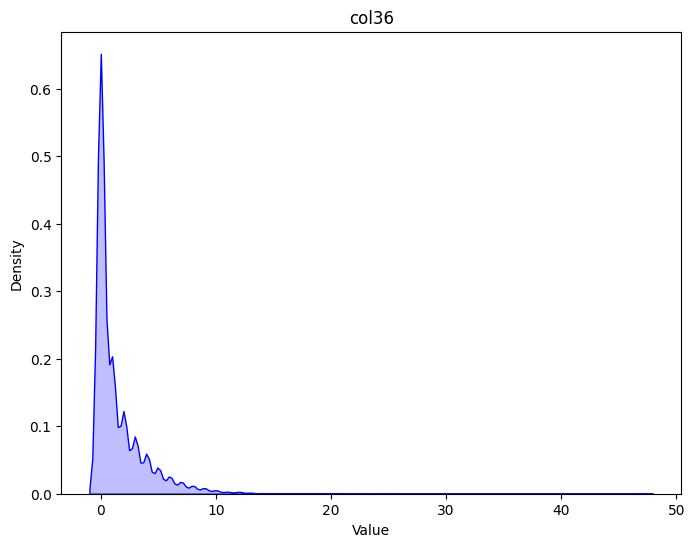

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


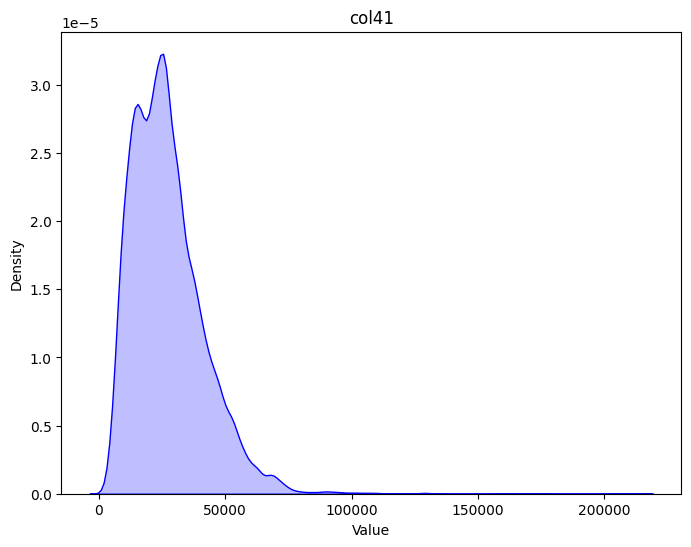

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


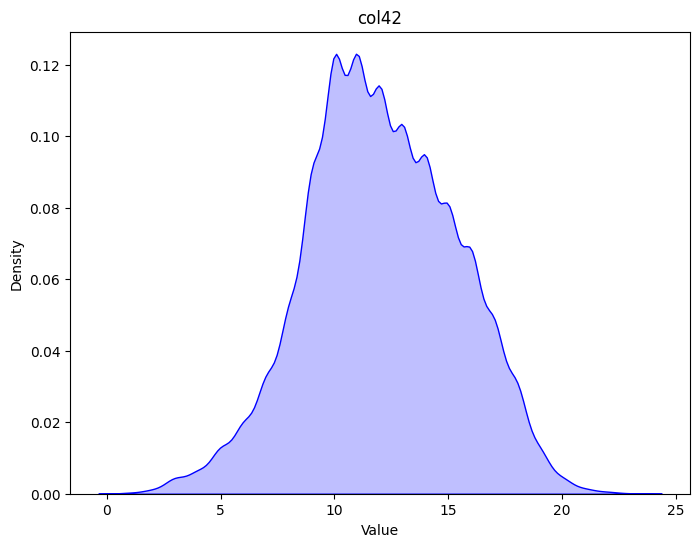

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


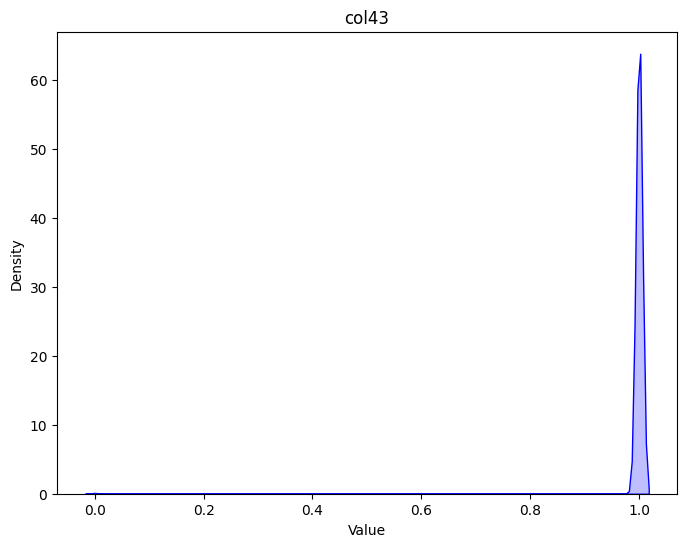

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


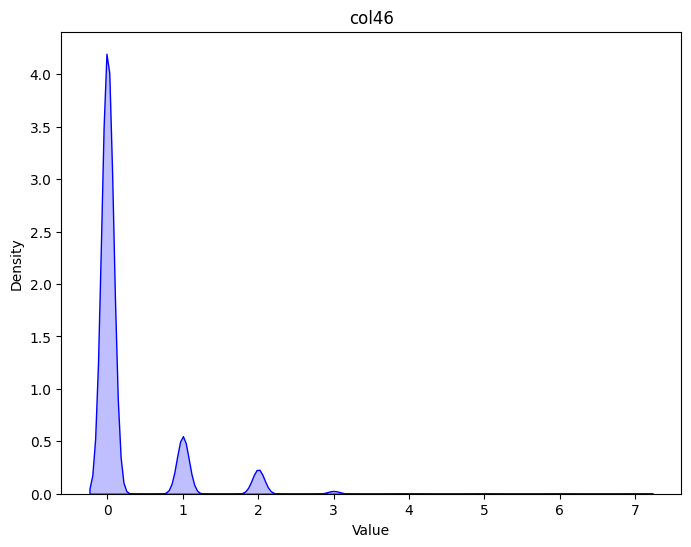

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


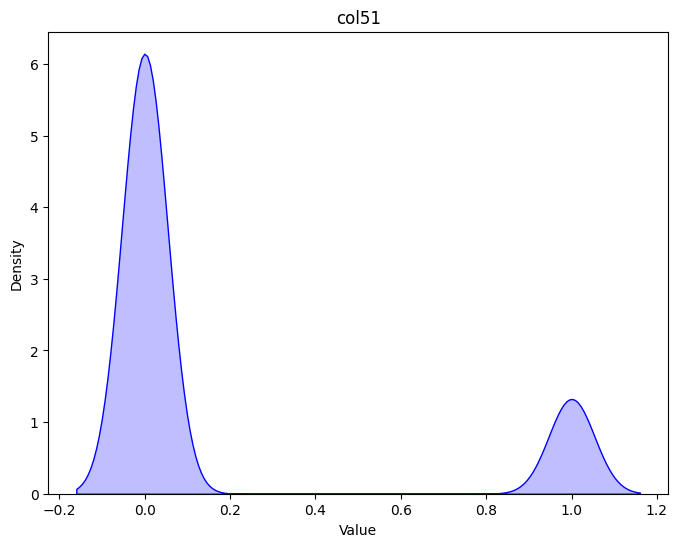

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


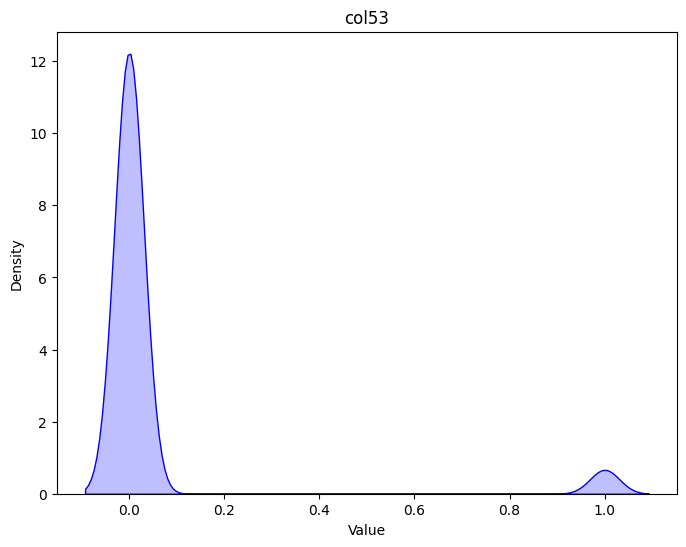

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


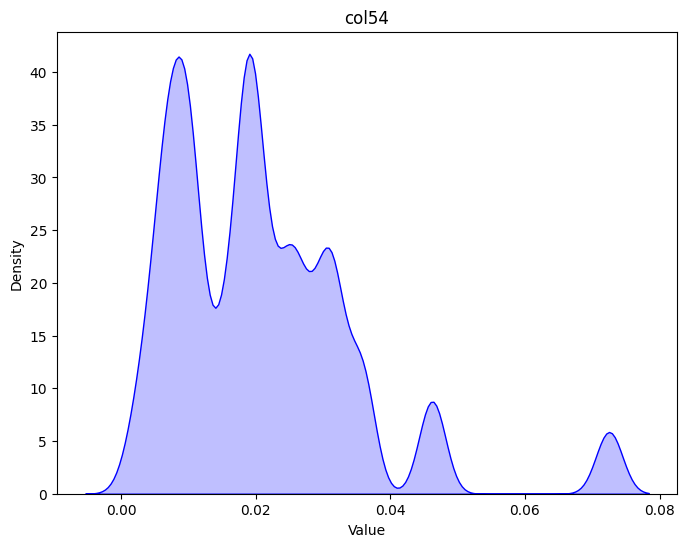

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


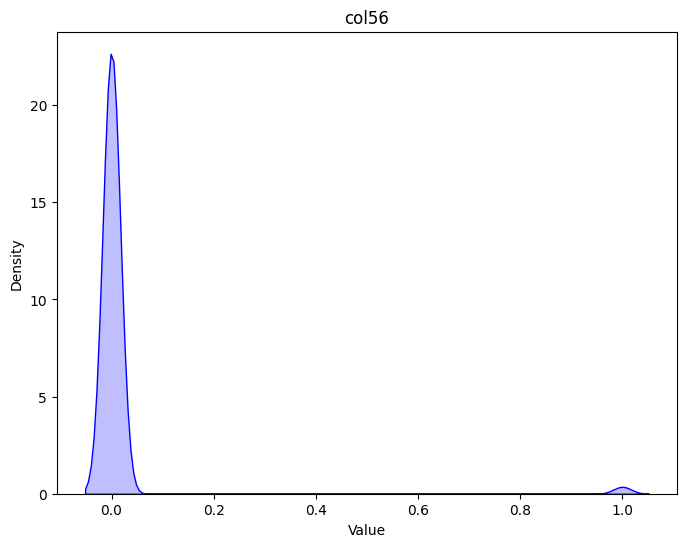

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


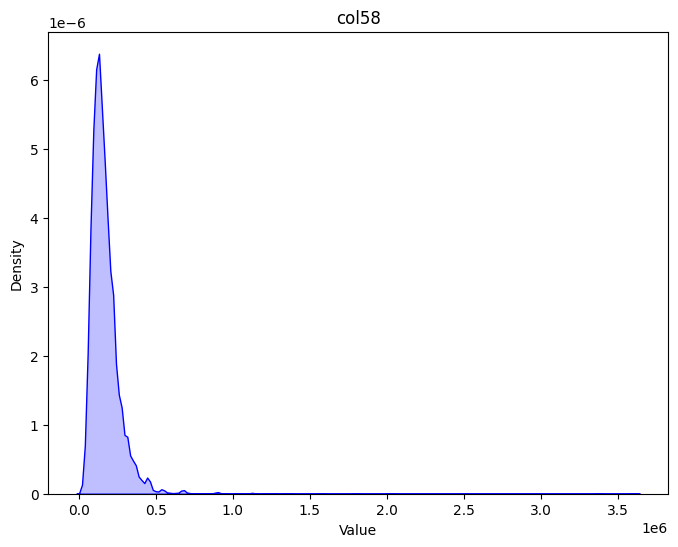

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


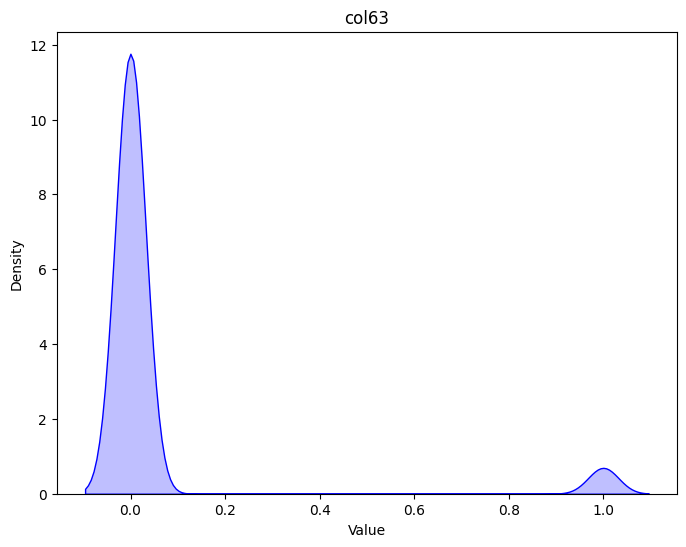

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


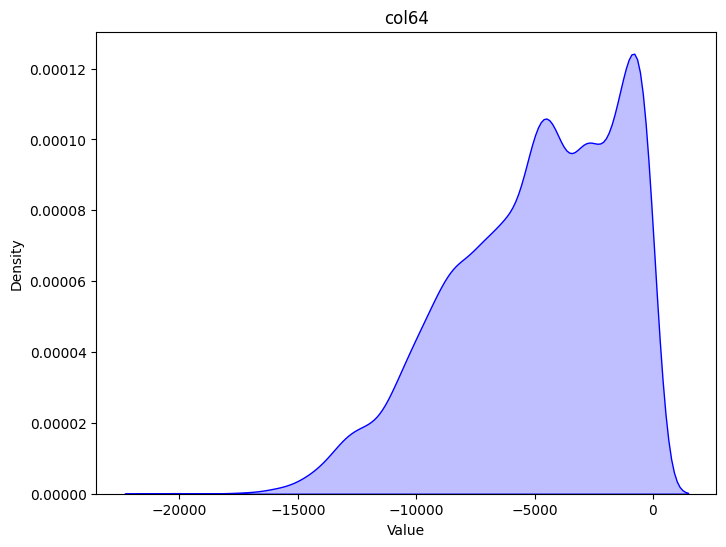

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


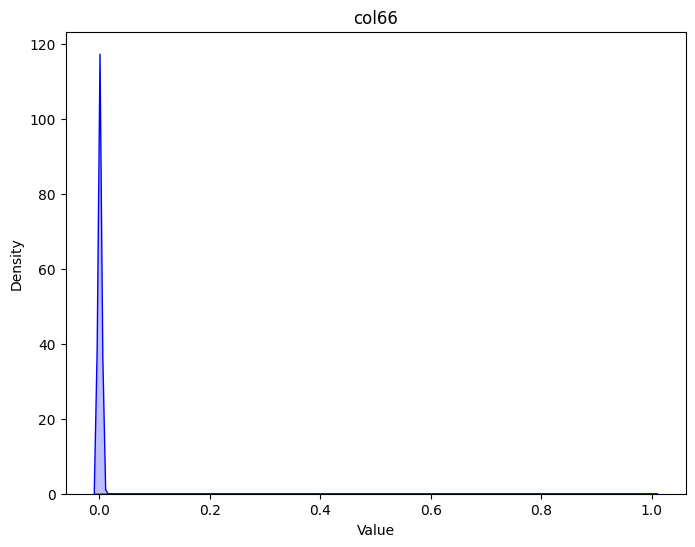

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


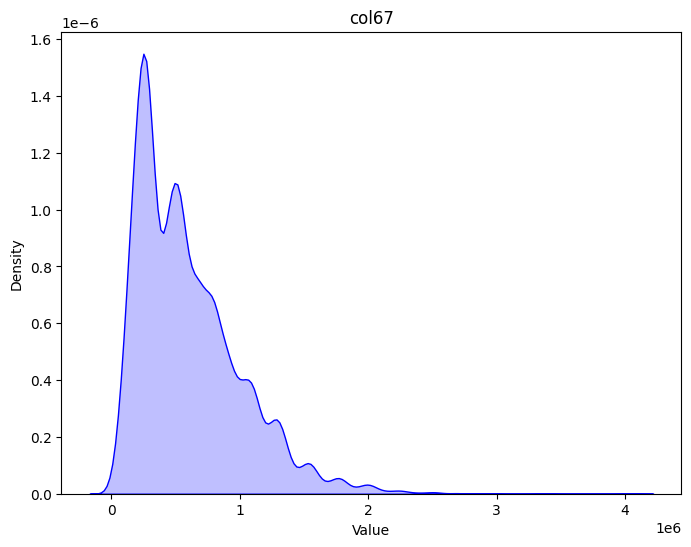

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


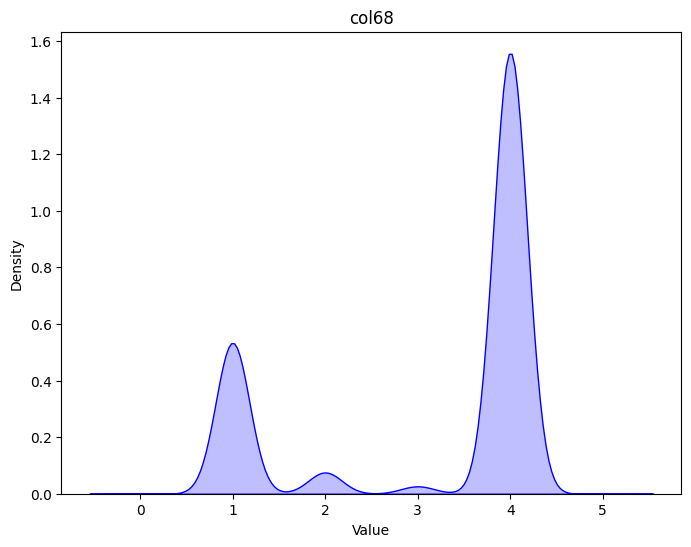

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


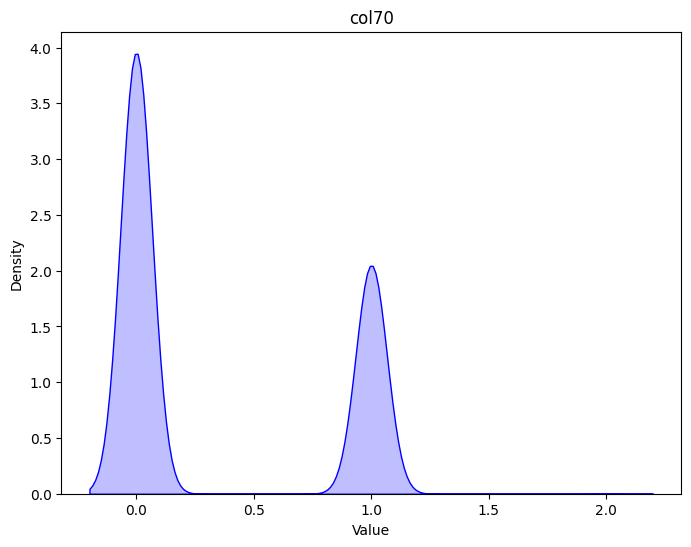

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


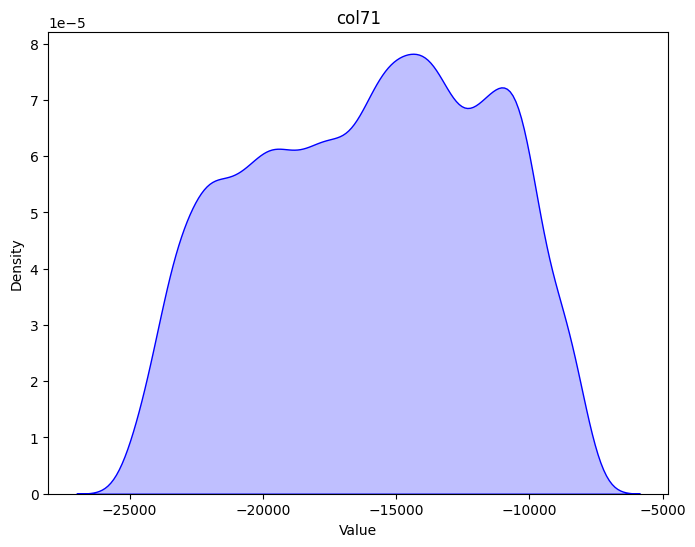

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


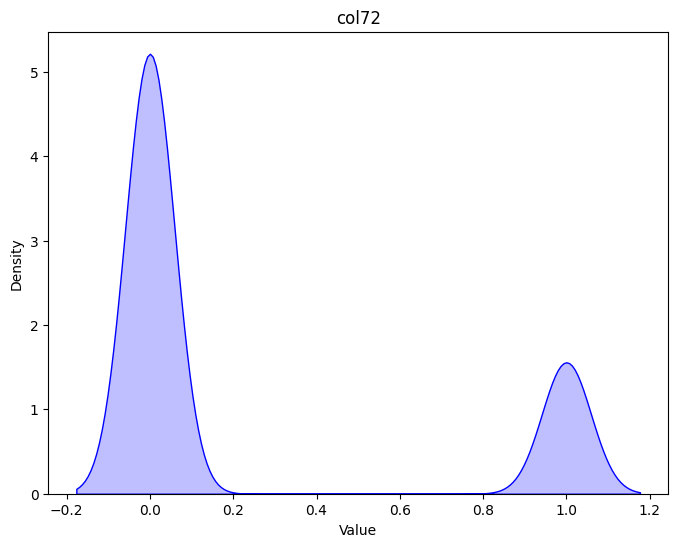

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


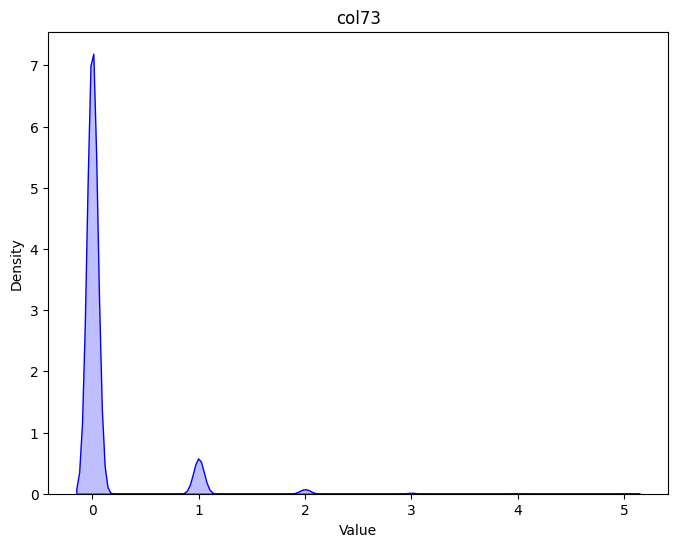

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


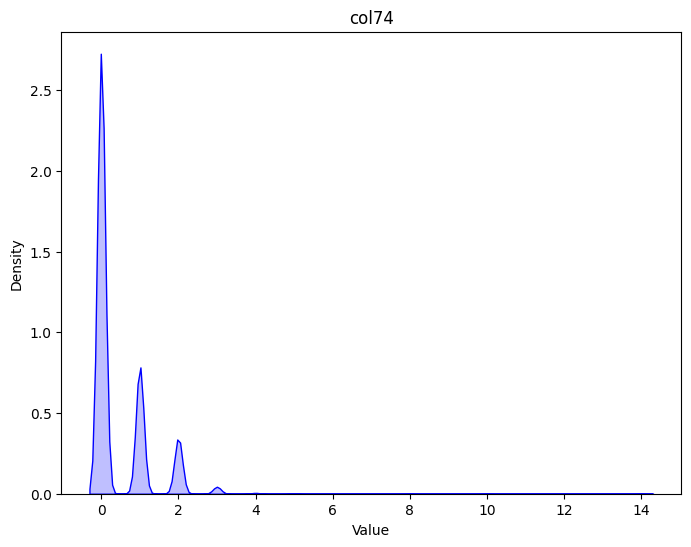

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


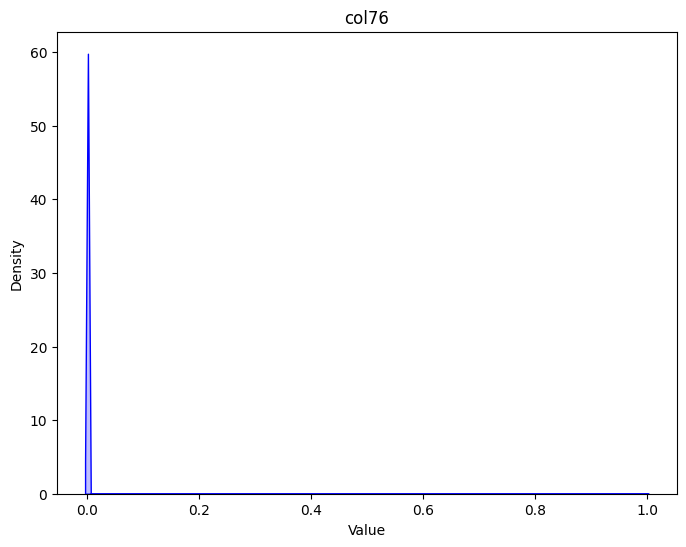

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)
<ipython-input-56-759ead2524ce>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train[col], color='blue', shade=True)


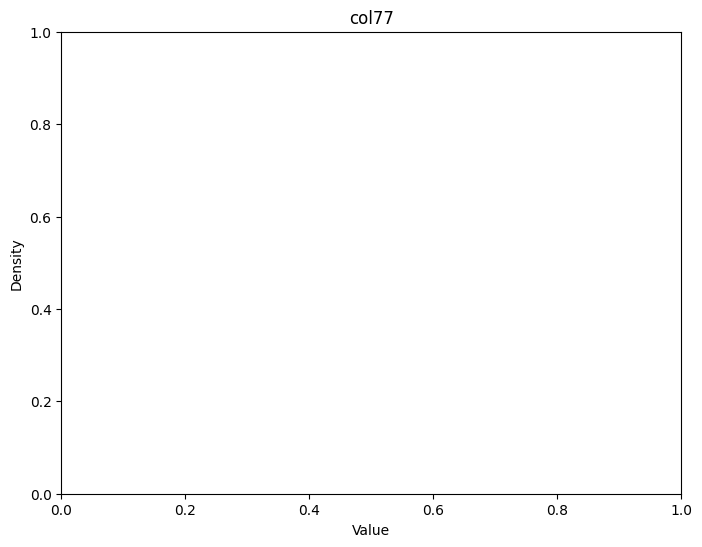

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


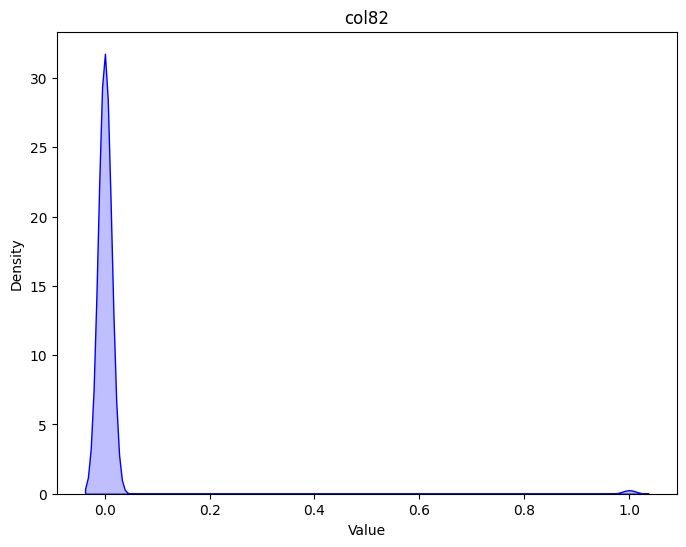

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


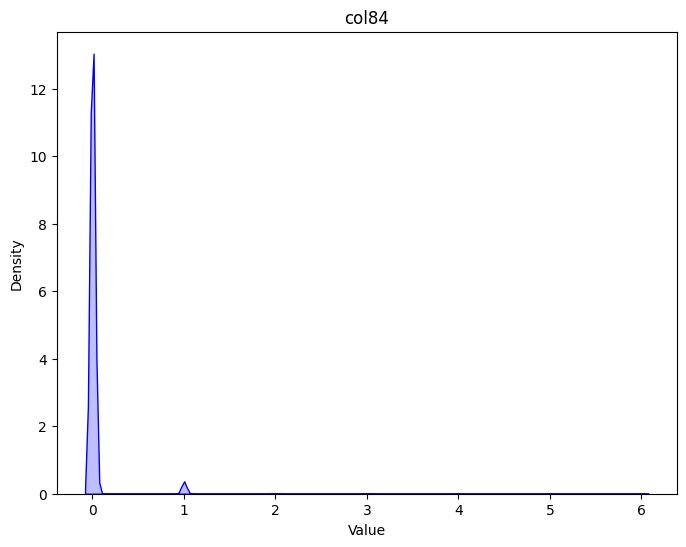

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


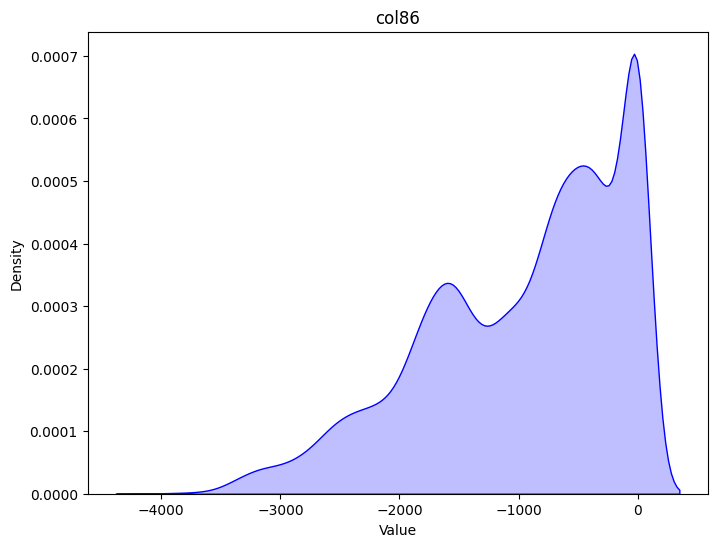

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


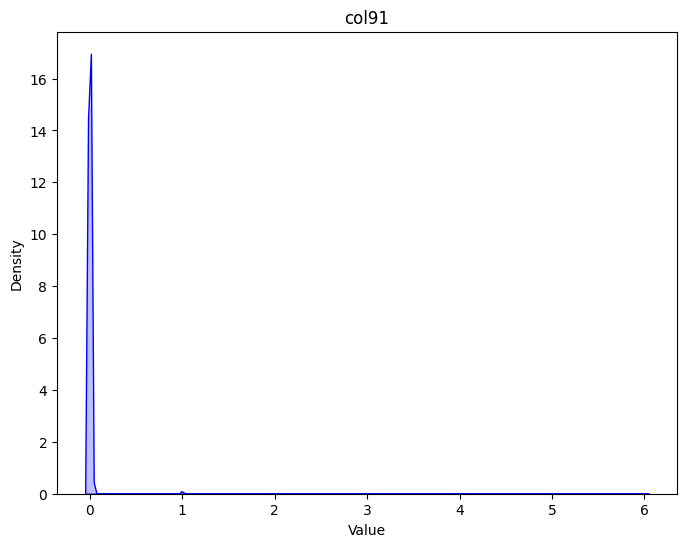

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


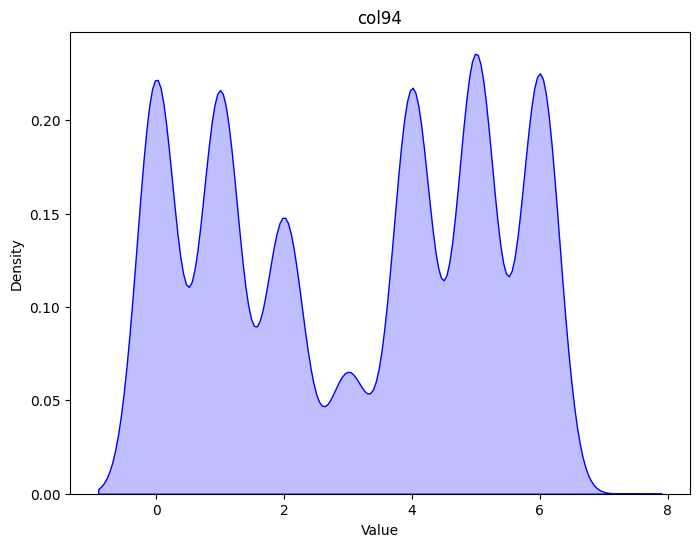

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


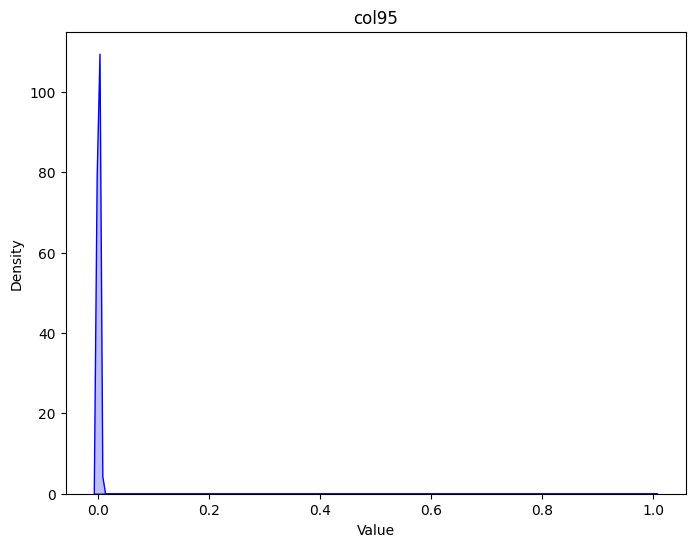

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


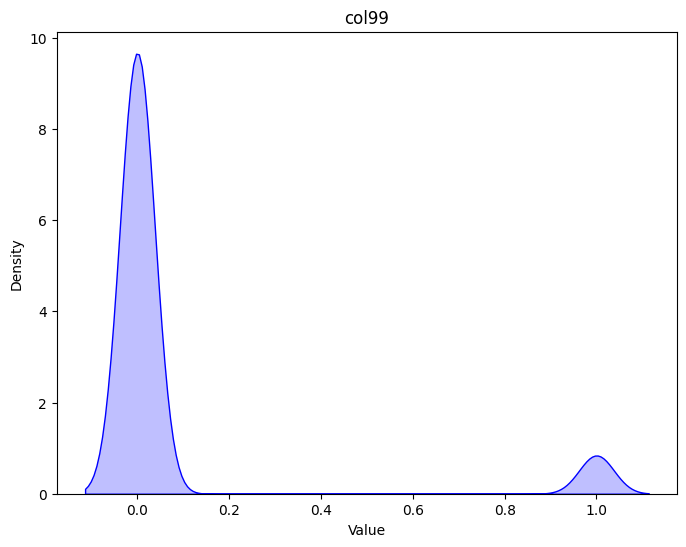

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


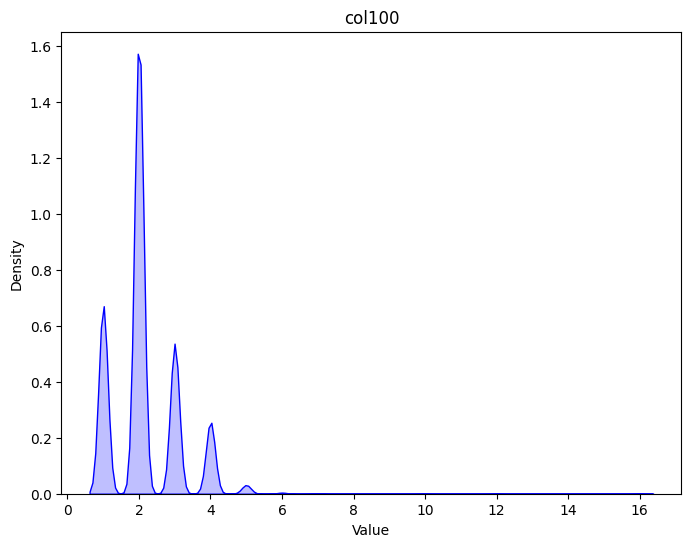

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


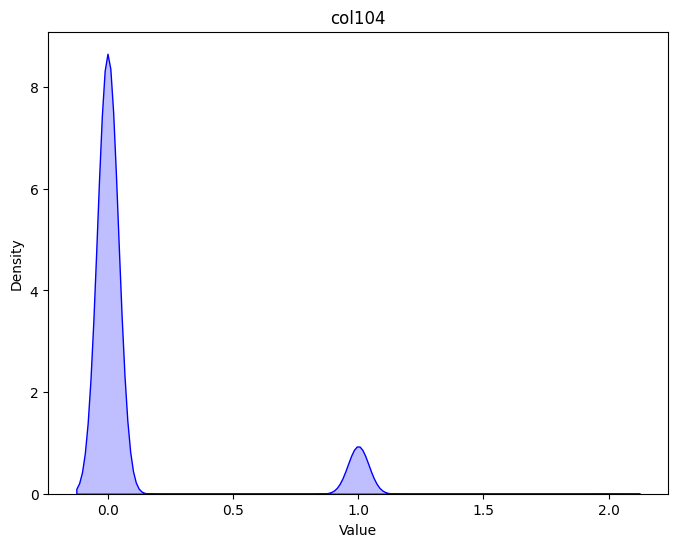

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


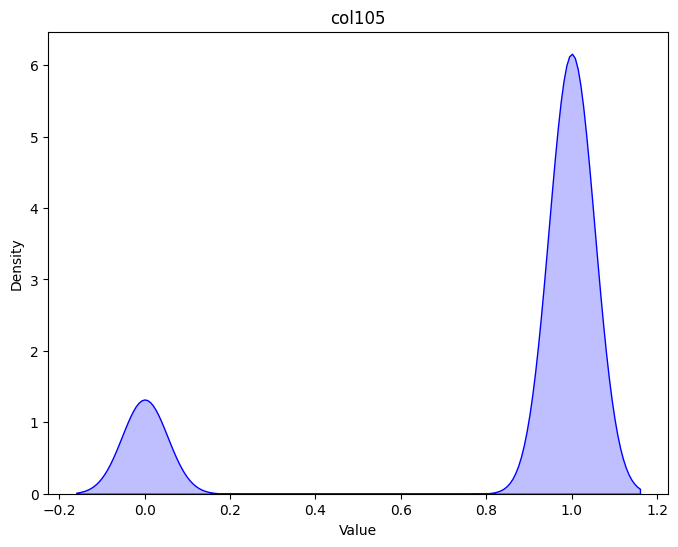

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


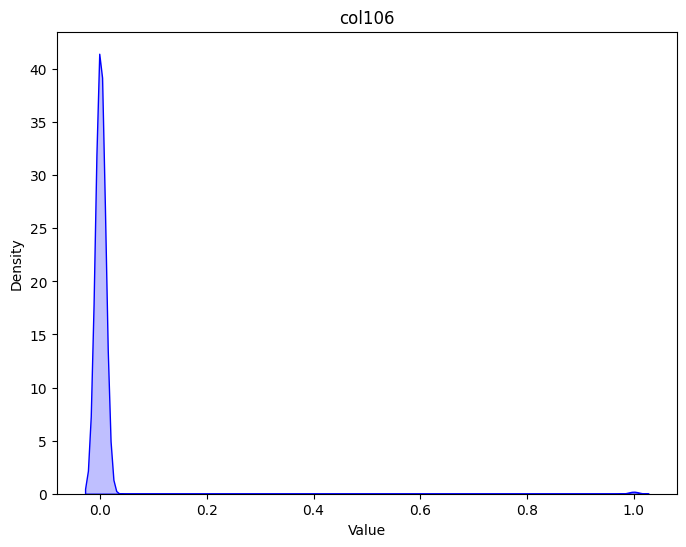

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


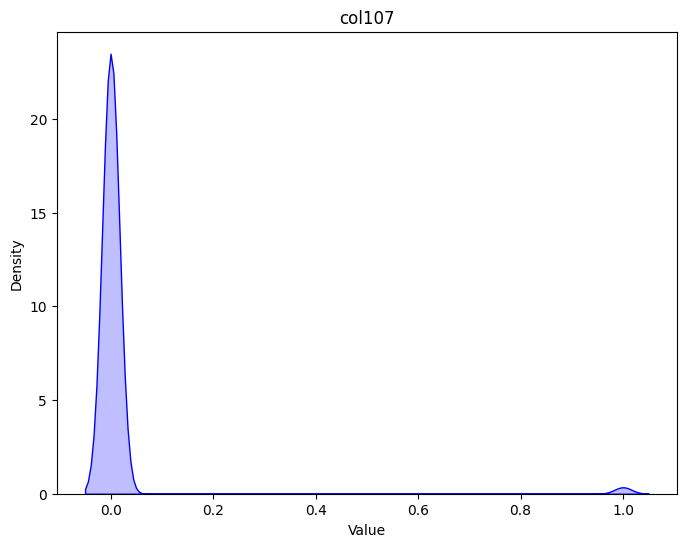

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


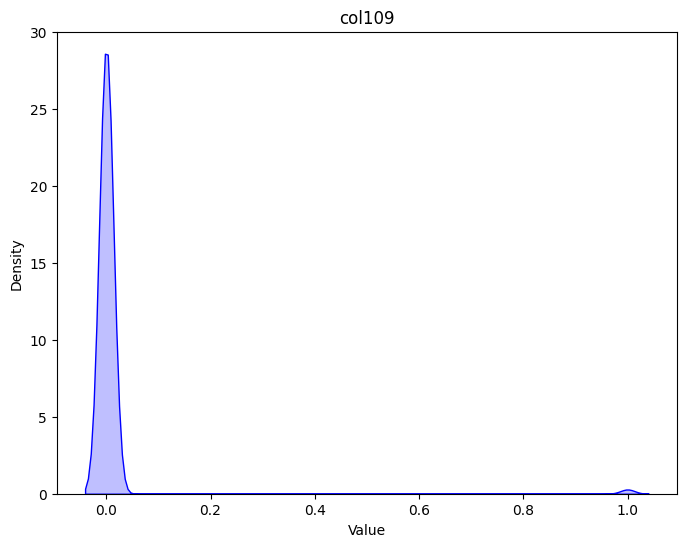

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


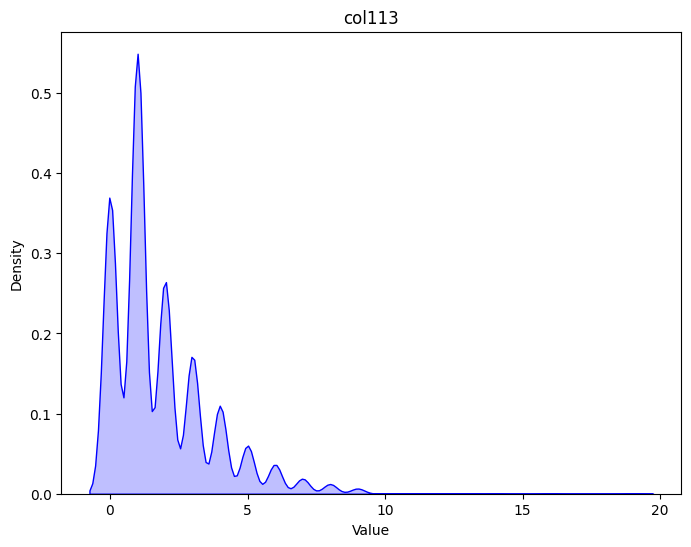

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


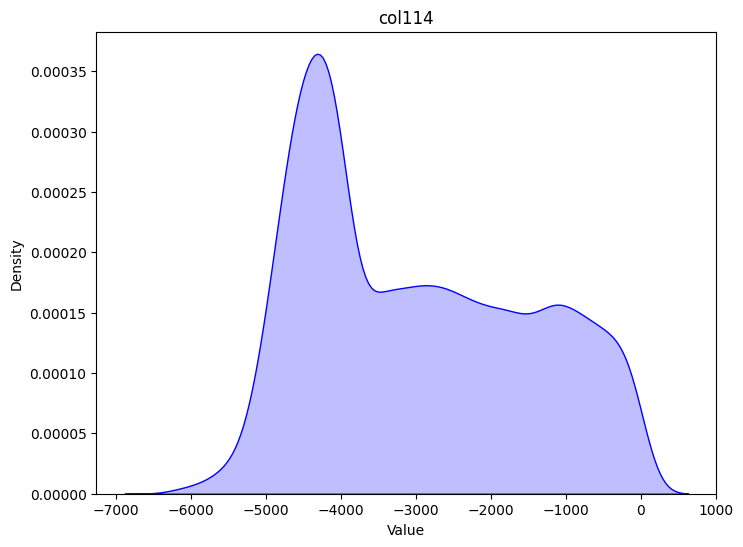

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


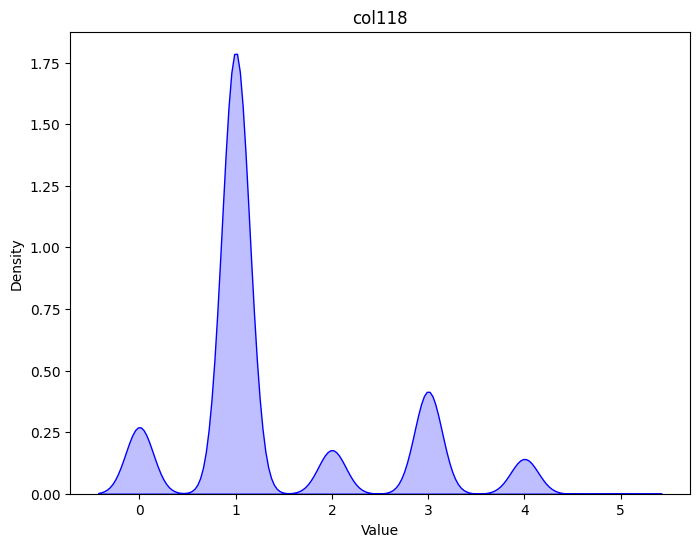

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


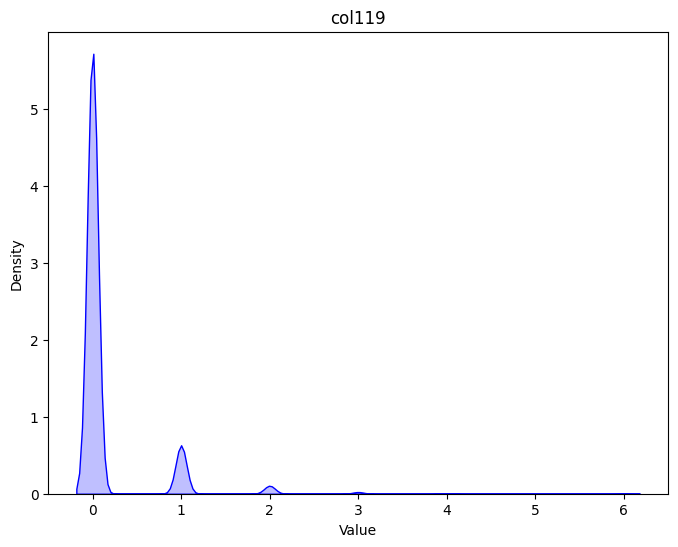

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


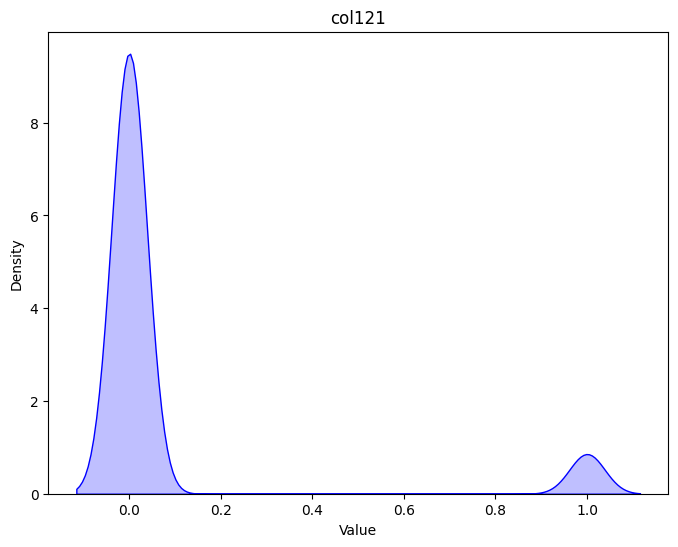

<ipython-input-56-759ead2524ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[col], color='blue', shade=True)


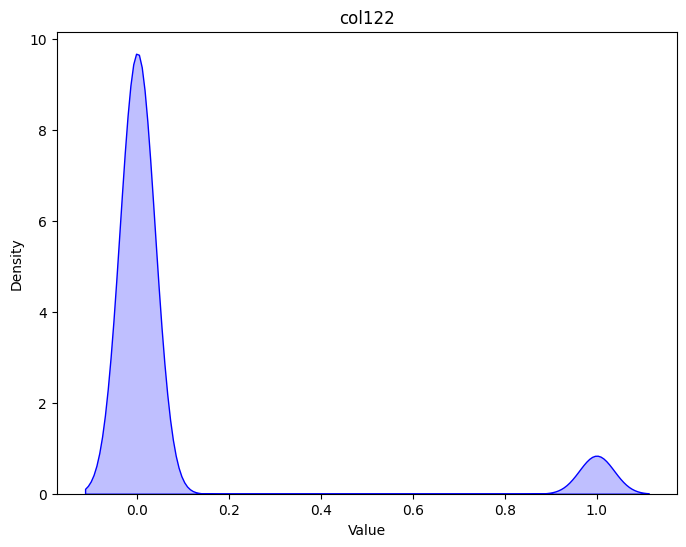

In [ ]:
import seaborn as sns

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(train[col], color='blue', shade=True)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()


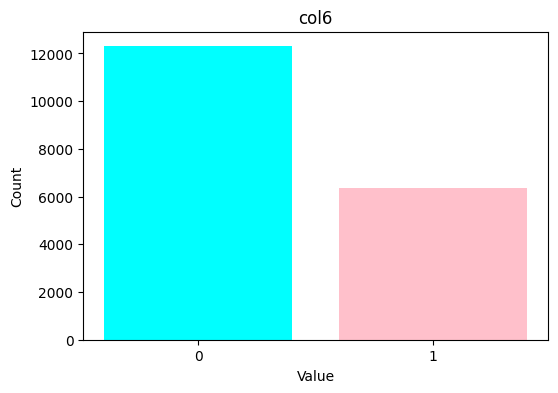

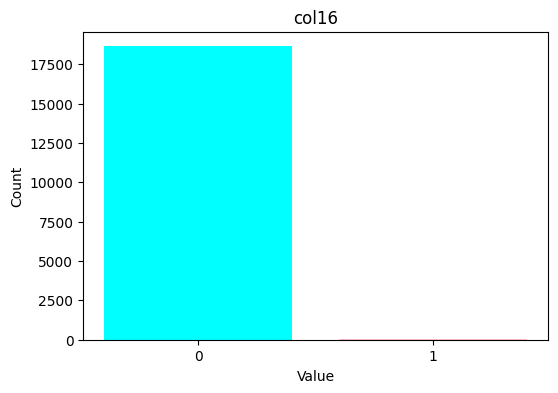

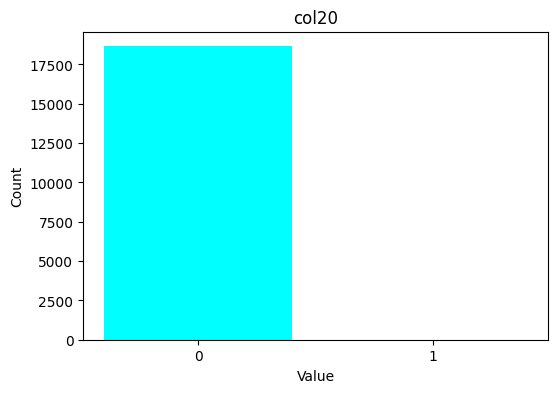

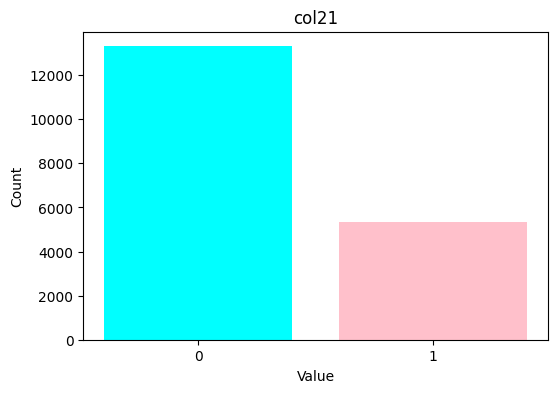

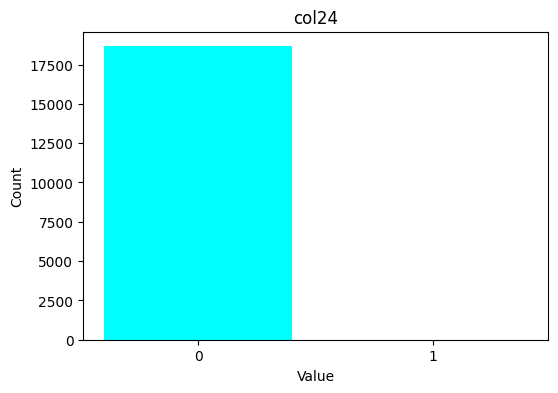

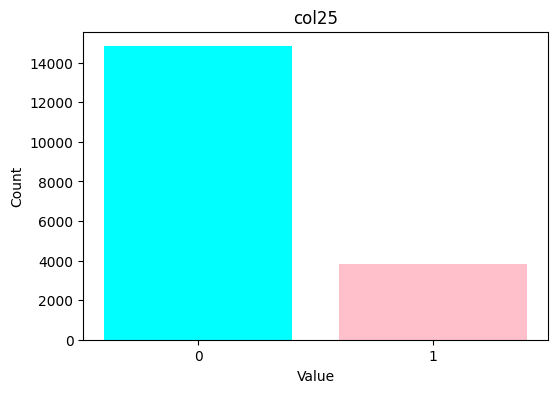

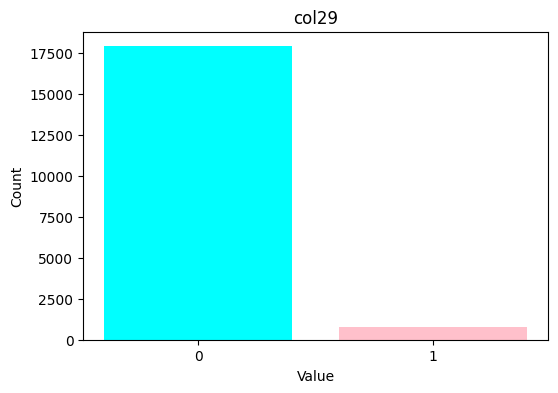

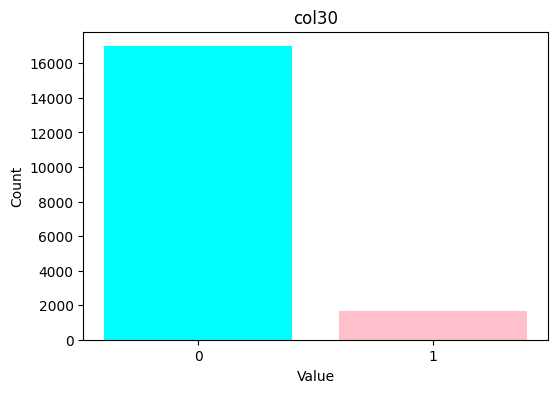

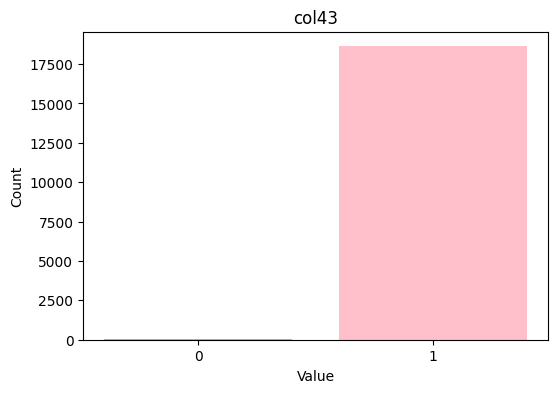

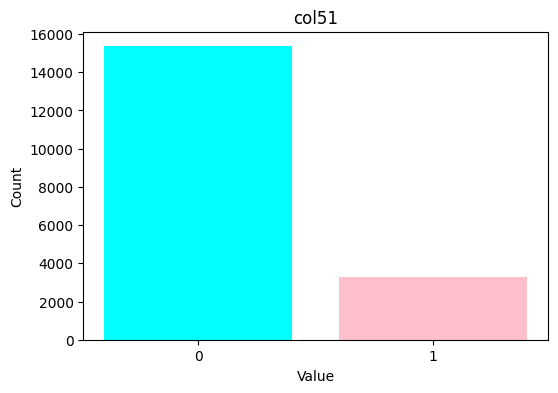

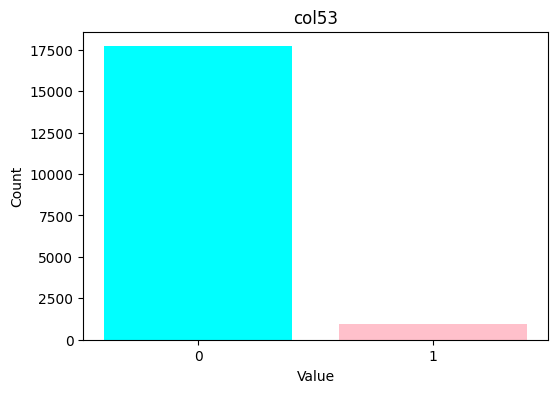

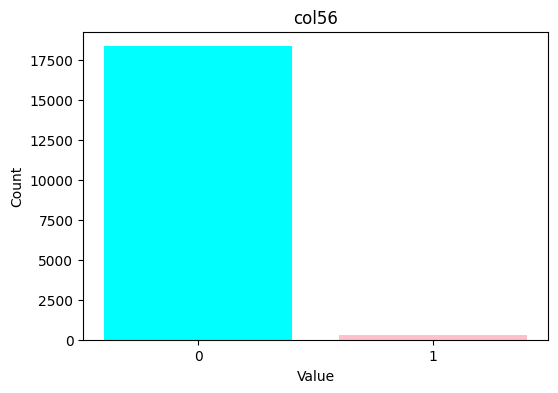

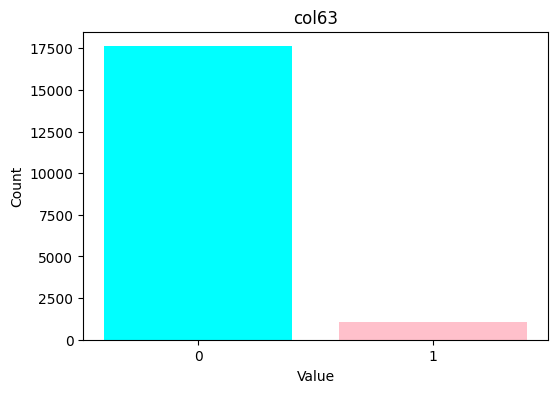

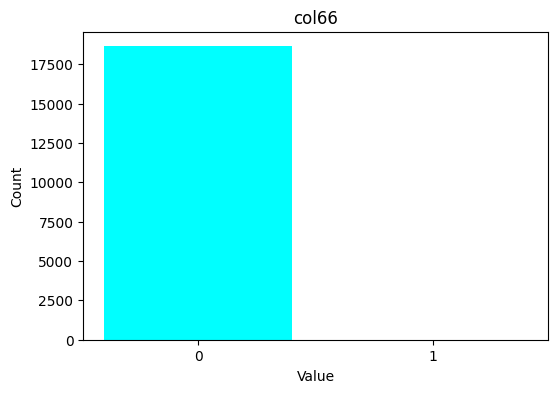

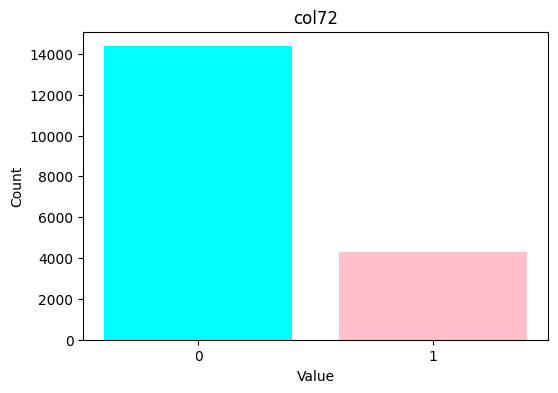

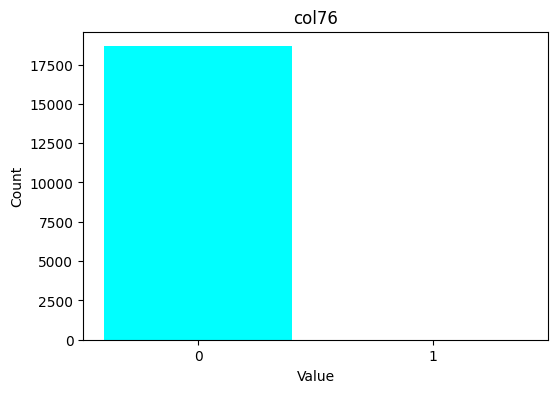

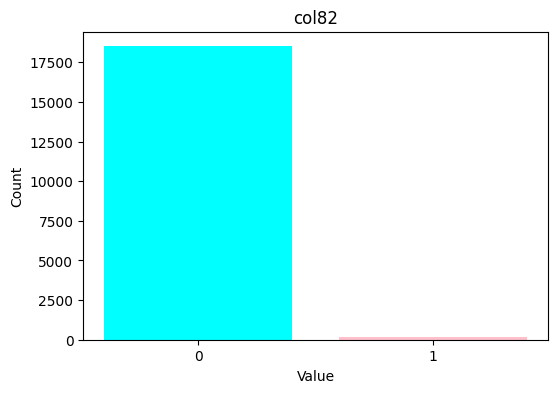

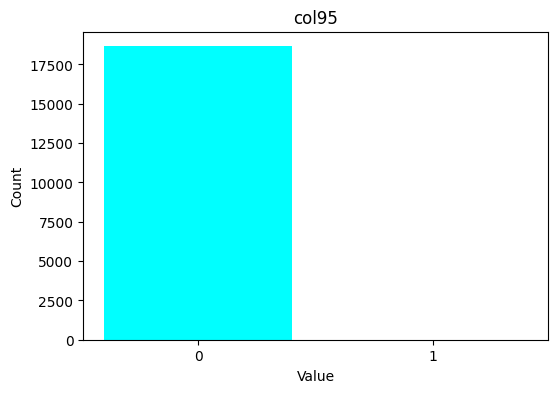

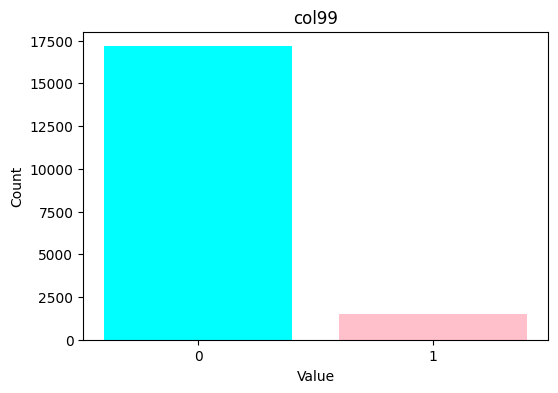

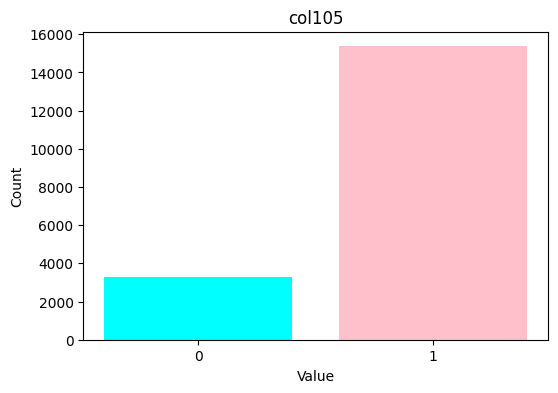

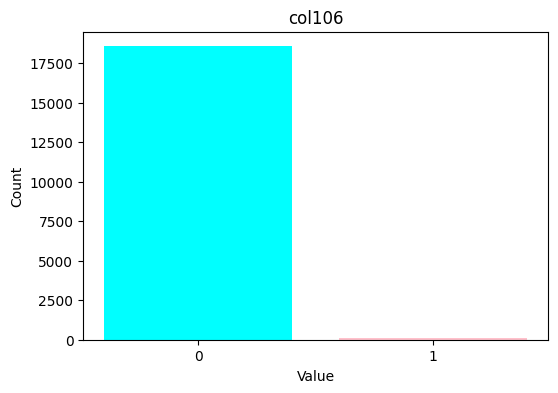

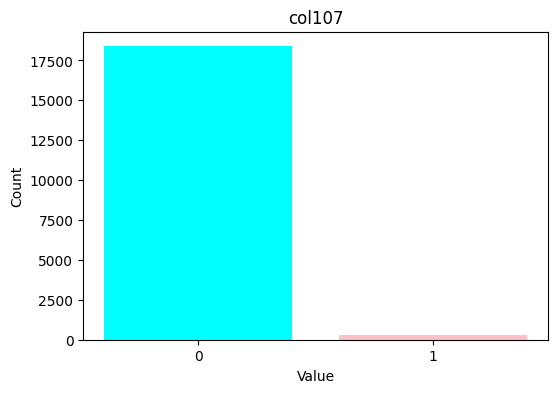

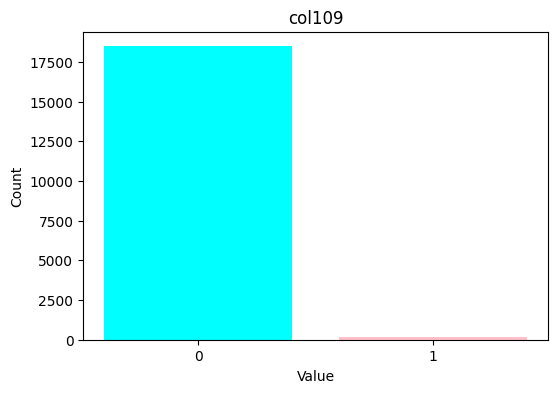

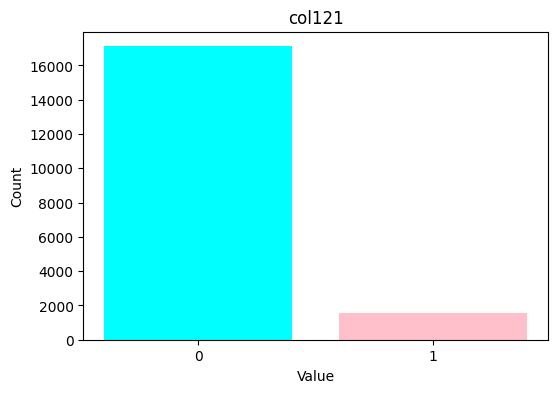

In [ ]:
import numpy as np

# Renk paleti
colors = ['cyan', 'pink']

#  binary_feats için histogramları çizme
for feature in twouniquevalue:
    plt.figure(figsize=(6, 4))
    counts = np.bincount(train[feature])
    labels = ['0', '1']
    plt.bar(labels, counts, color=colors)
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()



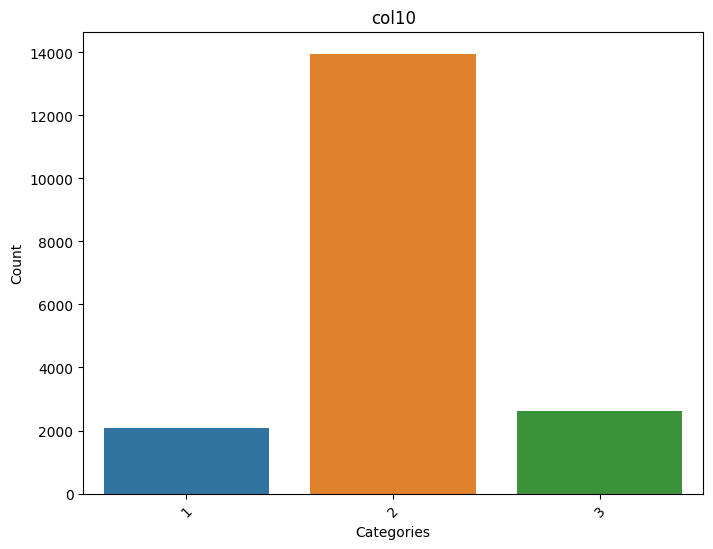

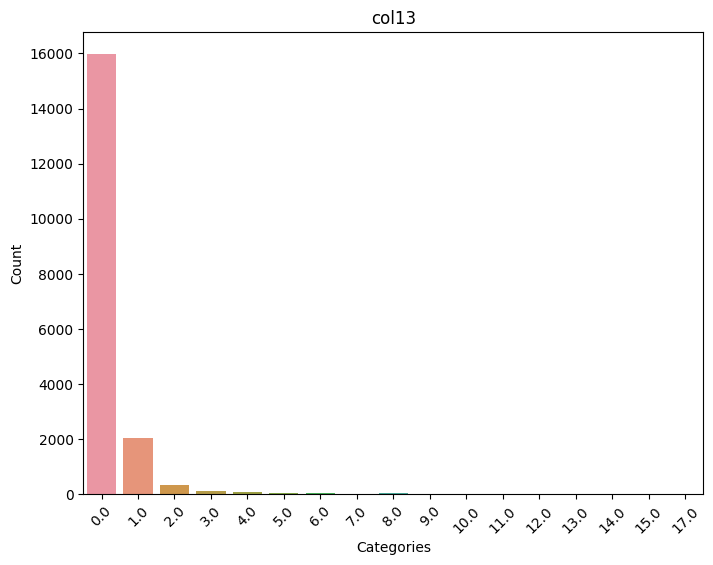

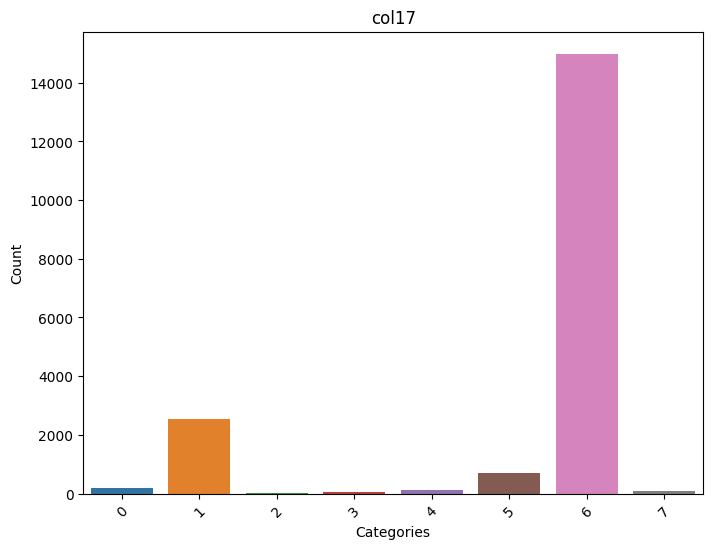

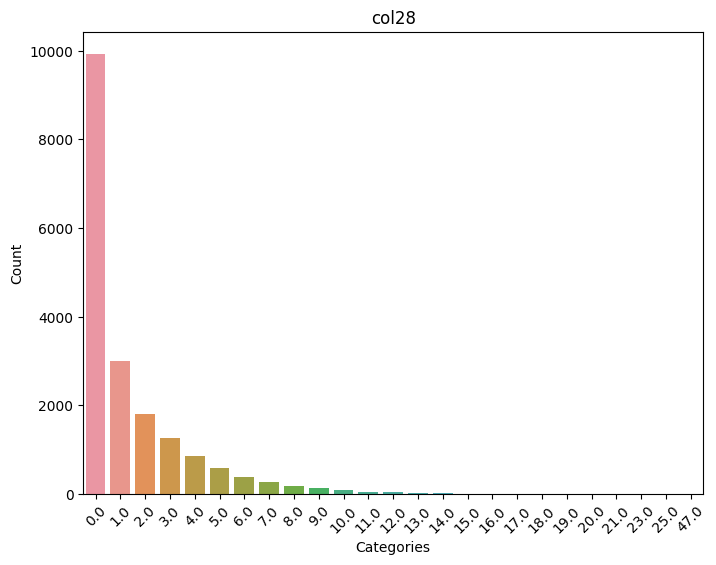

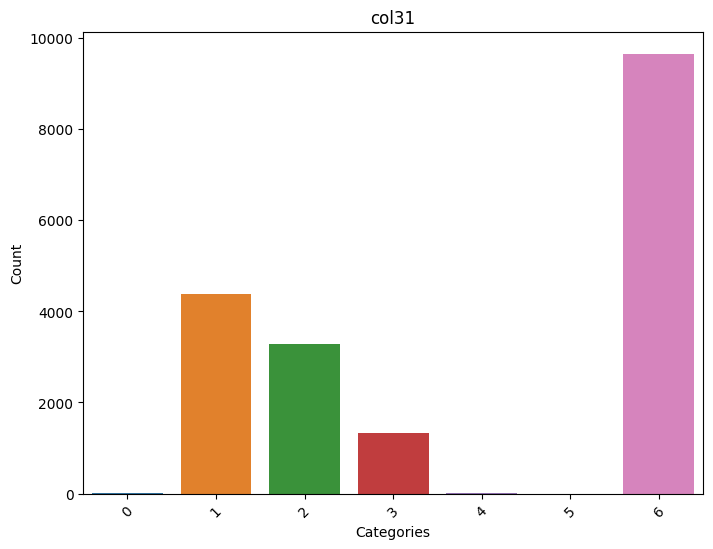

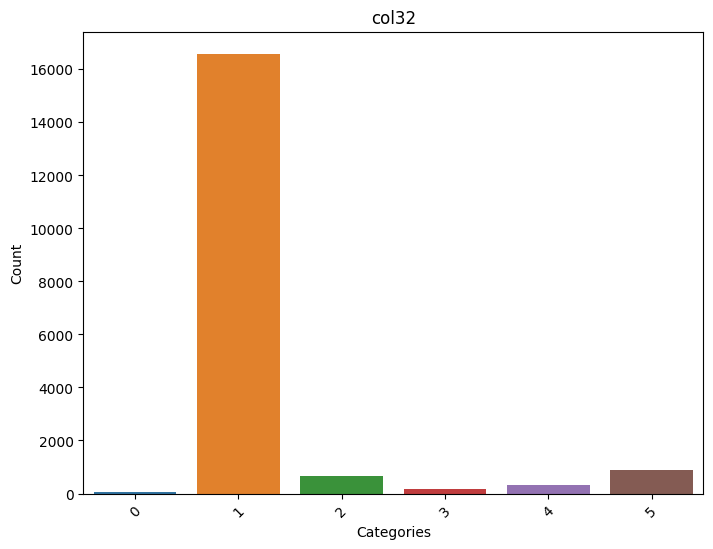

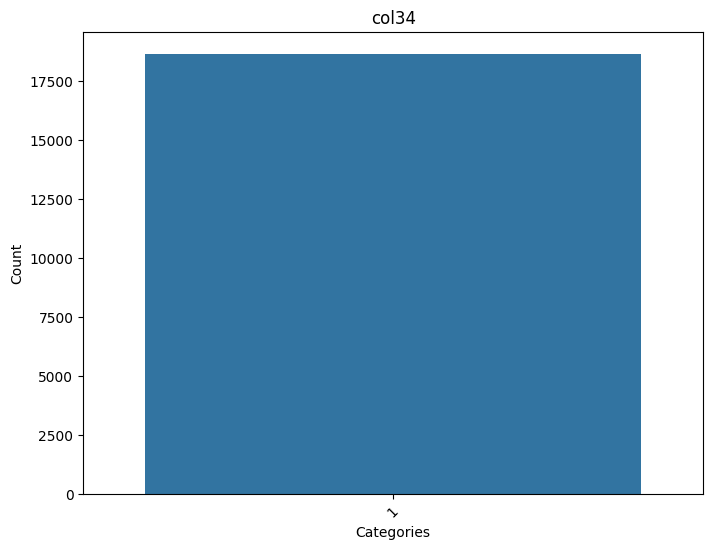

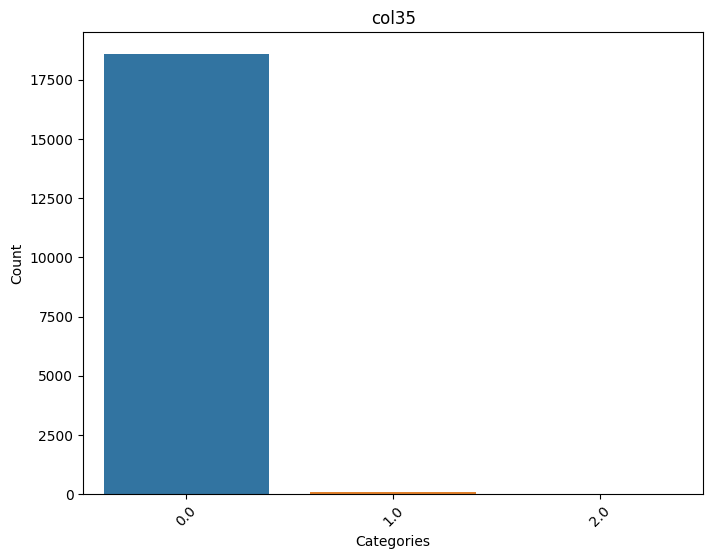

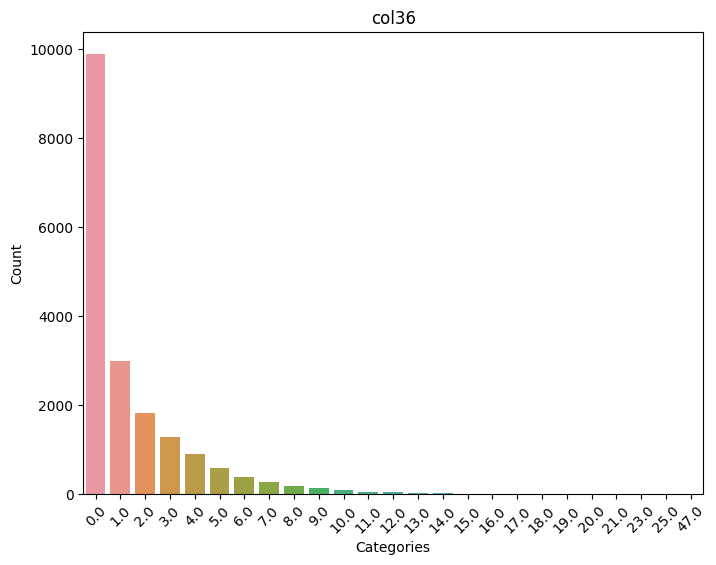

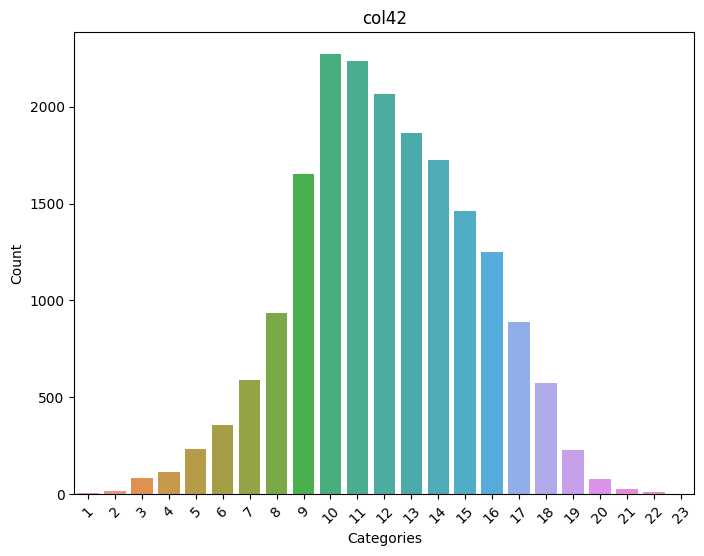

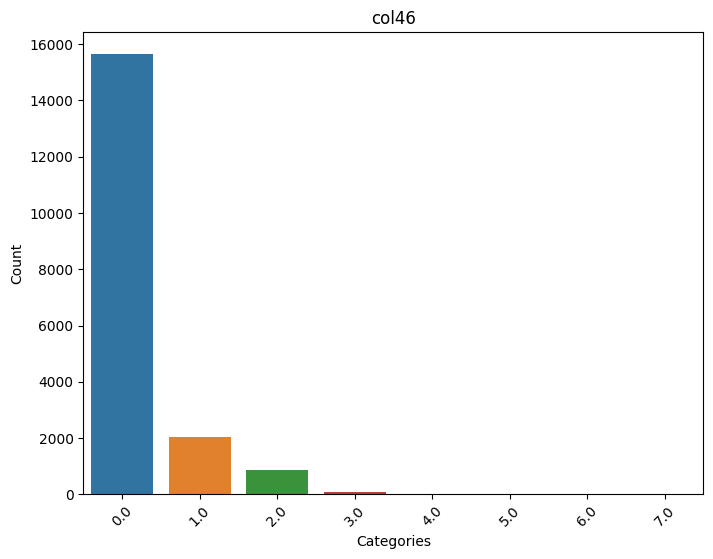

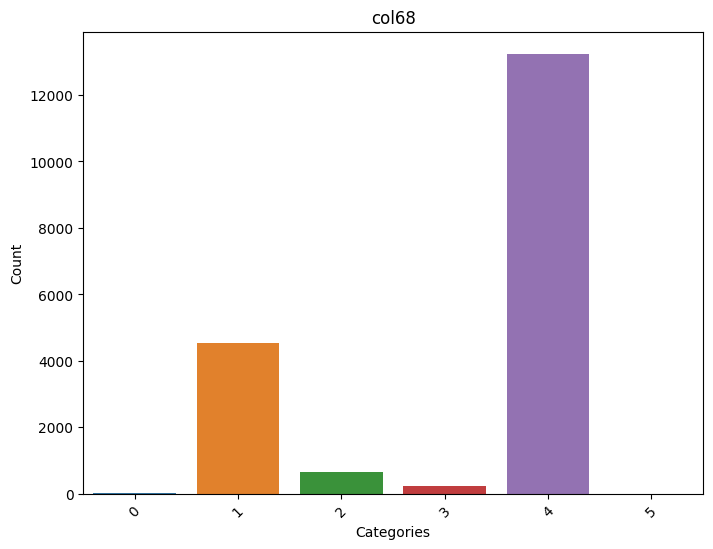

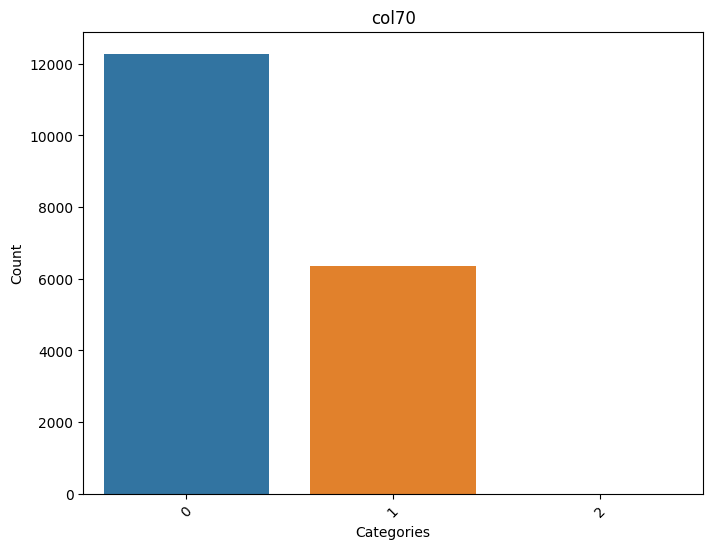

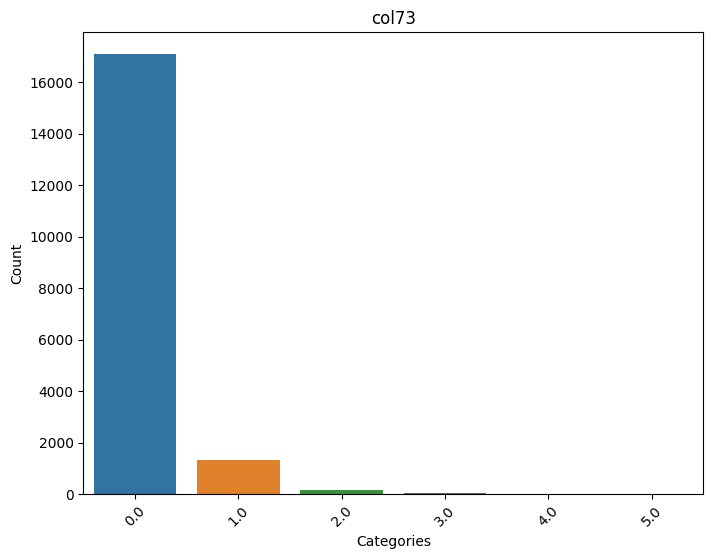

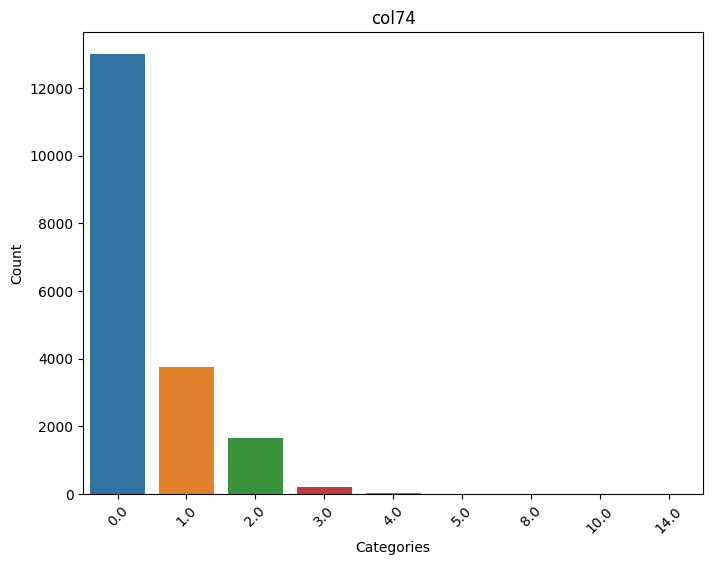

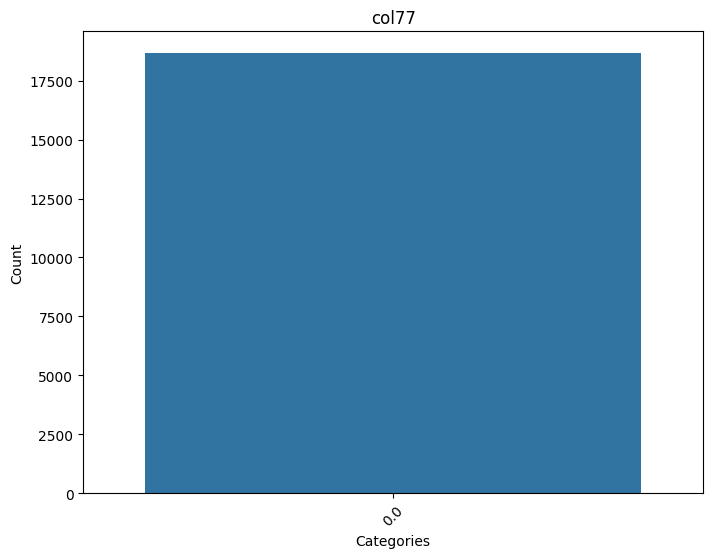

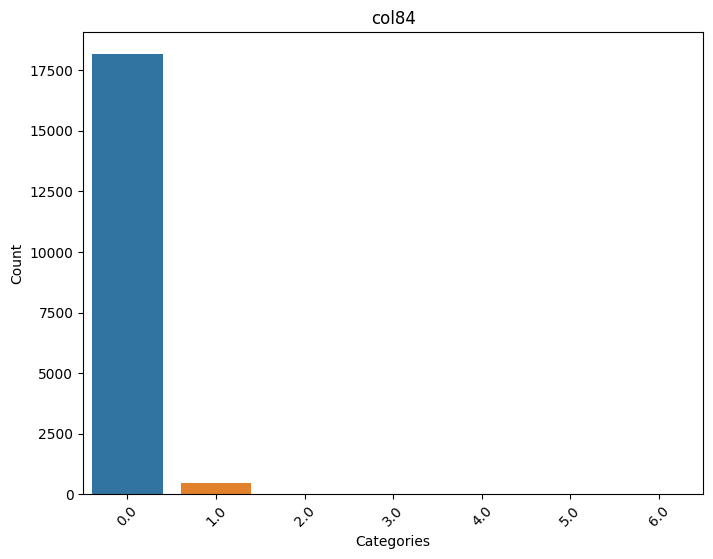

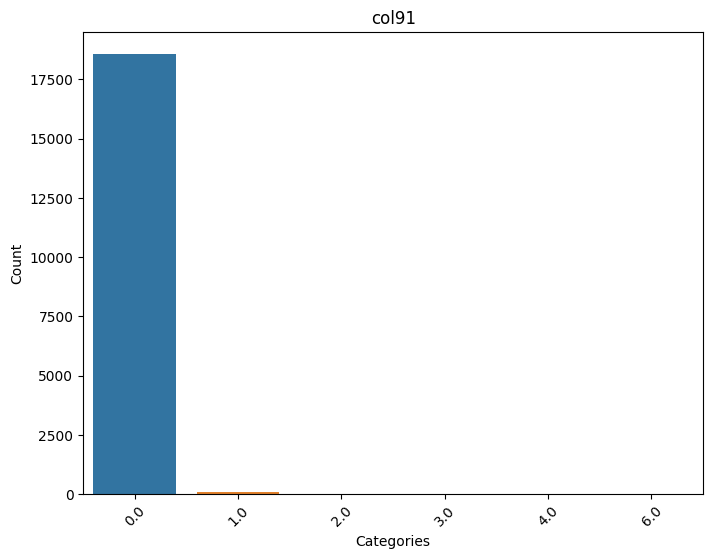

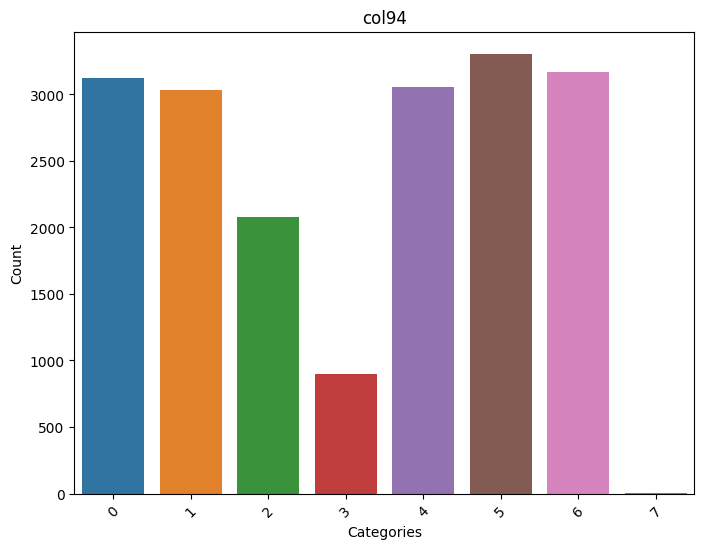

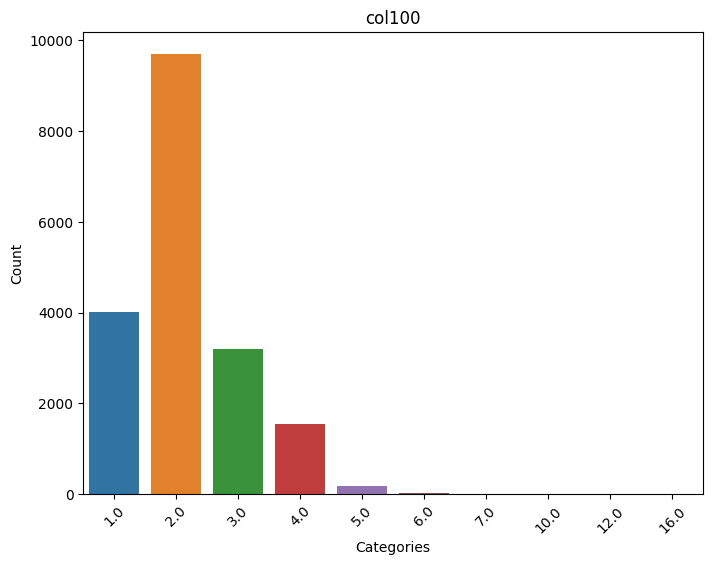

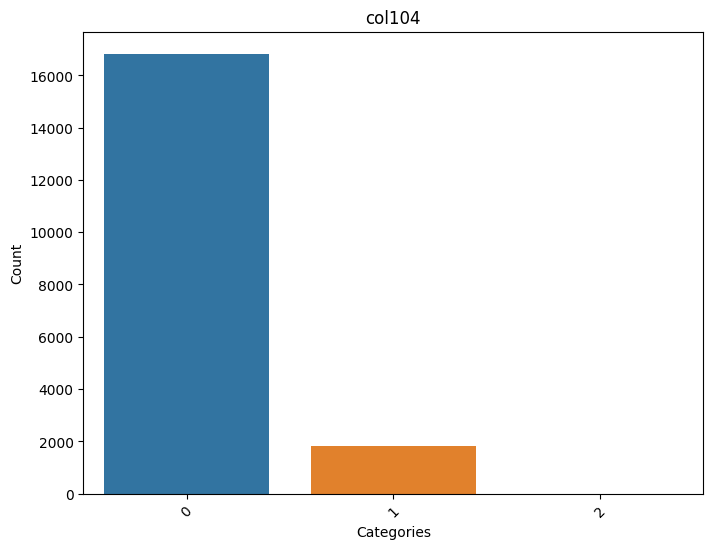

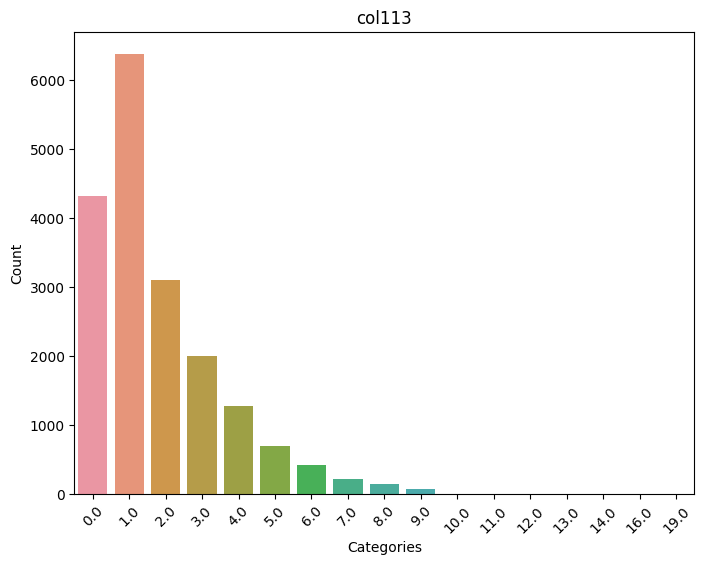

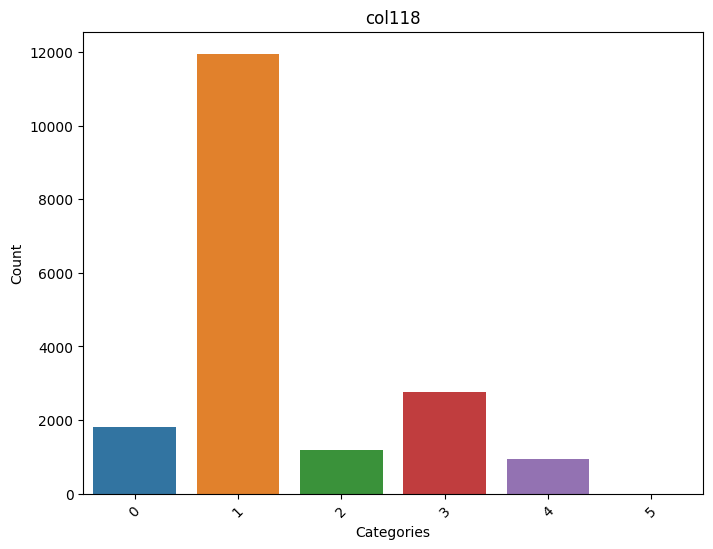

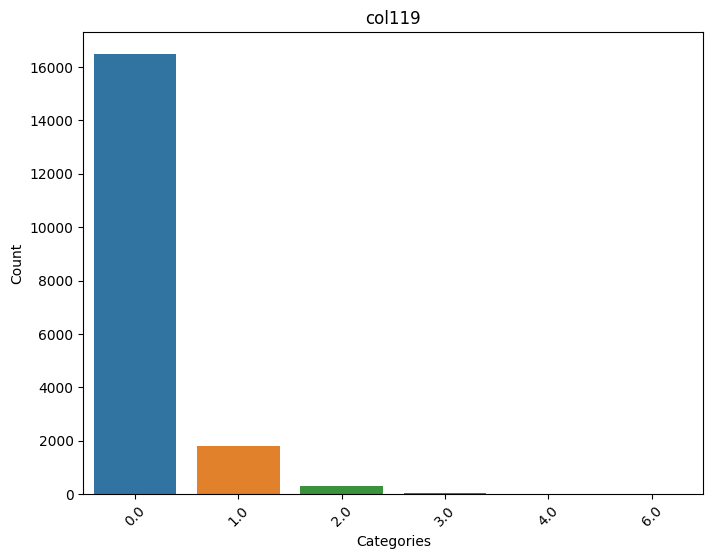

In [ ]:
import seaborn as sns

# Dört kategori (categorical) özelliğinin plotunu çizme
for feature in leftover:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=train)
    plt.title(feature)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Veri Setini Hazırlama:

Train dosyanızı özellik matrisi (X) ve hedef değişken (y) olarak ayırın.
Eğer kategorik özellikler varsa, bunları sayısal değerlere dönüştürün veya kodlayın.
Eksik verileri doldurun veya çıkartın.
Veri setini train ve test kümelerine ayırın. 

Veri setini hazırlamak için aşağıdaki adımları takip edebilirsiniz:

Özellik Matrisi (X) ve Hedef Değişken (y) Ayırma:
Train dosyanızdaki özellikleri (bağımsız değişkenleri) X olarak ayırın.
Hedef değişkeni (bağımlı değişkeni) y olarak ayırın.



Preparing the Data Set:

Split your train file into feature matrix (X) and target variable (y). If there are categorical properties, convert them to numeric values or encode them. Fill in or subtract missing data. Split the dataset into train and test sets.

You can follow the steps below to prepare the dataset:

Feature Matrix (X) and Target Variable (y) Separation: Separate the features (arguments) in your Train file by X. Split the target variable (dependent variable) into y

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Hedef değişkeni belirleyin
y = train['col122']

# Hedef değişkeni çıkararak bağımsız değişkenleri (X) seçin
X = train.drop('col122', axis=1)

# Test ve eğitim veri kümelerini oluşturun (stratify ile sınıf dengesini koru)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Test veri kümesinin şeklini yazdırın
print("X_test şekli: ", X_test.shape)
print("y_test şekli: ", y_test.shape)


X_test şekli:  (6534, 61)
y_test şekli:  (6534,)


Stratify, veri kümesini belirli bir özellik veya sınıf bazında dengeli bir şekilde bölmenizi sağlayan bir yöntemdir. Bu yöntem, veri kümesinin bir sınıf veya özellik dağılımını korumak için kullanılabilir. Örneğin, bir sınıflandırma probleminde, veri kümesindeki sınıf oranlarını korumak isteyebilirsiniz


In [ ]:
X = train.drop('col122', axis=1)  # Hedef değişkeni hariç tutarak özellik matrisi oluşturun
y = train['col122']  # Hedef değişkeni ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##test_size = değeri biz 0.2 yaptık yüzde 80 train yüzde 20 test olmuş olacak.Bu değeri istediğimiz gibi verebiliriz
#X i büyük y yi küçük kullanma sebebi bize Y nin encode edilmiş hali lazım yani y lazım o sebeple

In [ ]:
train.col122.value_counts(normalize= True)


0.0    0.920039
1.0    0.079961
Name: col122, dtype: float64

In [ ]:
y_train.value_counts(normalize=True)

0.0    0.919639
1.0    0.080361
Name: col122, dtype: float64

In [ ]:
class_counts = train['col122'].value_counts()
total_samples = len(train['col122'])

class_percentages = class_counts / total_samples * 100
print("Sınıf Dağılımı Yüzdelikleri:")
print(class_percentages)

#Data is inbalance

Sınıf Dağılımı Yüzdelikleri:
0.0    92.003918
1.0     7.996082
Name: col122, dtype: float64


In [ ]:
train.head()

col1  col2 col6  col7  col10  col13     col14  col16  col17  col20  ...  \
0   69769  -946    0     4      2    0.0  180000.0      0      6      0  ...   
1  236977   -92    1    30      3    0.0  135000.0      0      6      0  ...   
2  168821 -1646    0     5      2    0.0  553500.0      0      5      0  ...   
3   94708 -1651    0     5      2    0.0  391500.0      0      6      0  ...   
4   84556  -977    0    35      2    0.0  225000.0      0      6      0  ...   

   col106  col107  col109  col113  col114  col117  col118  col119  col121  \
0     0.0     0.0     0.0     1.0 -4670.0     0.0       1     0.0     0.0   
1     0.0     0.0     0.0     1.0 -1994.0     0.0       1     0.0     0.0   
2     0.0     0.0     0.0     2.0 -2842.0     0.0       3     0.0     0.0   
3     0.0     0.0     0.0     4.0 -1345.0     0.0       3     0.0     0.0   
4     0.0     0.0     0.0     1.0  -852.0     0.0       3     0.0     0.0   

   col122  
0     0.0  
1     0.0  
2     1.0  
3     1.0  
4     0.0  

[5 rows x 62 columns]

In [ ]:
import numpy as np

# X_train, X_test, y_train ve y_test'in şekillerini alın
X_train_shape = np.shape(X_train)
X_test_shape = np.shape(X_test)
y_train_shape = np.shape(y_train)
y_test_shape = np.shape(y_test)

print("X_train şekli: ", X_train_shape)
print("X_test şekli: ", X_test_shape)
print("y_train şekli: ", y_train_shape)
print("y_test şekli: ", y_test_shape)


X_train şekli:  (26132, 61)
X_test şekli:  (6534, 61)
y_train şekli:  (26132,)
y_test şekli:  (6534,)


frÖrnek olarak, bir veri kümesi üzerinde çalıştığımızı varsayalım ve bu veri kümesinde X özellikleri ve y hedef değişkeni bulunmaktadır. Bu veri kümesini eğitim ve test verilerine ayırmak istiyoruz.

train_test_split(X, y, test_size=0.2, random_state=42) kodunu kullanarak, veri kümesini %80 eğitim verisi ve %20 test verisi olarak ayırabiliriz. Bu kod, test_size=0.2 parametresiyle test verilerinin oranını %20 olarak belirler.

Ayrıca, random_state=42 parametresiyle de verilerin rastgele bölünmesinde kullanılacak olan sayıyı belirleriz. Bu sayı, 0 veya 42 olabilir veya başka bir sayı da olabilir. Ancak, önceden belirlenmiş örnekler olan 0 veya 42 gibi belirli sayılar önerilir.

Eğer random_state=0 olarak belirlersek, veri kümesi rastgele bölündüğünde her zaman aynı sonuçları alacağız. Ancak, random_state parametresinin başka bir sayı ile belirlenmesi durumunda, veriler farklı şekilde bölünebilir ve sonuçlar da değişebilir.

Özetle, train_test_split fonksiyonu kullanılarak veri kümesini eğitim ve test verilerine ayırmak için belirli bir rastgele bölünme yapmak istiyorsak, random_state parametresini belirleyerek aynı sonuçları elde edebiliriz. Ancak, bu parametrenin başka bir sayı ile belirlenmesi durumunda sonuçlar farklı olabilir.

In [ ]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn import metrics

accuracy_lr = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Logistic Regression Accuracy:",accuracy_lr)


Logistic Regression Accuracy: 92.16


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy_gnb = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Gaussian NB Accuracy:",accuracy_gnb)

Gaussian NB Accuracy: 92.16


This code snippet is written to calculate the accuracy of the Gaussian Naive Bayes (GNB) classifier on a test dataset.

Here's how it works:

1. First, predictions of the classification model on a test dataset (`y_test`) are generated and stored in `y_pred`.

2. Then, the function `metrics.accuracy_score(y_test, y_pred)` is used to calculate the accuracy between the true classes and the predicted classes. This function returns the accuracy score as a percentage.

3. Finally, the accuracy value is rounded using the `round()` function and printed to the screen along with the `%` sign.

This code snippet is written to evaluate the performance of the GNB classifier on a dataset. Accuracy represents the percentage of correct predictions made by the model and is a commonly used evaluation metric in classification problems. A high accuracy value indicates the model's ability to correctly predict the classes, while a low accuracy value suggests weaker performance of the model.

This code snippet is used to assess the accuracy of the GNB classifier and understand its performance.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import train_test_split

# Create new target variable y_new
y_new = np.where(y == 1, 0.5, y)

# Perform train-test split with stratification on y_new
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y_new)
#veri setini eğitim ve test kümelerine bölerek makine öğrenimi modellerinizi eğitebilir ve performanslarını değerlendirebilir.

In [ ]:
#karar ağacı sııfladırması oluşturduk
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#modeli kullaarak tahmi ya
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8383838383838383


In [ ]:
X = train.drop('col122', axis=1)  # Hedef değişkeni hariç tutarak özellik matrisi oluşturun
y = train['col122']  # Hedef değişkeni ayırın

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8383838383838383


In [ ]:
from sklearn import metrics

In [ ]:
accuracy_dt = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print("Decision Tree Accuracy:",accuracy_dt)

Decision Tree Accuracy: 83.84


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Decision Tree modelinizi oluşturun
decision_tree = DecisionTreeClassifier()

# Random Forest modelinizi oluşturun ve Decision Tree modelini kullanarak ensemble yapın
random_forest = RandomForestClassifier(n_estimators=10)

# Modelinizi eğitin
random_forest.fit(X_train, y_train)

# Tahminler yapın
y_pred = random_forest.predict(X_test)

# Modelin doğruluğunu değerlendirin
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.9199571472298745


In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC

In [ ]:
# Modelinizi oluşturun ve eğitin
model = SVC()
model.fit(X_train, y_train)

# Train veri seti üzerinde tahmin yapın
y_pred_train = model.predict(X_train)

# Recall değerini hesaplayın
recall_train = recall_score(y_train, y_pred_train)

# Precision değerini hesaplayın
precision_train = precision_score(y_train, y_pred_train)

print("Train Recall:", recall_train)
print("Train Precision:", precision_train)

Train Recall: 0.0
Train Precision: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We understand that Train Recall: 0.0 and Train Precision: 0.0 results indicate that there are no correct predictions or that the classification algorithm did not correctly predict any positive samples.

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      6012
         1.0       0.45      0.01      0.02       522

    accuracy                           0.92      6534
   macro avg       0.69      0.50      0.49      6534
weighted avg       0.88      0.92      0.88      6534



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Accuracy:", accuracy)


K-Nearest Neighbors Accuracy: 0.913835322926232


In [ ]:
# create a RandomForestClassifier object
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)

# train the model on the training data
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9201101928374655


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




# Özellik ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model oluşturma
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Model derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model eğitimi
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Model değerlendirme
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test veri kümesi üzerinde doğruluk: {:.2f}%".format(accuracy * 100))


Epoch 1/10
817/817 [==============================] - 5s 3ms/step - loss: 0.2768 - accuracy: 0.9181 - val_loss: 0.2658 - val_accuracy: 0.9201
Epoch 2/10
817/817 [==============================] - 2s 2ms/step - loss: 0.2604 - accuracy: 0.9199 - val_loss: 0.2639 - val_accuracy: 0.9201
Epoch 3/10
817/817 [==============================] - 2s 2ms/step - loss: 0.2555 - accuracy: 0.9199 - val_loss: 0.2671 - val_accuracy: 0.9197
Epoch 4/10
817/817 [==============================] - 2s 2ms/step - loss: 0.2518 - accuracy: 0.9199 - val_loss: 0.2695 - val_accuracy: 0.9195
Epoch 5/10
817/817 [==============================] - 2s 2ms/step - loss: 0.2483 - accuracy: 0.9201 - val_loss: 0.2664 - val_accuracy: 0.9187
Epoch 6/10
817/817 [==============================] - 3s 3ms/step - loss: 0.2455 - accuracy: 0.9206 - val_loss: 0.2679 - val_accuracy: 0.9193
Epoch 7/10
817/817 [==============================] - 3s 3ms/step - loss: 0.2421 - accuracy: 0.9206 - val_loss: 0.2720 - val_accuracy: 0.9187
Epoch 

SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC  # Sınıflandırma için
from sklearn.svm import SVR  # Regresyon için


In [ ]:
model = SVC(C=1.0, kernel='rbf')  # Örnek bir SVC modeli
model = SVR(C=1.0, kernel='rbf')  # Örnek bir SVR modeli


In [ ]:
model.fit(X_train, y_train)


SVR()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
import numpy as np

# Tahminleri sınıflandırma sonuçlarına dönüştürün
y_pred_class = np.where(y_pred > 0.5, 1, 0)

# Doğruluk değerlendirmesini gerçekleştirin
accuracy = accuracy_score(y_test, y_pred_class)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# SVM regresyon modelini oluşturun
svm_regressor = SVR(kernel='linear')

# Modeli eğitin
svm_regressor.fit(X_train, y_train)

# Tahminler yapın
y_pred = svm_regressor.predict(X_test)

# Regresyon performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ortalama karesel hata (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Ortalama mutlak hata (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# R-kare (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


değer kötü çıktı. düzeltme adımları yeniden uygulanacak sonra yeniden test edilecek. 

Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandartScaler nesnesini oluşturun
scaler = StandardScaler()

# Train veri setini standardize edin
scaled_train = scaler.fit_transform(train)

# Standardize edilmiş veriyi görüntüleyin
print("Standardize Edilmiş Veri:")
print(scaled_train)


feature engineering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Örnek bir train veri seti
train = pd.DataFrame({'x1': [1, 2, 3], 'x2': [4, 5, 6]})

# Etkileşim özelliği oluşturma
train['interaction'] = train['x1'] * train['x2']

# Polinom özellikleri oluşturma
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_train = poly_features.fit_transform(train)

# Dönüşüm özelliği oluşturma
train['x1_squared'] = np.square(train['x1'])

# Oluşturulan yeni özellikleri görüntüleme
print("Train Verisi:")
print(train)

print("Polinom Özellikleri:")
print(poly_train)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Eğitim ve test veri setlerinin ayrıştırılması
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model 1: Lineer Regresyon
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)

# Model 2: Karar Ağacı Regresyonu
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)

# Model 3: Rastgele Orman Regresyonu
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)

# MSE değerlerini karşılaştırma
print("Lineer regression MSE:", mse1)
print("decision tree regression MSE:", mse2)
print("random forest regression MSE:", mse3)


random forest regression için elde ettiğiniz MSE değeri, tahminlerinizin gerçek değerlere olan ortalama karesel hata miktarını gösterir. MSE değeri ne kadar küçükse, modelin tahminlerinin gerçek değerlere daha yakın olduğunu gösterir.

TRANSFORMERLAR : STANDARDSCALER UYGULANDI. ŞİMDİ: NORMALIZATION,  Polynomial Transformation UYGULANACAK. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
#Veriyi [0, 1] aralığına veya [-1, 1] aralığına dönüştürmek için MinMaxScaler sınıfını kullanabiliriz. Bu, verinin değerlerini belirli bir aralığa sıkıştırır.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2)
X_train_poly = transformer.fit_transform(X_train)
#Verinin polinom terimlerini ekleyerek, özellikler arasındaki etkileşimleri ve yüksek dereceli etkileri yakalayabiliriz.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ortalama karesel hata (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Ortalama mutlak hata (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# R-kare (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)